In [1]:
import sys
sys.path.append("..\\methods")

In [2]:
from estnltk import Text

import json
from estnltk.converters import json_to_text

from noun_phrase_extraction import create_df
from POS_sequence import get_POS_sequence
from graph_methods import *

import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

import pandas as pd
import numpy as np

In [3]:
with open('test_text.json', 'r') as f:
    content = json.load( f )

In [4]:
test_text = json_to_text( content )

In [5]:
test_text

Text(text='RAIVO PALMARU , “ Sõnumileht ”\n\nRublatehing oli seotud kütuse salakaubandusega .\nSellisele järeldusele jõudsid naftaäri kriminaalasja uurimise käigus Läti juurdlusorganid .\nRootsis registreeritud firma sildi all tegutsenud grupp tellis Eestis rahareformi ajal kokku korjatud rublade veoks lennukid ja vähemalt 500 miljoni rubla müügi korraldas selle grupiga seotud Eesti ärimees .\nSaadud raha on varjul Küprose pangas .\n\nPank lõhkise küna ees\n\nEesti Panga ( EP ) andmetel vahetati rahareformi käigus kroonide vastu  2 259 669 091  rubla .\nLisaks sellele oli panga varahoidlates veel  4 396 739  rubla .\n\nRahareformi esimesel päeval , 20. juunil 1992 , sõlmisid Eesti Vabariigi valitsus ja Vene Föderatsiooni valitsus omavahelise kokkuleppe vastastikustest kohustustest seoses Eesti Vabariigi rahvusliku valuuta käibelevõtmisega .\nSellele kirjutasid alla Eesti peaminister Tiit Vähi ja Vene valitsuse aseesimees Aleksandr Sohhin .\n\nKokkuleppe 5. artikkel nägi ette , et Eesti pool annab kõik rahavahetuse käigus kokku kogutud rublad kuu aja jooksul üle Venemaa keskpangale .\nTäpsustamata jäid aga raha üleandmise tingimused .\n\nSee kokkulepe jäi täitmata nii Venemaa kui ka Eesti poolt .\nNõnda jäi umbes 70 tonni rublasid Eesti Panga varahoidlasse .\nKokkuleppele viidates nõudsid venelased raha tagasi , samas aga teatasid , et nad ei kanna vastutust Eesti Hoiupanga ( NSVLi Hoiupanga EVP ) hoiustajate ees .\nKa nende hoiuste kogusumma moodustas umbes kaks miljardit rubla ning EP oli sunnitud võtma vastavad garantiikohustused endale .\n\nBo Kragh soovitas rublad müüa\n\nEsimest korda arutas Eesti Panga nõukogu kujunenud olukorda 7. oktoobril 1992.\nVastavad kirjalikud ettepanekud esitas panga tollane asepresident Bo Kragh .\nTa leidis , et EP garantiikohustuste ulatuses tuleks teha tasaarvestus .\nÜhtlasi soovitas Kragh rublad müüa Eesti valuutaoksjonitel , anda Eesti Kütusele rublakrediiti naftatoodete ostmiseks või anda osa rublasid remigratsioonifondile .\n\nEP nõukogu aktsepteeris asepresidendi soovitusi ja tegi panga presidendile Siim Kallasele ülesandeks pidada rublade saatuse küsimuses nõu presidendi , Riigikogu esimehe , peaministri ja välisministriga .\n\n1992. aasta 28. oktoobril arutas Eesti Panga nõukogu asja veel kord ja otsustas , et kui läbirääkimised Moskvas külmutatud Eesti Vabariigi aktivate tagasisaamise üle ei anna 15. novembriks tulemusi , volitab panga nõukogu Siim Kallast teatama valitsusele panga valmisolekust kuulutada välja tasaarvestus .\n\nOma teeneid pakkusid Silvesja Apananski\n\nPärast seda nähti Siim Kallast sageli Toompeal .\n4. detsembril 1992 andis rahareformikomitee välja dekreedi nr. 40.\nSelles otsustati vabastada Eesti Panga ja kommertspankade hoidlad sularaharubladest , realiseerida rublad ja säilitada nende realiseerimisel konfidentsiaalsus .\nDekreedile kirjutas alla peaminister Mart Laar .\n\nSamal päeval kirjutasid peaminister ja Eesti Panga president alla protokollile , milles märgitakse : “ Eesti Pank ja Eesti Vabariigi valitsus leppisid kokku , et seoses ruumipuudusega Eesti Panga varahoidlates antakse rahareformi käigus elanikelt ja firmadelt kokku kogutud sularaharublad vastutavale hoiule Eesti Vabariigi valitsuse varahoidlatesse . ”\n\nTeatavasti ei ole valitsusel mingeid varahoidlaid .\n\nPärast seda asus rublamüüki korraldama peaministri nõunik Tiit Pruuli .\nTõsi , mõningaid samme oli astutud juba enne 4. detsembri dekreeti .\n24. novembril käis peaministri jutul tuntud ärinaine Tiiu Silves , kellega räägiti rublade müügist ja lepiti kokku , et vajaduse korral võtab Silvesega ühendust Pruuli .\n\nTeist korda kohtus Pruuli Silvesega 7. detsembril 1992.\nKuid peaministri nõunikule Silves ei meeldinud ja ta väljendas seda ka valitsuse istungil .\n\nEnam-vähem samal ajal pakkus ennast vahendajaks Leonid Apananski .\nEnt temale vastati tollase standardfraasiga : rublad on alles ja vastavalt lepingule antakse need üle Vene poolele .\n\nPanus maagidele\n\nSeejärel asus Tiit P

In [6]:
for text_id, text in enumerate([test_text]):
    df = create_df(text_id, text)

In [7]:
df

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity
0,Text(text='kütuse salakaubandusega'),0,"(55, 78)",obl_phrase,0,0
1,Text(text='Sellisele järeldusele'),0,"(81, 102)",obl_phrase,0,0
2,Text(text='naftaäri kriminaalasja uurimise käigus'),0,"(111, 149)",obl_phrase,0,0
3,Text(text='Rootsis'),0,"(173, 180)",obl_phrase,0,0
4,Text(text='Rootsis registreeritud firma sildi all'),0,"(173, 211)",obl_phrase,1,0
...,...,...,...,...,...,...
835,"Text(text='Kirjal on ka lennujaama lubadebüroo resolutsioon pääslale nr. 2 : “ Lubada läbipääs lennujaama territooriumile sõiduautole 094 ABX , sõiduautole 139 ADF , veoautole 031 ABL ja sõiduautole 099 AUN .')",0,"(10490, 10687)",root_phrase,0,0
836,Text(text='” Need kõik on Eesti Panga autod .'),0,"(10688, 10722)",root_phrase,1,0
837,Text(text='Deklaratsioonil on ka märge : “ Pealelaaditud kauba kogust ei õnnestunud kindlaks määrata .'),0,"(11065, 11156)",root_phrase,0,0
838,Text(text='Tegemist on EV riigikantselei salastatud kaubaga . ”'),0,"(11157, 11209)",root_phrase,1,0


### POS-märgendite järjestused

Lisame kõik sõnaliigijärjestused DataFrame-i:

In [8]:
all_pos = []
for phrase in df['phrase']:
    all_pos.append(get_POS_sequence(phrase))
df.insert(len(df.columns), 'pos_sequence', all_pos)

In [9]:
df

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence
0,Text(text='kütuse salakaubandusega'),0,"(55, 78)",obl_phrase,0,0,S-S
1,Text(text='Sellisele järeldusele'),0,"(81, 102)",obl_phrase,0,0,P-S
2,Text(text='naftaäri kriminaalasja uurimise käigus'),0,"(111, 149)",obl_phrase,0,0,S-S-S-K
3,Text(text='Rootsis'),0,"(173, 180)",obl_phrase,0,0,H
4,Text(text='Rootsis registreeritud firma sildi all'),0,"(173, 211)",obl_phrase,1,0,H-(V|A)-S-S-K
...,...,...,...,...,...,...,...
835,"Text(text='Kirjal on ka lennujaama lubadebüroo resolutsioon pääslale nr. 2 : “ Lubada läbipääs lennujaama territooriumile sõiduautole 094 ABX , sõiduautole 139 ADF , veoautole 031 ABL ja sõiduautole 099 AUN .')",0,"(10490, 10687)",root_phrase,0,0,S-V-D-S-S-S-S-Y-N-Z-Z-V-S-S-S-S-N-Y-Z-S-N-Y-Z-S-N-Y-J-S-N-S-Z
836,Text(text='” Need kõik on Eesti Panga autod .'),0,"(10688, 10722)",root_phrase,1,0,Z-P-P-V-H-H-S-Z
837,Text(text='Deklaratsioonil on ka märge : “ Pealelaaditud kauba kogust ei õnnestunud kindlaks määrata .'),0,"(11065, 11156)",root_phrase,0,0,S-V-D-S-Z-Z-A-S-S-V-(V|A)-A-V-Z
838,Text(text='Tegemist on EV riigikantselei salastatud kaubaga . ”'),0,"(11157, 11209)",root_phrase,1,0,S-V-Y-S-(V|A)-S-Z-Z


### Süntaksipuu graafi esitus

In [10]:
test_phrase = df['phrase'][4]

In [11]:
test_phrase.stanza_syntax

Layer(name='stanza_syntax', attributes=('id', 'lemma', 'upostag', 'xpostag', 'feats', 'head', 'deprel', 'deps', 'misc', 'parent_span', 'children'), spans=SL[Span('Rootsis', [{'id': 1, 'lemma': 'Rootsi', 'upostag': 'H', 'xpostag': 'H', 'feats': OrderedDict([('sg', 'sg'), ('in', 'in')]), 'head': 2, 'deprel': 'obl', 'deps': '_', 'misc': '_', 'parent_span': <class 'estnltk_core.layer.span.Span'>, 'children': ()}]),
Span('registreeritud', [{'id': 2, 'lemma': 'registreerima', 'upostag': 'V', 'xpostag': 'V', 'feats': OrderedDict([('tud', 'tud')]), 'head': 3, 'deprel': 'acl', 'deps': '_', 'misc': '_', 'parent_span': <class 'estnltk_core.layer.span.Span'>, 'children': <class 'tuple'>}]),
Span('firma', [{'id': 3, 'lemma': 'firma', 'upostag': 'S', 'xpostag': 'S', 'feats': OrderedDict([('sg', 'sg'), ('g', 'g')]), 'head': 4, 'deprel': 'nmod', 'deps': '_', 'misc': '_', 'parent_span': <class 'estnltk_core.layer.span.Span'>, 'children': <class 'tuple'>}]),
Span('sildi', [{'id': 4, 'lemma': 'silt', 'upostag': 'S', 'xpostag': 'S', 'feats': OrderedDict([('sg', 'sg'), ('g', 'g')]), 'head': 0, 'deprel': 'root', 'deps': '_', 'misc': '_', 'parent_span': None, 'children': <class 'tuple'>}]),
Span('all', [{'id': 5, 'lemma': 'all', 'upostag': 'K', 'xpostag': 'K', 'feats': OrderedDict(), 'head': 4, 'deprel': 'case', 'deps': '_', 'misc': '_', 'parent_span': <class 'estnltk_core.layer.span.Span'>, 'children': ()}])])

Graafi koostamisel on võetud eeskuju siit: https://github.com/estnltk/syntax_experiments/blob/subcat/obl_data_experiments/data_helpers/syntax_graph.py

In [12]:
test_graph = create_graph(test_phrase)

In [22]:
for stanza_word in test_phrase.stanza_syntax:
    ner = None
    nertag = None
    if len(test_phrase.ner) > 0:
        word = test_phrase.words.get(stanza_word)
        for n in test_phrase.ner:
            for part in n:
                if part==word:
                    ner=word
                    nertag=n.nertag
    print(ner)
    print(nertag)

Span('Rootsis', [{'normalized_form': None}])
LOC
None
None
None
None
None
None
None
None


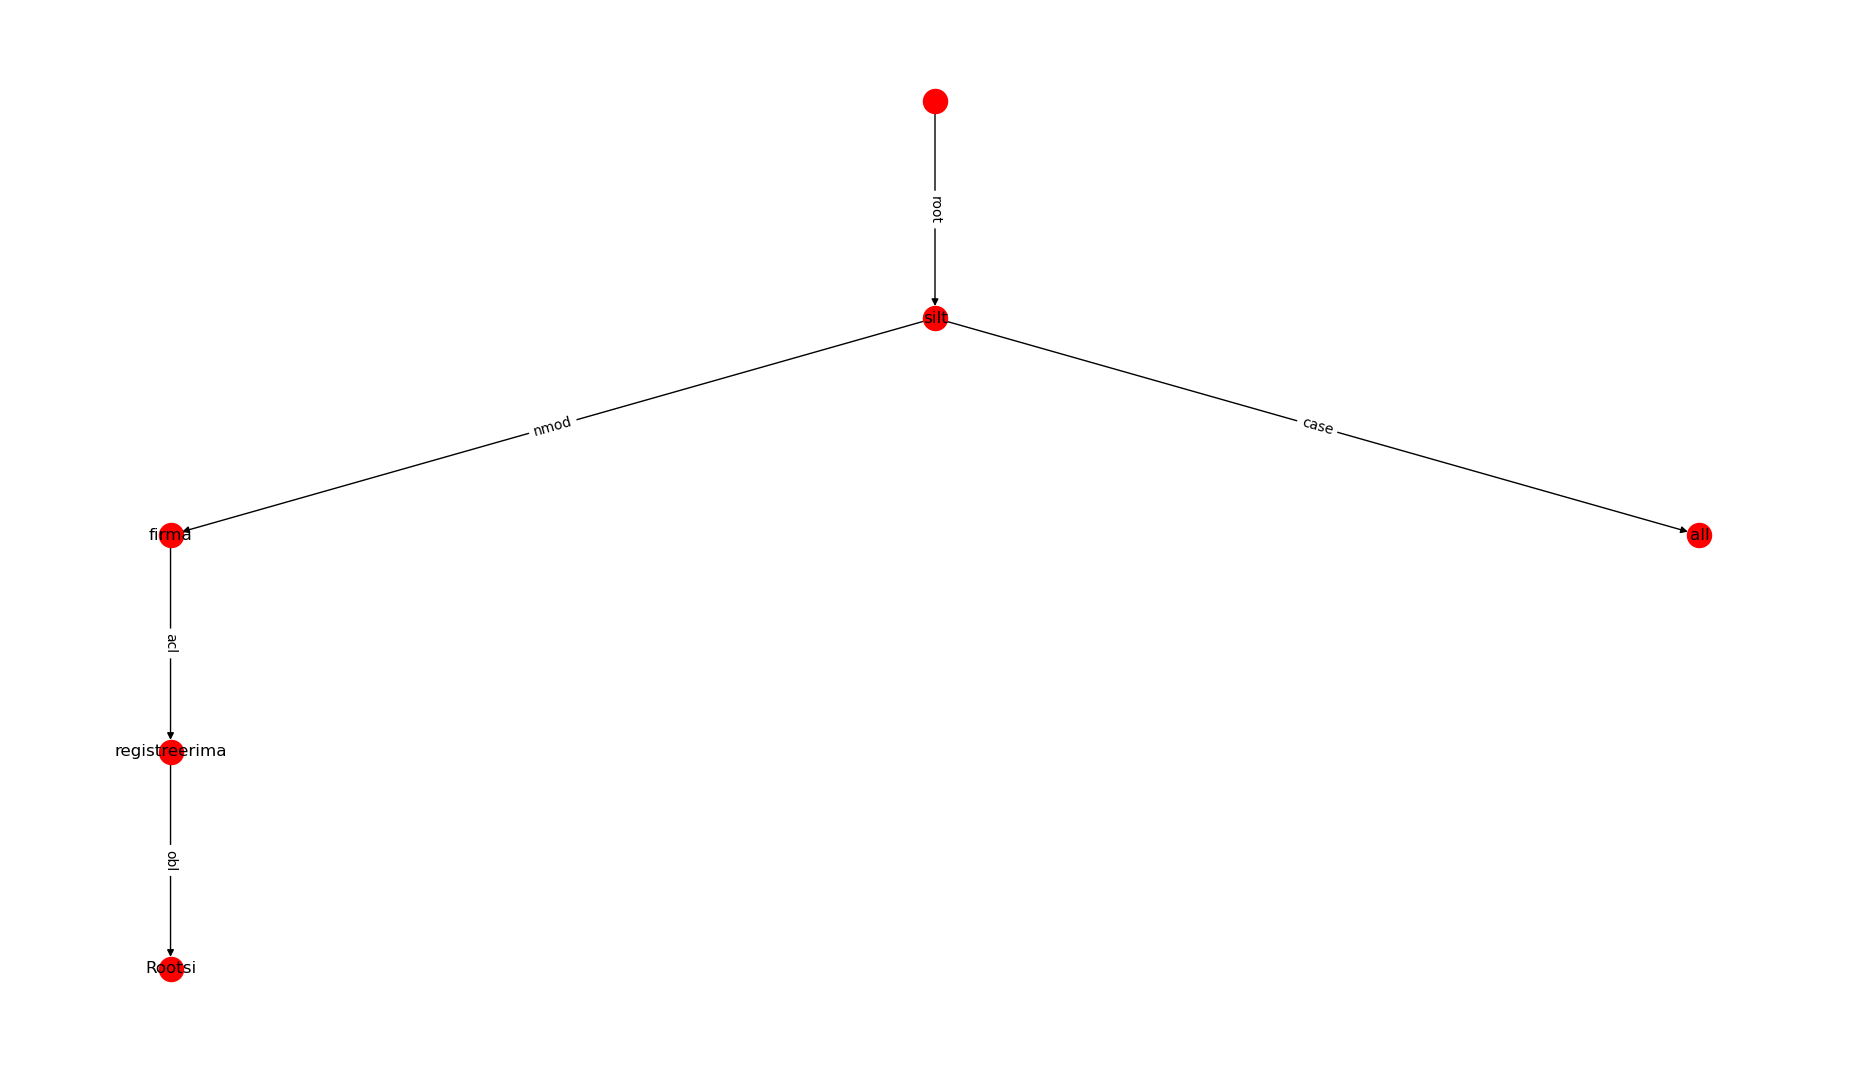

<Figure size 1850x1050 with 0 Axes>

In [13]:
# Visualiseerimine
draw_graph(test_graph, 'lemma')

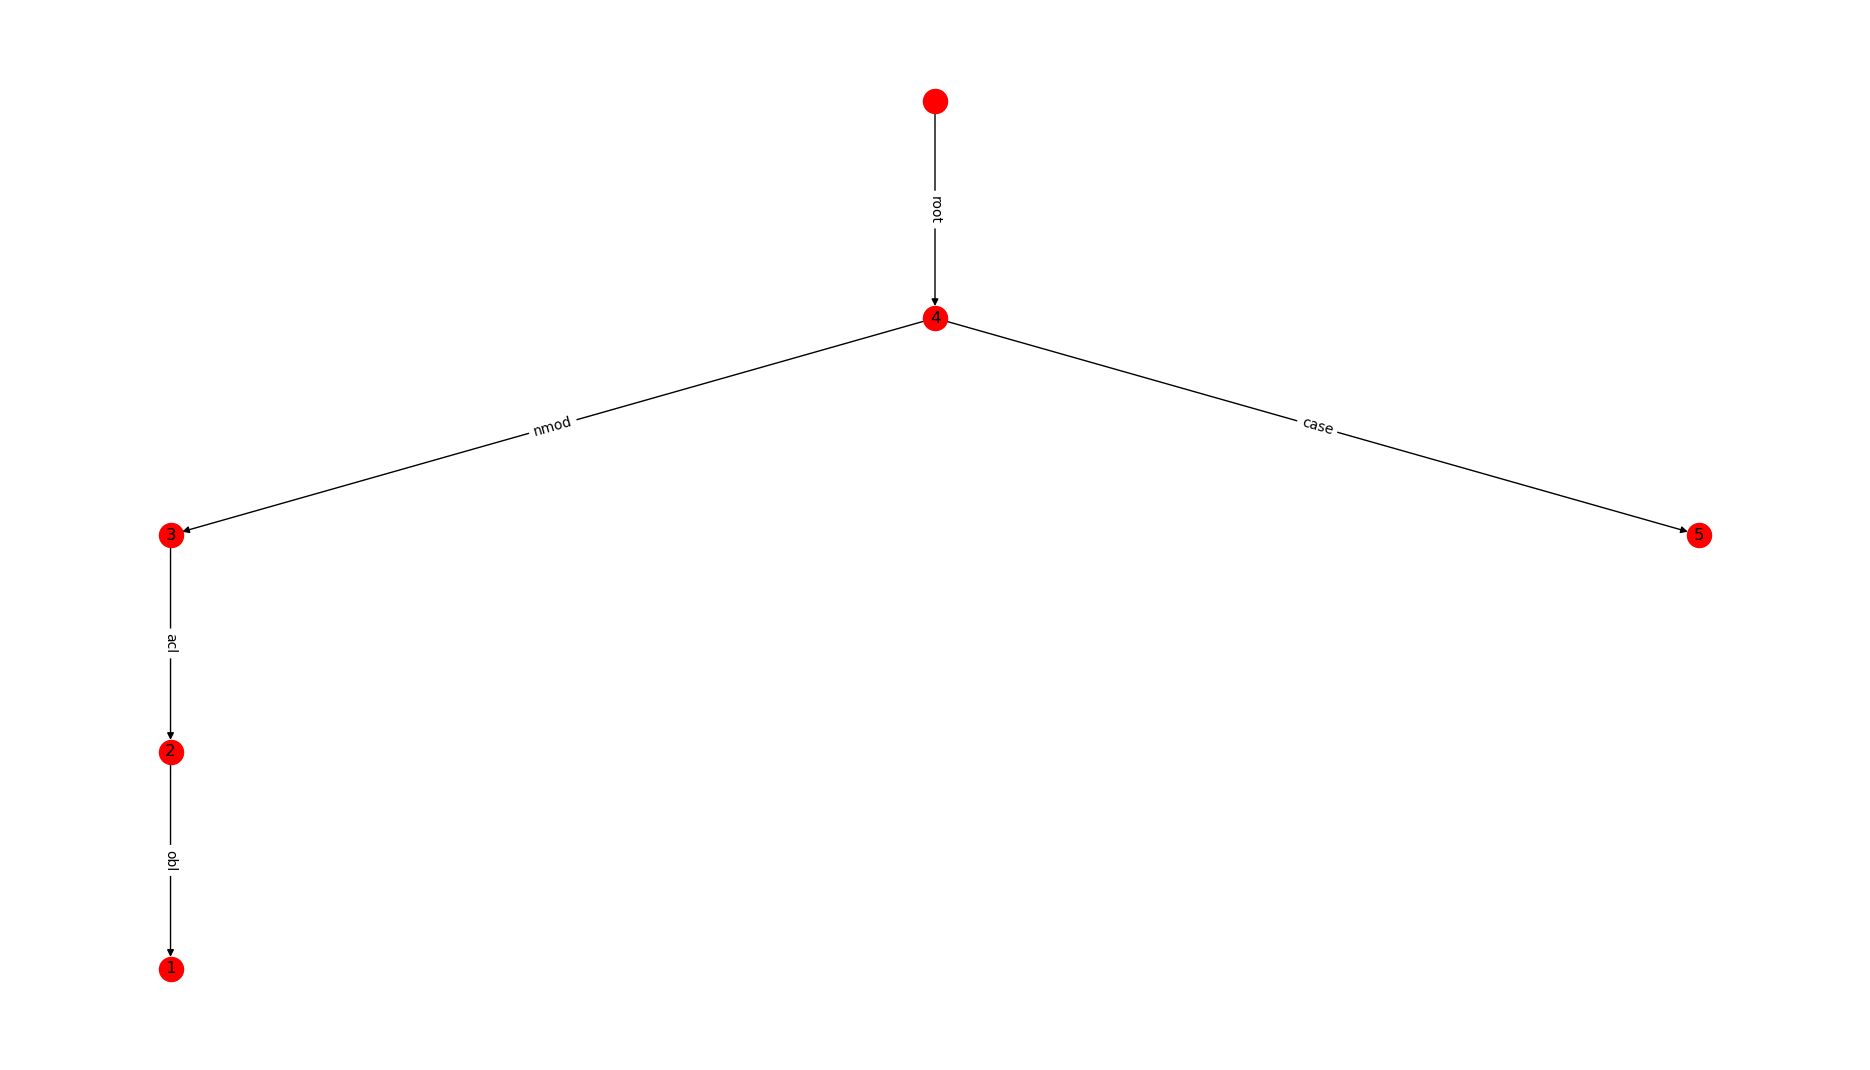

<Figure size 1850x1050 with 0 Axes>

In [14]:
draw_graph(test_graph, 'id')

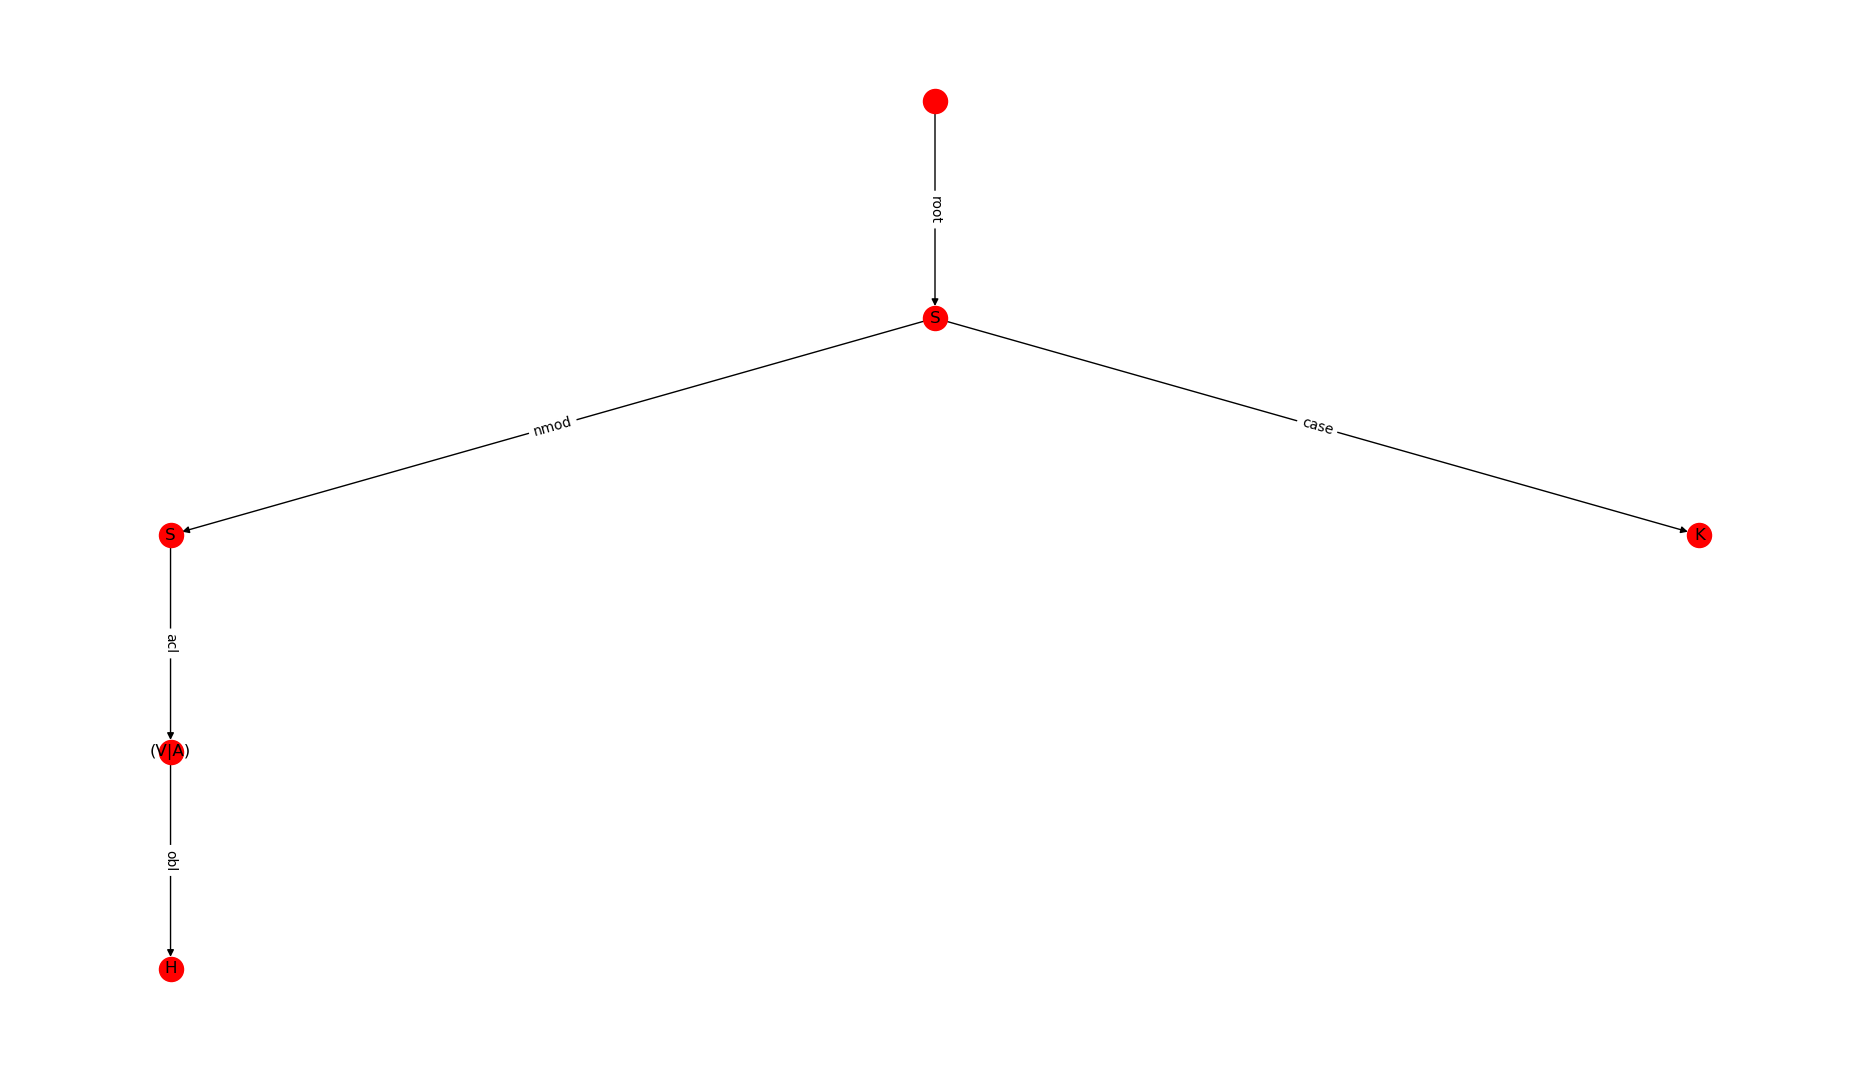

<Figure size 1850x1050 with 0 Axes>

In [15]:
draw_graph(test_graph, 'pos')

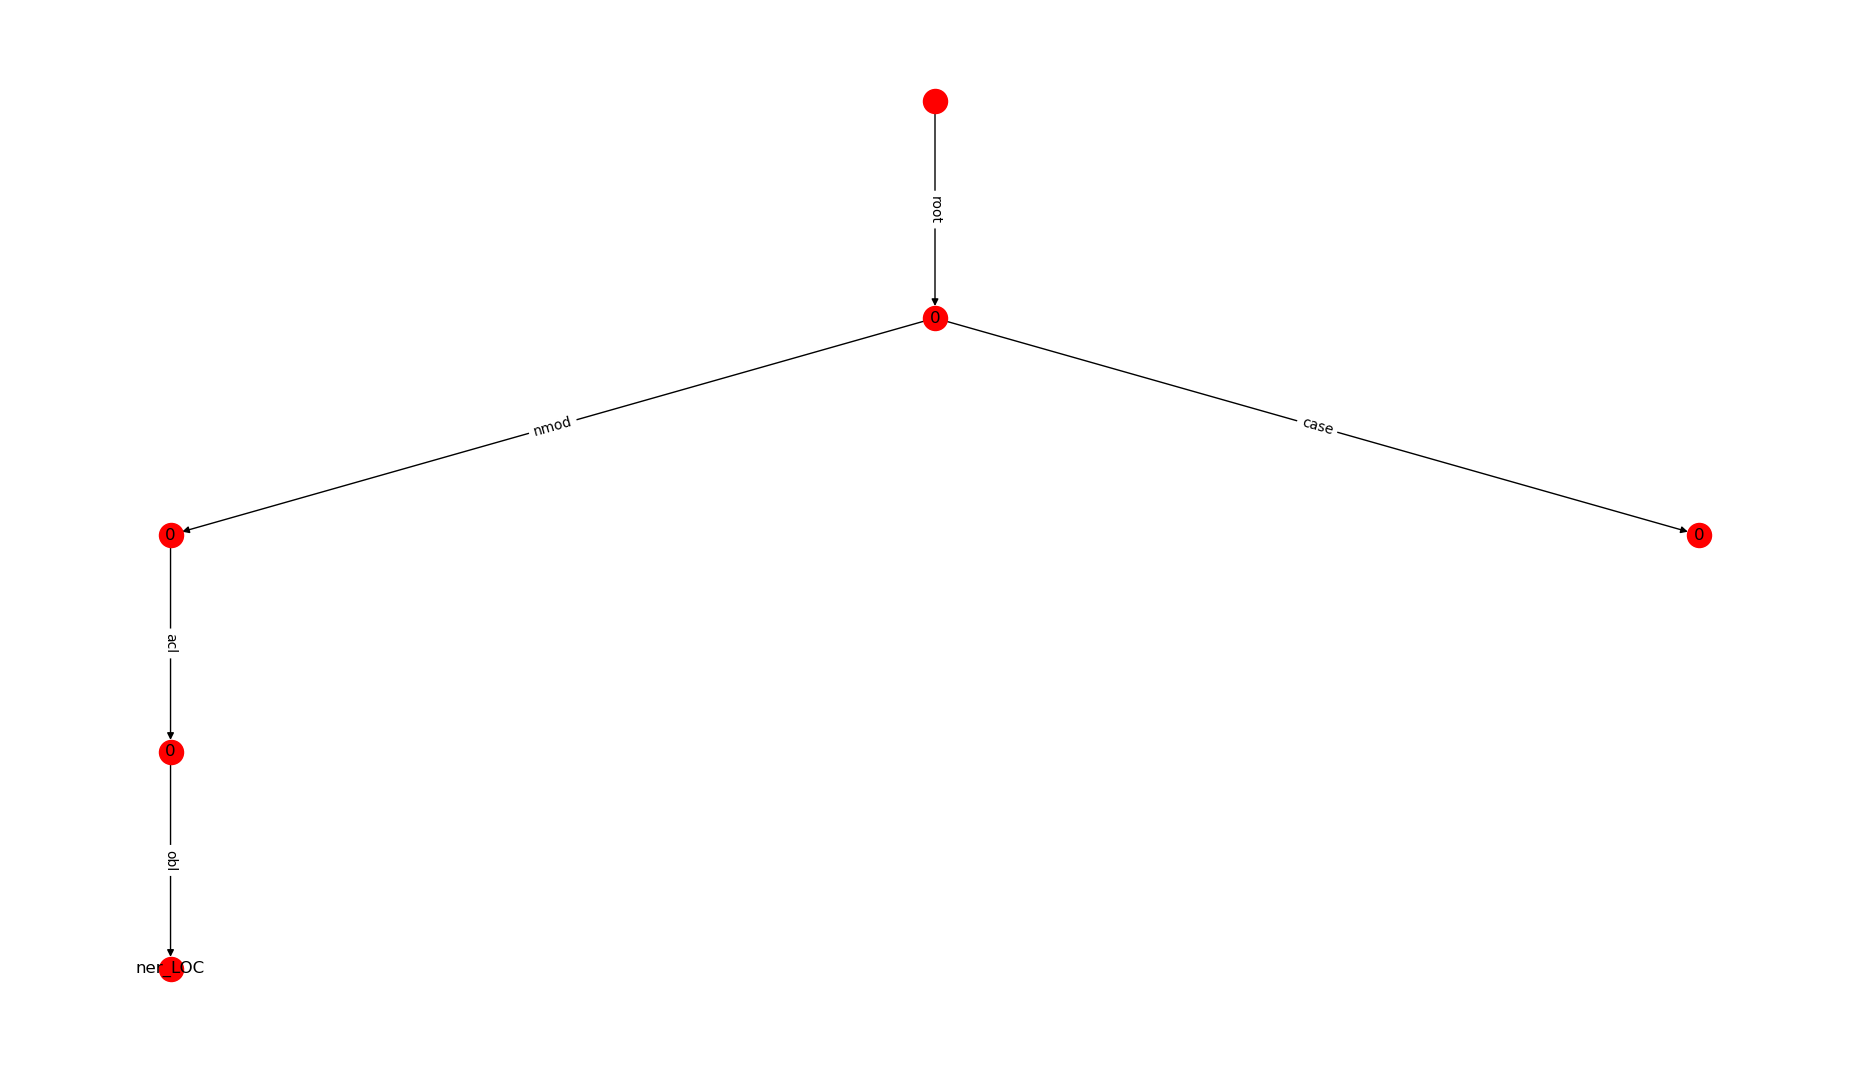

<Figure size 1850x1050 with 0 Axes>

In [16]:
draw_graph(test_graph, 'ner_timex')

Graafid ka DataFrame-i:

In [17]:
all_graphs = []
for phrase in df['phrase']:
    graph = create_graph(phrase)
    all_graphs.append(graph)
df.insert(len(df.columns), 'graph', all_graphs)

In [18]:
df

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph
0,Text(text='kütuse salakaubandusega'),0,"(55, 78)",obl_phrase,0,0,S-S,"(1, 0, 2)"
1,Text(text='Sellisele järeldusele'),0,"(81, 102)",obl_phrase,0,0,P-S,"(1, 2, 0)"
2,Text(text='naftaäri kriminaalasja uurimise käigus'),0,"(111, 149)",obl_phrase,0,0,S-S-S-K,"(1, 0, 2, 3, 4)"
3,Text(text='Rootsis'),0,"(173, 180)",obl_phrase,0,0,H,"(1, 0)"
4,Text(text='Rootsis registreeritud firma sildi all'),0,"(173, 211)",obl_phrase,1,0,H-(V|A)-S-S-K,"(1, 2, 3, 4, 0, 5)"
...,...,...,...,...,...,...,...,...
835,"Text(text='Kirjal on ka lennujaama lubadebüroo resolutsioon pääslale nr. 2 : “ Lubada läbipääs lennujaama territooriumile sõiduautole 094 ABX , sõiduautole 139 ADF , veoautole 031 ABL ja sõiduautole 099 AUN .')",0,"(10490, 10687)",root_phrase,0,0,S-V-D-S-S-S-S-Y-N-Z-Z-V-S-S-S-S-N-Y-Z-S-N-Y-Z-S-N-Y-J-S-N-S-Z,"(1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 28, 29, 31)"
836,Text(text='” Need kõik on Eesti Panga autod .'),0,"(10688, 10722)",root_phrase,1,0,Z-P-P-V-H-H-S-Z,"(1, 7, 2, 3, 4, 5, 6, 0, 8)"
837,Text(text='Deklaratsioonil on ka märge : “ Pealelaaditud kauba kogust ei õnnestunud kindlaks määrata .'),0,"(11065, 11156)",root_phrase,0,0,S-V-D-S-Z-Z-A-S-S-V-(V|A)-A-V-Z,"(1, 0, 2, 3, 4, 5, 11, 6, 7, 8, 9, 13, 10, 12, 14)"
838,Text(text='Tegemist on EV riigikantselei salastatud kaubaga . ”'),0,"(11157, 11209)",root_phrase,1,0,S-V-Y-S-(V|A)-S-Z-Z,"(1, 6, 2, 3, 4, 5, 0, 7, 8)"


Kas graaf on hashable?

In [19]:
df.duplicated(subset=['graph'], keep=False)

0      False
1      False
2      False
3      False
4      False
       ...  
835    False
836    False
837    False
838    False
839    False
Length: 840, dtype: bool

Kuna ei tulnud error, siis on hashable.

### DataFrame-i salvestamine

In [20]:
df.to_pickle("./noun_phrase_data.pkl") 

In [21]:
df = pd.read_pickle("./noun_phrase_data.pkl")
df

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph
0,Text(text='kütuse salakaubandusega'),0,"(55, 78)",obl_phrase,0,0,S-S,"(1, 0, 2)"
1,Text(text='Sellisele järeldusele'),0,"(81, 102)",obl_phrase,0,0,P-S,"(1, 2, 0)"
2,Text(text='naftaäri kriminaalasja uurimise käigus'),0,"(111, 149)",obl_phrase,0,0,S-S-S-K,"(1, 0, 2, 3, 4)"
3,Text(text='Rootsis'),0,"(173, 180)",obl_phrase,0,0,H,"(1, 0)"
4,Text(text='Rootsis registreeritud firma sildi all'),0,"(173, 211)",obl_phrase,1,0,H-(V|A)-S-S-K,"(1, 2, 3, 4, 0, 5)"
...,...,...,...,...,...,...,...,...
835,"Text(text='Kirjal on ka lennujaama lubadebüroo resolutsioon pääslale nr. 2 : “ Lubada läbipääs lennujaama territooriumile sõiduautole 094 ABX , sõiduautole 139 ADF , veoautole 031 ABL ja sõiduautole 099 AUN .')",0,"(10490, 10687)",root_phrase,0,0,S-V-D-S-S-S-S-Y-N-Z-Z-V-S-S-S-S-N-Y-Z-S-N-Y-Z-S-N-Y-J-S-N-S-Z,"(1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 28, 29, 31)"
836,Text(text='” Need kõik on Eesti Panga autod .'),0,"(10688, 10722)",root_phrase,1,0,Z-P-P-V-H-H-S-Z,"(1, 7, 2, 3, 4, 5, 6, 0, 8)"
837,Text(text='Deklaratsioonil on ka märge : “ Pealelaaditud kauba kogust ei õnnestunud kindlaks määrata .'),0,"(11065, 11156)",root_phrase,0,0,S-V-D-S-Z-Z-A-S-S-V-(V|A)-A-V-Z,"(1, 0, 2, 3, 4, 5, 11, 6, 7, 8, 9, 13, 10, 12, 14)"
838,Text(text='Tegemist on EV riigikantselei salastatud kaubaga . ”'),0,"(11157, 11209)",root_phrase,1,0,S-V-Y-S-(V|A)-S-Z-Z,"(1, 6, 2, 3, 4, 5, 0, 7, 8)"


### Histogramm fraasi pikkuste jagunemisest (sõnades)

In [29]:
# eri fraasitüüpide kohta eraldi histogrammid

In [30]:
all_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df))])

obl_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                               if df['phrase_type'][i]=='obl_phrase'])

nsubj_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                                 if df['phrase_type'][i]=='nsubj_phrase'])

nsubj_cop_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                                     if df['phrase_type'][i]=='nsubj_cop_phrase'])

obj_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                               if df['phrase_type'][i]=='obj_phrase'])

xcomp_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                                 if df['phrase_type'][i]=='xcomp_phrase'])

nmod_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                                 if df['phrase_type'][i]=='nmod_phrase'])

appos_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                                 if df['phrase_type'][i]=='appos_phrase'])

parataxis_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                                 if df['phrase_type'][i]=='parataxis_phrase'])

root_phrase_lengths = np.array([len(df['phrase'][i].words) for i in range(len(df)) 
                                 if df['phrase_type'][i]=='root_phrase'])

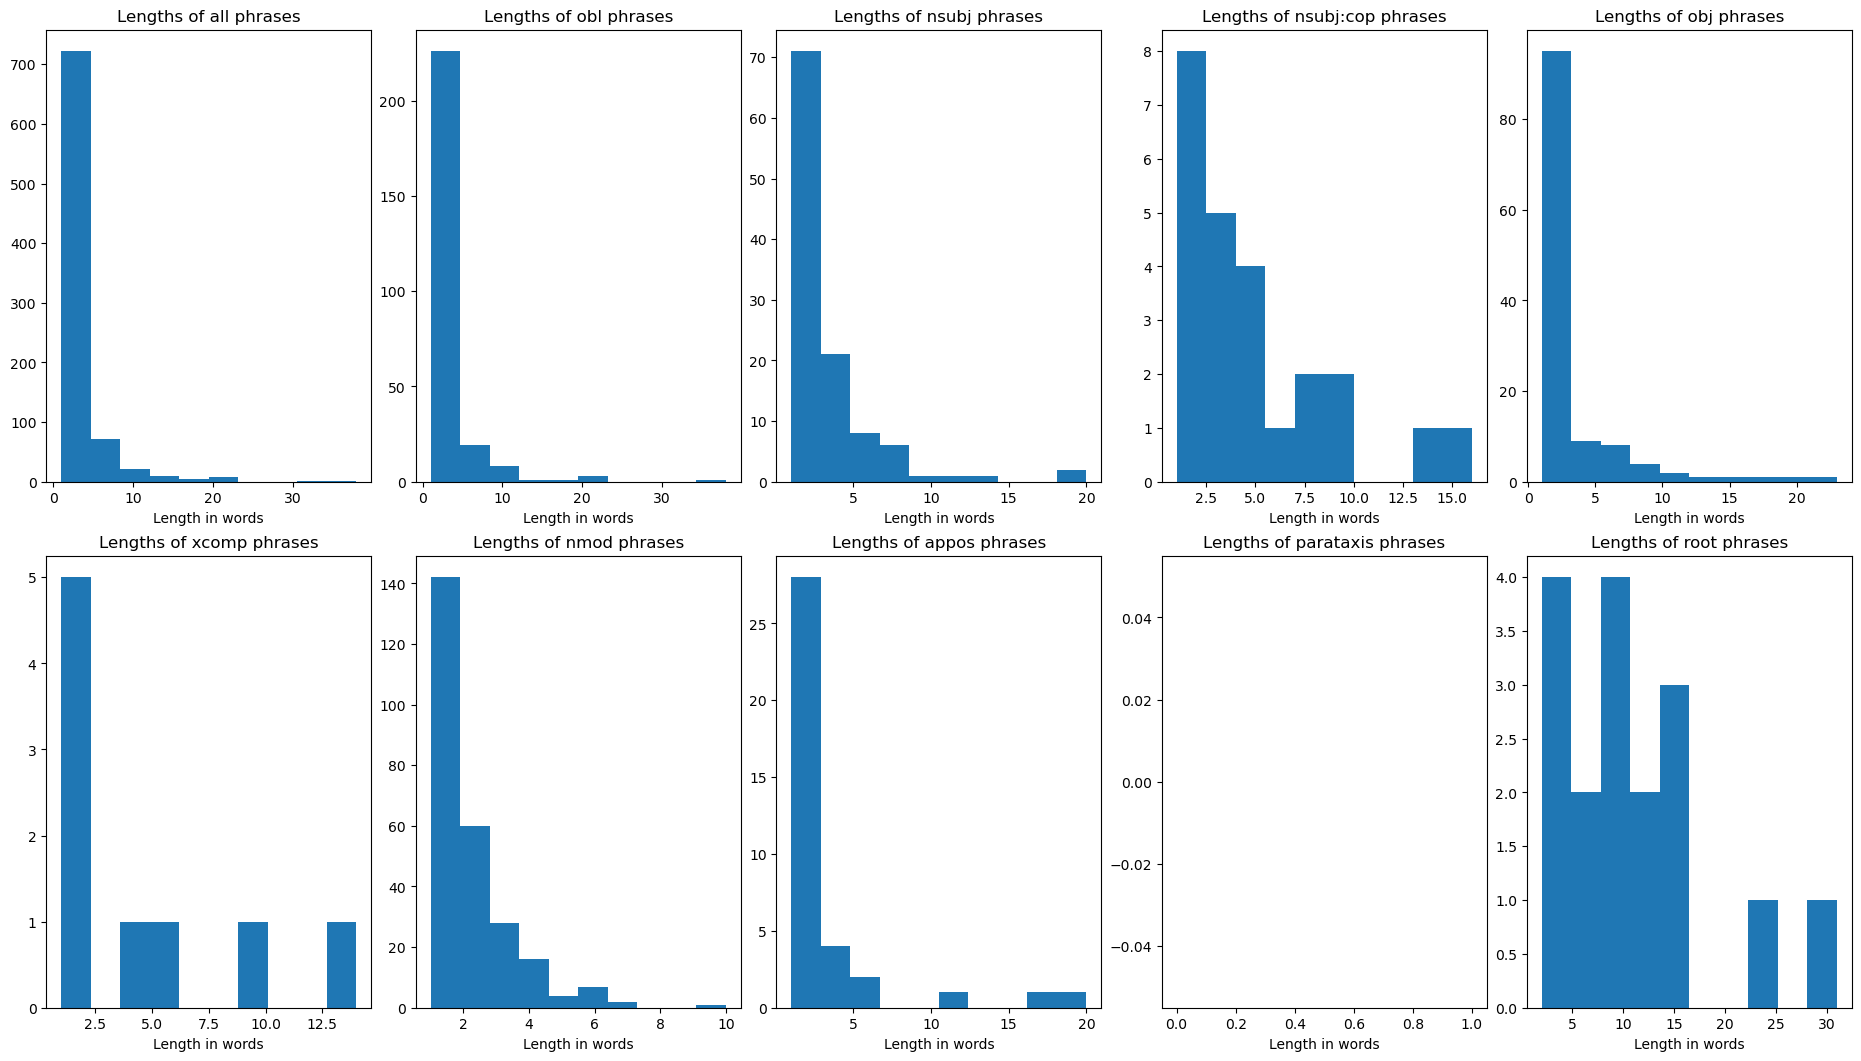

In [31]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, constrained_layout=True)
ax1.set_title('Lengths of all phrases')
ax1.set_xlabel('Length in words')
ax1.hist(all_phrase_lengths)
ax2.set_title('Lengths of obl phrases')
ax2.set_xlabel('Length in words')
ax2.hist(obl_phrase_lengths)
ax3.set_title('Lengths of nsubj phrases')
ax3.set_xlabel('Length in words')
ax3.hist(nsubj_phrase_lengths)
ax4.set_title('Lengths of nsubj:cop phrases')
ax4.set_xlabel('Length in words')
ax4.hist(nsubj_cop_phrase_lengths)
ax5.set_title('Lengths of obj phrases')
ax5.set_xlabel('Length in words')
ax5.hist(obj_phrase_lengths)
ax6.set_title('Lengths of xcomp phrases')
ax6.set_xlabel('Length in words')
ax6.hist(xcomp_phrase_lengths)
ax7.set_title('Lengths of nmod phrases')
ax7.set_xlabel('Length in words')
ax7.hist(nmod_phrase_lengths)
ax8.set_title('Lengths of appos phrases')
ax8.set_xlabel('Length in words')
ax8.hist(appos_phrase_lengths)
ax9.set_title('Lengths of parataxis phrases')
ax9.set_xlabel('Length in words')
ax9.hist(parataxis_phrase_lengths)
ax10.set_title('Lengths of root phrases')
ax10.set_xlabel('Length in words')
ax10.hist(root_phrase_lengths)
plt.show()

### Graph code ja groupby() graafidel

Graafe ei saa otse võrrelda ega grupeerida. Seetõttu loome sõne kujul graafi koodi.

In [22]:
test_graph = df['graph'][2]

In [23]:
get_graph_code(test_graph)

'((0, 1, root),(1, 3, nmod),(3, 2, nmod),(3, 4, case))'

In [24]:
get_graph_code(test_graph, ['pos'])

'(S-S-S-K,(0, 1, root),(1, 3, nmod),(3, 2, nmod),(3, 4, case))'

In [25]:
get_graph_code(test_graph, ['pos', 'ner_timex'])

'(0-0-0-0,S-S-S-K,(0, 1, root),(1, 3, nmod),(3, 2, nmod),(3, 4, case))'

Tehakse uued tulbad, eri tüüpi koodide jaoks. Nende järgi toimubki hiljem grupeerimine.

In [26]:
df['graph_code'] = [get_graph_code(graph) for graph in df['graph']]

In [27]:
df['graph_code_pos'] = [get_graph_code(graph, ['pos']) for graph in df['graph']]

In [28]:
df['graph_code_pos_ner_timex'] = [get_graph_code(graph, ['pos', 'ner_timex']) for graph in df['graph']]

In [29]:
df.to_pickle("./noun_phrase_data.pkl") 

In [30]:
df = pd.read_pickle("./noun_phrase_data.pkl")
df

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
0,Text(text='kütuse salakaubandusega'),0,"(55, 78)",obl_phrase,0,0,S-S,"(1, 0, 2)","((0, 1, root),(1, 2, nmod))","(S-S,(0, 1, root),(1, 2, nmod))","(0-0,S-S,(0, 1, root),(1, 2, nmod))"
1,Text(text='Sellisele järeldusele'),0,"(81, 102)",obl_phrase,0,0,P-S,"(1, 2, 0)","((0, 2, root),(2, 1, det))","(S-P,(0, 2, root),(2, 1, det))","(0-0,S-P,(0, 2, root),(2, 1, det))"
2,Text(text='naftaäri kriminaalasja uurimise käigus'),0,"(111, 149)",obl_phrase,0,0,S-S-S-K,"(1, 0, 2, 3, 4)","((0, 1, root),(1, 3, nmod),(3, 2, nmod),(3, 4, case))","(S-S-S-K,(0, 1, root),(1, 3, nmod),(3, 2, nmod),(3, 4, case))","(0-0-0-0,S-S-S-K,(0, 1, root),(1, 3, nmod),(3, 2, nmod),(3, 4, case))"
3,Text(text='Rootsis'),0,"(173, 180)",obl_phrase,0,0,H,"(1, 0)","((0, 1, root))","(H,(0, 1, root))","(0,H,(0, 1, root))"
4,Text(text='Rootsis registreeritud firma sildi all'),0,"(173, 211)",obl_phrase,1,0,H-(V|A)-S-S-K,"(1, 2, 3, 4, 0, 5)","((0, 4, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod),(4, 5, case))","(S-H-(V|A)-S-K,(0, 4, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod),(4, 5, case))","(0-ner_LOC-0-0-0,S-H-(V|A)-S-K,(0, 4, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod),(4, 5, case))"
...,...,...,...,...,...,...,...,...,...,...,...
835,"Text(text='Kirjal on ka lennujaama lubadebüroo resolutsioon pääslale nr. 2 : “ Lubada läbipääs lennujaama territooriumile sõiduautole 094 ABX , sõiduautole 139 ADF , veoautole 031 ABL ja sõiduautole 099 AUN .')",0,"(10490, 10687)",root_phrase,0,0,S-V-D-S-S-S-S-Y-N-Z-Z-V-S-S-S-S-N-Y-Z-S-N-Y-Z-S-N-Y-J-S-N-S-Z,"(1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 28, 29, 31)","((0, 1, root),(1, 2, cop),(1, 3, advmod),(1, 6, nsubj:cop),(1, 12, parataxis),(1, 31, punct),(5, 4, nmod),(6, 5, nmod),(6, 7, nmod),(7, 8, appos),(8, 9, flat),(12, 10, punct),(12, 11, punct),(12, 13, obj),(12, 15, obl),(12, 16, obl),(12, 18, obj),(12, 20, conj),(12, 24, conj),(12, 26, conj),(12, 30, conj),(15, 14, nmod),(18, 17, nummod),(20, 19, punct),(20, 22, orphan),(22, 21, nummod),(24, 23, punct),(26, 25, nummod),(30, 27, cc),(30, 28, nmod),(30, 29, nummod))","(S-V-D-S-V-Z-S-S-S-Y-N-Z-Z-S-S-S-Y-S-S-Y-S-S-N-Z-Y-N-Z-N-J-S-N,(0, 1, root),(1, 2, cop),(1, 3, advmod),(1, 6, nsubj:cop),(1, 12, parataxis),(1, 31, punct),(5, 4, nmod),(6, 5, nmod),(6, 7, nmod),(7, 8, appos),(8, 9, flat),(12, 10, punct),(12, 11, punct),(12, 13, obj),(12, 15, obl),(12, 16, obl),(12, 18, obj),(12, 20, conj),(12, 24, conj),(12, 26, conj),(12, 30, conj),(15, 14, nmod),(18, 17, nummod),(20, 19, punct),(20, 22, orphan),(22, 21, nummod),(24, 23, punct),(26, 25, nummod),(30, 27, cc),(30, 28, nmod),(30, 29, nummod))","(0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,S-V-D-S-V-Z-S-S-S-Y-N-Z-Z-S-S-S-Y-S-S-Y-S-S-N-Z-Y-N-Z-N-J-S-N,(0, 1, root),(1, 2, cop),(1, 3, advmod),(1, 6, nsubj:cop),(1, 12, parataxis),(1, 31, punct),(5, 4, nmod),(6, 5, nmod),(6, 7, nmod),(7, 8, appos),(8, 9, flat),(12, 10, punct),(12, 11, punct),(12, 13, obj),(12, 15, obl),(12, 16, obl),(12, 18, obj),(12, 20, conj),(12, 24, conj),(12, 26, conj),(12, 30, conj),(15, 14, nmod),(18, 17, nummod),(20, 19, punct),(20, 22, orphan),(22, 21, nummod),(24, 23, punct),(26, 25, nummod),(30, 27, cc),(30, 28, nmod),(30, 29, nummod))"
836,Text(text='” Need kõik on Eesti Panga autod .'),0,"(10688, 10722)",root_phrase,1,0,Z-P-P-V-H-H-S-Z,"(1, 7, 2, 3, 4, 5, 6, 0, 8)","((0, 7, root),(2, 3, det),(6, 5, nmod),(7, 1, punct),(7, 2, nsubj:cop),(7, 4, cop),(7, 6, nmod),(7, 8, punct))","(S-P-P-H-H-Z-V-Z,(0, 7, root),(2, 3, det),(6, 5, nmod),(7, 1, punct),(7, 2, nsubj:cop),(7, 4, cop),(7, 6, nmod),(7, 8, punct))","(0-0-0-ner_ORG-ner_ORG-0-0-0,S-P-P-H-H-Z-V-Z,(0, 7, root),(2, 3, det),(6, 5, nmod),(7, 1, punct),(7, 2, nsubj:cop),(7, 4, cop),(7, 6, nmod),(7, 8, punct))"
837,Text(text='Deklaratsioonil on ka märge : “ Pealelaaditud kauba kogust ei õnnestunud kindlaks

Grupeerides ainult ID-de alusel:

In [31]:
# grupeerides ainul ID-de ja deprel-atribuutide alusel
grouped_df2 = df.groupby('graph_code')

In [32]:
grouped_df2.describe()

phrase  \
                                                                                                                                                                                                                                                                                                                                             count   
graph_code                                                                                                                                                                                                                                                                                                                                           
((0, 1, root))                                                                                                                                                                                                                                                                                                                                 342   
((0, 1, root),(1, 10, acl),(6, 8, conj),(8, 7, cc),(9, 6, acl),(10, 2, punct),(10, 3, mark),(10, 4, obj),(10, 5, aux),(10, 9, obj))                                                                                                                                                                                                              1   
((0, 1, root),(1, 13, acl:relcl),(3, 4, case),(5, 6, flat),(7, 5, nmod),(7, 8, case),(9, 3, obl),(9, 7, obl),(10, 11, flat),(12, 9, acl),(12, 10, nmod),(13, 2, punct),(13, 12, obj),(13, 15, obl),(13, 16, obl),(13, 17, obl),(13, 21, conj),(15, 14, nmod),(21, 18, cc),(21, 19, advmod),(21, 20, advmod),(21, 22, punct),(21, 23, nmod))      1   
((0, 1, root),(1, 2, acl),(2, 3, compound:prt),(2, 5, obj),(5, 4, nmod))                                                                                                                                                                                                                                                                         1   
((0, 1, root),(1, 2, acl),(2, 5, obl),(2, 7, obl),(4, 3, nmod),(5, 4, nmod),(7, 6, nmod),(7, 10, conj),(7, 12, conj),(7, 14, conj),(10, 8, punct),(10, 9, nmod),(12, 11, punct),(14, 13, cc))                                                                                                                                                    1   
...                                                                                                                                                                                                                                                                                                                                            ...   
((0, 7, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod),(4, 5, case),(6, 4, obl),(7, 6, acl))                                                                                                                                                                                                                                                         1   
((0, 7, root),(2, 3, det),(6, 5, nmod),(7, 1, punct),(7, 2, nsubj:cop),(7, 4, cop),(7, 6, nmod),(7, 8, punct))                                                                                                                                                                                                                                   1   
((0, 8, root),(2, 1, advmod),(5, 4, compound),(6, 5, nummod),(7, 3, punct),(7, 6, obl),(8, 2, amod),(8, 7, amod))                                                                                                                                                                                                                                1   
((0, 8, root),(2, 1, nmod),(2, 6, parataxis),(6, 3, punct),(6, 4, nmod),(6, 5, nmod),(6, 7, punct),(8, 2, nmod),(8, 9, case))                                                                                                       

Grupeerides ID-de ja POS-järjestuste alusel:

In [33]:
# grupeerides ID-de ja POS-järjestuste alusel
grouped_df3 = df.groupby('graph_code_pos')

In [34]:
grouped_df3.describe()

phrase  \
                                                                                                                                                                                     count   
graph_code_pos                                                                                                                                                                               
((V|A)-H-S-H-S-S-K,(0, 2, root),(2, 1, obl),(2, 6, nmod),(4, 3, nmod),(5, 4, nmod),(6, 5, nmod),(6, 7, case))                                                                            1   
((V|A)-H-S-S-Y-H-H-H-J-H,(0, 2, root),(2, 1, obl),(2, 5, obl),(3, 4, flat),(5, 3, nmod),(5, 6, appos),(6, 7, flat),(6, 9, conj),(9, 8, cc),(9, 10, flat))                                1   
(A,(0, 1, root))                                                                                                                                                                         2   
(D-P-K,(0, 3, root),(1, 2, case),(3, 1, obl))                                                                                                                                            1   
(D-Z-Z,(0, 2, root),(2, 1, punct),(2, 3, punct))                                                                                                                                         1   
...                                                                                                                                                                                    ...   
(Y-N-V-Z-P-S-H-H-Z-H-Z,(0, 1, root),(1, 2, nummod),(1, 5, acl:relcl),(5, 3, punct),(5, 4, nsubj),(5, 6, obl),(5, 7, obl),(7, 9, appos),(9, 8, punct),(9, 11, flat),(11, 10, punct))      1   
(Y-O,(0, 1, root),(1, 2, flat))                                                                                                                                                          1   
(Y-S,(0, 1, root),(1, 2, flat))                                                                                                                                                          1   
(Y-S,(0, 2, root),(2, 1, nmod))                                                                                                                                                          1   
(Y-Y,(0, 1, root),(1, 2, flat))                                                                                                                                                          1   

                                                                                                                                                                                            \
                                                                                                                                                                                    unique   
graph_code_pos                                                                                                                                                                               
((V|A)-H-S-H-S-S-K,(0, 2, root),(2, 1, obl),(2, 6, nmod),(4, 3, nmod),(5, 4, nmod),(6, 5, nmod),(6, 7, case))                                                                            1   
((V|A)-H-S-S-Y-H-H-H-J-H,(0, 2, root),(2, 1, obl),(2, 5, obl),(3, 4, flat),(5, 3, nmod),(5, 6, appos),(6, 7, flat),(6, 9, conj),(9, 8, cc),(9, 10, flat))                                1   
(A,(0, 1, root))                                                                                                                                                                         2   
(D-P-K,(0, 3, root),(1, 2, case),(3, 1, obl))                                                                                                                                            1   
(D-Z-Z,(0, 2, root),(2, 1, punct),(2, 3, punct))                                                                                                                                         1   

Grupeerides ID-de, POS-järjestuste ja ner/timex entiteetide alusel:

In [35]:
# grupeerides ID-de, POS-järjestuste ja ner/timex entiteetide alusel
grouped_df4 = df.groupby('graph_code_pos_ner_timex')

In [36]:
grouped_df4.describe()

phrase  \
                                                                                                                                                                                                                                                                                                                                                                                                                count   
graph_code_pos_ner_timex                                                                                                                                                                                                                                                                                                                                                                                                
(0,A,(0, 1, root))                                                                                                                                                                                                                                                                                                                                                                                                  2   
(0,G,(0, 1, root))                                                                                                                                                                                                                                                                                                                                                                                                  4   
(0,H,(0, 1, root))                                                                                                                                                                                                                                                                                                                                                                                                107   
(0,K,(0, 1, root))                                                                                                                                                                                                                                                                                                                                                                                                  2   
(0,N,(0, 1, root))                                                                                                                                                                                                                                                                                                                                                                                                  1   
...                                                                                                                                                                                                                                                                                                                                                                                                               ...   
(ner_PER-ner_PER-0-0-0,H-H-H-J-H,(0, 1, root),(1, 2, flat),(1, 4, conj),(4, 3, cc),(4, 5, flat))                                                                                                                                                                                                                                                                                                                    1   
(ner_PER-ner_PER-0-0-0,H-H-H-Z-J,(0, 1, root),(1, 3, conj),(1, 5, conj),(3, 2, punct),(5, 4, cc))                                                                                                                                                                                                                    

Grupid ja nende liikmed:

In [37]:
# grupeeritud ID-de ja ner/timex entiteetide alusel
for name, group in grouped_df4:
    display(name, group, len(group))

'(0,A,(0, 1, root))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
231,Text(text='Viimasega'),0,"(12170, 12179)",obl_phrase,0,0,A,"(1, 0)","((0, 1, root))","(A,(0, 1, root))","(0,A,(0, 1, root))"
293,Text(text='Viimane'),0,"(4163, 4170)",nsubj_phrase,0,0,A,"(1, 0)","((0, 1, root))","(A,(0, 1, root))","(0,A,(0, 1, root))"


2

'(0,G,(0, 1, root))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
666,Text(text='Balti'),0,"(6766, 6771)",nmod_phrase,0,0,G,"(1, 0)","((0, 1, root))","(G,(0, 1, root))","(0,G,(0, 1, root))"
694,Text(text='Balti'),0,"(8198, 8203)",nmod_phrase,0,0,G,"(1, 0)","((0, 1, root))","(G,(0, 1, root))","(0,G,(0, 1, root))"
710,Text(text='Balti'),0,"(9065, 9070)",nmod_phrase,0,0,G,"(1, 0)","((0, 1, root))","(G,(0, 1, root))","(0,G,(0, 1, root))"
785,Text(text='Balti'),0,"(13782, 13787)",nmod_phrase,0,0,G,"(1, 0)","((0, 1, root))","(G,(0, 1, root))","(0,G,(0, 1, root))"


4

'(0,H,(0, 1, root))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
3,Text(text='Rootsis'),0,"(173, 180)",obl_phrase,0,0,H,"(1, 0)","((0, 1, root))","(H,(0, 1, root))","(0,H,(0, 1, root))"
5,Text(text='Eestis'),0,"(236, 242)",obl_phrase,0,0,H,"(1, 0)","((0, 1, root))","(H,(0, 1, root))","(0,H,(0, 1, root))"
37,Text(text='Moskvas'),0,"(2270, 2277)",obl_phrase,0,0,H,"(1, 0)","((0, 1, root))","(H,(0, 1, root))","(0,H,(0, 1, root))"
42,Text(text='Toompeal'),0,"(2552, 2560)",obl_phrase,0,0,H,"(1, 0)","((0, 1, root))","(H,(0, 1, root))","(0,H,(0, 1, root))"
62,Text(text='Silvesega'),0,"(3532, 3541)",obl_phrase,0,0,H,"(1, 0)","((0, 1, root))","(H,(0, 1, root))","(0,H,(0, 1, root))"
...,...,...,...,...,...,...,...,...,...,...,...
770,Text(text='Pruuli'),0,"(12331, 12337)",nmod_phrase,0,0,H,"(1, 0)","((0, 1, root))","(H,(0, 1, root))","(0,H,(0, 1, root))"
781,Text(text='Eesti'),0,"(13212, 13217)",nmod_phrase,0,0,H,"(1, 0)","((0, 1, root))","(H,(0, 1, root))","(0,H,(0, 1, root))"
801,Text(text='Rogulin'),0,"(4975, 4982)",appos_phrase,0,0,H,"(1, 0)","((0, 1, root))","(H,(0, 1, root))","(0,H,(0, 1, root))"
802,Text(text='Mertvetsova'),0,"(5011, 5022)",appos_phrase,0,0,H,"(1, 0)","((0, 1, root))","(H,(0, 1, root))","(0,H,(0, 1, root))"


107

'(0,K,(0, 1, root))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
51,Text(text='käigus'),0,"(3071, 3077)",obl_phrase,0,0,K,"(1, 0)","((0, 1, root))","(K,(0, 1, root))","(0,K,(0, 1, root))"
96,Text(text='käigus'),0,"(5208, 5214)",obl_phrase,0,0,K,"(1, 0)","((0, 1, root))","(K,(0, 1, root))","(0,K,(0, 1, root))"


2

'(0,N,(0, 1, root))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
130,Text(text='21.30'),0,"(6606, 6611)",obl_phrase,0,0,N,"(1, 0)","((0, 1, root))","(N,(0, 1, root))","(0,N,(0, 1, root))"


1

'(0,P,(0, 1, root))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
15,Text(text='Sellele'),0,"(830, 837)",obl_phrase,0,0,P,"(1, 0)","((0, 1, root))","(P,(0, 1, root))","(0,P,(0, 1, root))"
24,Text(text='endale'),0,"(1526, 1532)",obl_phrase,0,0,P,"(1, 0)","((0, 1, root))","(P,(0, 1, root))","(0,P,(0, 1, root))"
44,Text(text='Selles'),0,"(2630, 2636)",obl_phrase,0,0,P,"(1, 0)","((0, 1, root))","(P,(0, 1, root))","(0,P,(0, 1, root))"
48,Text(text='milles'),0,"(2922, 2928)",obl_phrase,0,0,P,"(1, 0)","((0, 1, root))","(P,(0, 1, root))","(0,P,(0, 1, root))"
59,Text(text='kellega'),0,"(3457, 3464)",obl_phrase,0,0,P,"(1, 0)","((0, 1, root))","(P,(0, 1, root))","(0,P,(0, 1, root))"
69,Text(text='temale'),0,"(3781, 3787)",obl_phrase,0,0,P,"(1, 0)","((0, 1, root))","(P,(0, 1, root))","(0,P,(0, 1, root))"
80,Text(text='sellest'),0,"(4546, 4553)",obl_phrase,0,0,P,"(1, 0)","((0, 1, root))","(P,(0, 1, root))","(0,P,(0, 1, root))"
90,Text(text='millega'),0,"(5080, 5087)",obl_phrase,0,0,P,"(1, 0)","((0, 1, root))","(P,(0, 1, root))","(0,P,(0, 1, root))"
97,Text(text='Selles'),0,"(5262, 5268)",obl_phrase,0,0,P,"(1, 0)","((0, 1, root))","(P,(0, 1, root))","(0,P,(0, 1, root))"
167,Text(text='Seda'),0,"(8311, 8315)",obl_phrase,0,0,P,"(1, 0)","((0, 1, root))","(P,(0, 1, root))","(0,P,(0, 1, root))"


47

'(0,S,(0, 1, root))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
22,Text(text='Kokkuleppele'),0,"(1248, 1260)",obl_phrase,0,0,S,"(1, 0)","((0, 1, root))","(S,(0, 1, root))","(0,S,(0, 1, root))"
32,Text(text='remigratsioonifondile'),0,"(1936, 1957)",obl_phrase,0,0,S,"(1, 0)","((0, 1, root))","(S,(0, 1, root))","(0,S,(0, 1, root))"
76,Text(text='peaministrilt'),0,"(4073, 4086)",obl_phrase,0,0,S,"(1, 0)","((0, 1, root))","(S,(0, 1, root))","(0,S,(0, 1, root))"
82,Text(text='vahendajatele'),0,"(4661, 4674)",obl_phrase,0,0,S,"(1, 0)","((0, 1, root))","(S,(0, 1, root))","(0,S,(0, 1, root))"
85,Text(text='emissiooniosakonnale'),0,"(4778, 4798)",obl_phrase,0,0,S,"(1, 0)","((0, 1, root))","(S,(0, 1, root))","(0,S,(0, 1, root))"
...,...,...,...,...,...,...,...,...,...,...,...
772,Text(text='sularaharublade'),0,"(12668, 12683)",nmod_phrase,0,0,S,"(1, 0)","((0, 1, root))","(S,(0, 1, root))","(0,S,(0, 1, root))"
777,Text(text='rublamüügi'),0,"(13013, 13023)",nmod_phrase,0,0,S,"(1, 0)","((0, 1, root))","(S,(0, 1, root))","(0,S,(0, 1, root))"
779,Text(text='riigi'),0,"(13106, 13111)",nmod_phrase,0,0,S,"(1, 0)","((0, 1, root))","(S,(0, 1, root))","(0,S,(0, 1, root))"
784,Text(text='rublamüügi'),0,"(13680, 13690)",nmod_phrase,0,0,S,"(1, 0)","((0, 1, root))","(S,(0, 1, root))","(0,S,(0, 1, root))"


160

'(0,Y,(0, 1, root))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
345,Text(text='TU'),0,"(10854, 10856)",nsubj_phrase,0,0,Y,"(1, 0)","((0, 1, root))","(Y,(0, 1, root))","(0,Y,(0, 1, root))"
346,Text(text='134A'),0,"(10857, 10861)",nsubj_phrase,0,0,Y,"(1, 0)","((0, 1, root))","(Y,(0, 1, root))","(0,Y,(0, 1, root))"
357,Text(text='PEP'),0,"(12184, 12187)",nsubj_phrase,0,0,Y,"(1, 0)","((0, 1, root))","(Y,(0, 1, root))","(0,Y,(0, 1, root))"
563,Text(text='NSVLi'),0,"(1367, 1372)",nmod_phrase,0,0,Y,"(1, 0)","((0, 1, root))","(Y,(0, 1, root))","(0,Y,(0, 1, root))"
589,Text(text='nr.'),0,"(2622, 2625)",nmod_phrase,0,0,Y,"(1, 0)","((0, 1, root))","(Y,(0, 1, root))","(0,Y,(0, 1, root))"
624,Text(text='nr.'),0,"(4733, 4736)",nmod_phrase,0,0,Y,"(1, 0)","((0, 1, root))","(Y,(0, 1, root))","(0,Y,(0, 1, root))"
671,Text(text='TESS'),0,"(7091, 7095)",nmod_phrase,0,0,Y,"(1, 0)","((0, 1, root))","(Y,(0, 1, root))","(0,Y,(0, 1, root))"
685,Text(text='NoWe'),0,"(7515, 7519)",nmod_phrase,0,0,Y,"(1, 0)","((0, 1, root))","(Y,(0, 1, root))","(0,Y,(0, 1, root))"
701,Text(text='NoWe'),0,"(8578, 8582)",nmod_phrase,0,0,Y,"(1, 0)","((0, 1, root))","(Y,(0, 1, root))","(0,Y,(0, 1, root))"
712,Text(text='NoWe'),0,"(9190, 9194)",nmod_phrase,0,0,Y,"(1, 0)","((0, 1, root))","(Y,(0, 1, root))","(0,Y,(0, 1, root))"


17

'(0-0,H-D,(0, 2, root),(2, 1, advmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
157,Text(text='kas Lätis'),0,"(7953, 7962)",obl_phrase,0,0,D-H,"(1, 2, 0)","((0, 2, root),(2, 1, advmod))","(H-D,(0, 2, root),(2, 1, advmod))","(0-0,H-D,(0, 2, root),(2, 1, advmod))"
324,Text(text='ka Interpol'),0,"(8296, 8307)",nsubj_phrase,0,0,D-H,"(1, 2, 0)","((0, 2, root),(2, 1, advmod))","(H-D,(0, 2, root),(2, 1, advmod))","(0-0,H-D,(0, 2, root),(2, 1, advmod))"


2

'(0-0,H-H,(0, 1, root),(1, 2, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
64,Text(text='Pruuli Silvesega'),0,"(3580, 3596)",obl_phrase,0,0,H-H,"(1, 0, 2)","((0, 1, root),(1, 2, flat))","(H-H,(0, 1, root),(1, 2, flat))","(0-0,H-H,(0, 1, root),(1, 2, flat))"
280,Text(text='Silvesja Apananski'),0,"(2494, 2512)",nsubj_phrase,0,0,H-H,"(1, 0, 2)","((0, 1, root),(1, 2, flat))","(H-H,(0, 1, root),(1, 2, flat))","(0-0,H-H,(0, 1, root),(1, 2, flat))"
289,Text(text='Leonid Apananski'),0,"(3758, 3774)",nsubj_phrase,0,0,H-H,"(1, 0, 2)","((0, 1, root),(1, 2, flat))","(H-H,(0, 1, root),(1, 2, flat))","(0-0,H-H,(0, 1, root),(1, 2, flat))"
291,Text(text='Tiit Pruuli'),0,"(3926, 3937)",nsubj_phrase,0,0,H-H,"(1, 0, 2)","((0, 1, root),(1, 2, flat))","(H-H,(0, 1, root),(1, 2, flat))","(0-0,H-H,(0, 1, root),(1, 2, flat))"
312,Text(text='Siim Kallas'),0,"(6109, 6120)",nsubj_phrase,0,0,H-H,"(1, 0, 2)","((0, 1, root),(1, 2, flat))","(H-H,(0, 1, root),(1, 2, flat))","(0-0,H-H,(0, 1, root),(1, 2, flat))"
322,Text(text='Eskado Luks'),0,"(7703, 7714)",nsubj_phrase,0,0,H-H,"(1, 0, 2)","((0, 1, root),(1, 2, flat))","(H-H,(0, 1, root),(1, 2, flat))","(0-0,H-H,(0, 1, root),(1, 2, flat))"
340,Text(text='Siim Kallas'),0,"(9983, 9994)",nsubj_phrase,0,0,H-H,"(1, 0, 2)","((0, 1, root),(1, 2, flat))","(H-H,(0, 1, root),(1, 2, flat))","(0-0,H-H,(0, 1, root),(1, 2, flat))"
343,Text(text='Tiit Pruuli'),0,"(10335, 10346)",nsubj_phrase,0,0,H-H,"(1, 0, 2)","((0, 1, root),(1, 2, flat))","(H-H,(0, 1, root),(1, 2, flat))","(0-0,H-H,(0, 1, root),(1, 2, flat))"
344,Text(text='Marko Tibar'),0,"(10793, 10804)",nsubj_phrase,0,0,H-H,"(1, 0, 2)","((0, 1, root),(1, 2, flat))","(H-H,(0, 1, root),(1, 2, flat))","(0-0,H-H,(0, 1, root),(1, 2, flat))"
415,Text(text='Siim Kallast'),0,"(2532, 2544)",obj_phrase,0,0,H-H,"(1, 0, 2)","((0, 1, root),(1, 2, flat))","(H-H,(0, 1, root),(1, 2, flat))","(0-0,H-H,(0, 1, root),(1, 2, flat))"


32

'(0-0,H-H,(0, 2, root),(2, 1, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
545,Text(text='Vene Föderatsiooni'),0,"(689, 707)",nmod_phrase,0,0,H-H,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(H-H,(0, 2, root),(2, 1, nmod))","(0-0,H-H,(0, 2, root),(2, 1, nmod))"
560,Text(text='Eesti Panga'),0,"(1220, 1231)",nmod_phrase,0,0,H-H,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(H-H,(0, 2, root),(2, 1, nmod))","(0-0,H-H,(0, 2, root),(2, 1, nmod))"
567,Text(text='Eesti Panga'),0,"(1588, 1599)",nmod_phrase,0,0,H-H,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(H-H,(0, 2, root),(2, 1, nmod))","(0-0,H-H,(0, 2, root),(2, 1, nmod))"
580,Text(text='Eesti Panga'),0,"(2199, 2210)",nmod_phrase,0,0,H-H,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(H-H,(0, 2, root),(2, 1, nmod))","(0-0,H-H,(0, 2, root),(2, 1, nmod))"
599,Text(text='Eesti Panga'),0,"(3025, 3036)",nmod_phrase,0,0,H-H,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(H-H,(0, 2, root),(2, 1, nmod))","(0-0,H-H,(0, 2, root),(2, 1, nmod))"
642,Text(text='Eesti Panga'),0,"(5532, 5543)",nmod_phrase,0,0,H-H,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(H-H,(0, 2, root),(2, 1, nmod))","(0-0,H-H,(0, 2, root),(2, 1, nmod))"
650,Text(text='Eesti Panga'),0,"(5906, 5917)",nmod_phrase,0,0,H-H,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(H-H,(0, 2, root),(2, 1, nmod))","(0-0,H-H,(0, 2, root),(2, 1, nmod))"
709,Text(text='Eesti Panga'),0,"(8987, 8998)",nmod_phrase,0,0,H-H,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(H-H,(0, 2, root),(2, 1, nmod))","(0-0,H-H,(0, 2, root),(2, 1, nmod))"
754,Text(text='Eesti Panga'),0,"(10703, 10714)",nmod_phrase,0,0,H-H,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(H-H,(0, 2, root),(2, 1, nmod))","(0-0,H-H,(0, 2, root),(2, 1, nmod))"
782,Text(text='Eesti Panga'),0,"(13212, 13223)",nmod_phrase,0,0,H-H,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(H-H,(0, 2, root),(2, 1, nmod))","(0-0,H-H,(0, 2, root),(2, 1, nmod))"


10

'(0-0,H-S,(0, 1, root),(1, 2, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
713,Text(text='Koneston Ltd-le'),0,"(9362, 9377)",nmod_phrase,0,0,H-S,"(1, 0, 2)","((0, 1, root),(1, 2, flat))","(H-S,(0, 1, root),(1, 2, flat))","(0-0,H-S,(0, 1, root),(1, 2, flat))"


1

'(0-0,K-P,(0, 2, root),(2, 1, det))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
219,Text(text='sel korral'),0,"(11449, 11459)",obl_phrase,0,0,P-K,"(1, 2, 0)","((0, 2, root),(2, 1, det))","(K-P,(0, 2, root),(2, 1, det))","(0-0,K-P,(0, 2, root),(2, 1, det))"


1

'(0-0,O-Y,(0, 2, root),(2, 1, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
794,Text(text='nr. 40.'),0,"(2622, 2629)",appos_phrase,0,0,Y-O,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(O-Y,(0, 2, root),(2, 1, nmod))","(0-0,O-Y,(0, 2, root),(2, 1, nmod))"


1

'(0-0,P-K,(0, 1, root),(1, 2, case))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
225,Text(text='meie käest'),0,"(11709, 11719)",obl_phrase,0,0,P-K,"(1, 0, 2)","((0, 1, root),(1, 2, case))","(P-K,(0, 1, root),(1, 2, case))","(0-0,P-K,(0, 1, root),(1, 2, case))"


1

'(0-0,P-K,(0, 2, root),(2, 1, case))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
41,Text(text='Pärast seda'),0,"(2514, 2525)",obl_phrase,0,0,K-P,"(1, 2, 0)","((0, 2, root),(2, 1, case))","(P-K,(0, 2, root),(2, 1, case))","(0-0,P-K,(0, 2, root),(2, 1, case))"
55,Text(text='Pärast seda'),0,"(3249, 3260)",obl_phrase,0,0,K-P,"(1, 2, 0)","((0, 2, root),(2, 1, case))","(P-K,(0, 2, root),(2, 1, case))","(0-0,P-K,(0, 2, root),(2, 1, case))"
100,Text(text='Pärast seda'),0,"(5500, 5511)",obl_phrase,0,0,K-P,"(1, 2, 0)","((0, 2, root),(2, 1, case))","(P-K,(0, 2, root),(2, 1, case))","(0-0,P-K,(0, 2, root),(2, 1, case))"
148,Text(text='Pärast seda'),0,"(7531, 7542)",obl_phrase,0,0,K-P,"(1, 2, 0)","((0, 2, root),(2, 1, case))","(P-K,(0, 2, root),(2, 1, case))","(0-0,P-K,(0, 2, root),(2, 1, case))"
156,Text(text='Pärast seda'),0,"(7929, 7940)",obl_phrase,0,0,K-P,"(1, 2, 0)","((0, 2, root),(2, 1, case))","(P-K,(0, 2, root),(2, 1, case))","(0-0,P-K,(0, 2, root),(2, 1, case))"
248,Text(text='Pärast seda'),0,"(13282, 13293)",obl_phrase,0,0,K-P,"(1, 2, 0)","((0, 2, root),(2, 1, case))","(P-K,(0, 2, root),(2, 1, case))","(0-0,P-K,(0, 2, root),(2, 1, case))"
251,Text(text='Pärast seda'),0,"(13502, 13513)",obl_phrase,0,0,K-P,"(1, 2, 0)","((0, 2, root),(2, 1, case))","(P-K,(0, 2, root),(2, 1, case))","(0-0,P-K,(0, 2, root),(2, 1, case))"


7

'(0-0,P-P,(0, 1, root),(1, 2, det))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
384,Text(text='Need kõik'),0,"(10690, 10699)",nsubj_cop_phrase,0,0,P-P,"(1, 0, 2)","((0, 1, root),(1, 2, det))","(P-P,(0, 1, root),(1, 2, det))","(0-0,P-P,(0, 1, root),(1, 2, det))"


1

'(0-0,S-(A|V),(0, 2, root),(2, 1, acl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
370,Text(text='Saadud raha'),0,"(381, 392)",nsubj_cop_phrase,0,0,(A|V)-S,"(1, 2, 0)","((0, 2, root),(2, 1, acl))","(S-(A|V),(0, 2, root),(2, 1, acl))","(0-0,S-(A|V),(0, 2, root),(2, 1, acl))"
464,Text(text='Saadud raha'),0,"(7992, 8003)",obj_phrase,0,0,(A|V)-S,"(1, 2, 0)","((0, 2, root),(2, 1, acl))","(S-(A|V),(0, 2, root),(2, 1, acl))","(0-0,S-(A|V),(0, 2, root),(2, 1, acl))"
634,Text(text='nimetatud koguse'),0,"(5374, 5390)",nmod_phrase,0,0,(A|V)-S,"(1, 2, 0)","((0, 2, root),(2, 1, acl))","(S-(A|V),(0, 2, root),(2, 1, acl))","(0-0,S-(A|V),(0, 2, root),(2, 1, acl))"


3

'(0-0,S-(P|N),(0, 2, root),(2, 1, det))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
298,Text(text='ühtegi dokumenti'),0,"(4587, 4603)",nsubj_phrase,0,0,(P|N)-S,"(1, 2, 0)","((0, 2, root),(2, 1, det))","(S-(P|N),(0, 2, root),(2, 1, det))","(0-0,S-(P|N),(0, 2, root),(2, 1, det))"


1

'(0-0,S-(P|O),(0, 2, root),(2, 1, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
63,Text(text='Teist korda'),0,"(3561, 3572)",obl_phrase,0,0,(P|O)-S,"(1, 2, 0)","((0, 2, root),(2, 1, amod))","(S-(P|O),(0, 2, root),(2, 1, amod))","(0-0,S-(P|O),(0, 2, root),(2, 1, amod))"


1

'(0-0,S-(V|A),(0, 2, root),(2, 1, acl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
695,Text(text='kaaperdatud naftast'),0,"(8225, 8244)",nmod_phrase,0,0,(V|A)-S,"(1, 2, 0)","((0, 2, root),(2, 1, acl))","(S-(V|A),(0, 2, root),(2, 1, acl))","(0-0,S-(V|A),(0, 2, root),(2, 1, acl))"


1

'(0-0,S-A,(0, 2, root),(2, 1, acl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
53,Text(text='vastutavale hoiule'),0,"(3130, 3148)",obl_phrase,0,0,A-S,"(1, 2, 0)","((0, 2, root),(2, 1, acl))","(S-A,(0, 2, root),(2, 1, acl))","(0-0,S-A,(0, 2, root),(2, 1, acl))"
402,Text(text='vastavad garantiikohustused'),0,"(1498, 1525)",obj_phrase,0,0,A-S,"(1, 2, 0)","((0, 2, root),(2, 1, acl))","(S-A,(0, 2, root),(2, 1, acl))","(0-0,S-A,(0, 2, root),(2, 1, acl))"
758,Text(text='Pealelaaditud kauba'),0,"(11097, 11116)",nmod_phrase,0,0,A-S,"(1, 2, 0)","((0, 2, root),(2, 1, acl))","(S-A,(0, 2, root),(2, 1, acl))","(0-0,S-A,(0, 2, root),(2, 1, acl))"


3

'(0-0,S-A,(0, 2, root),(2, 1, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
70,Text(text='tollase standardfraasiga'),0,"(3796, 3820)",obl_phrase,0,0,A-S,"(1, 2, 0)","((0, 2, root),(2, 1, amod))","(S-A,(0, 2, root),(2, 1, amod))","(0-0,S-A,(0, 2, root),(2, 1, amod))"
87,Text(text='Järgmisel päeval'),0,"(4883, 4899)",obl_phrase,0,1,A-S,"(1, 2, 0)","((0, 2, root),(2, 1, amod))","(S-A,(0, 2, root),(2, 1, amod))","(0-0,S-A,(0, 2, root),(2, 1, amod))"
115,Text(text='teadmata suunas'),0,"(6006, 6021)",obl_phrase,0,0,A-S,"(1, 2, 0)","((0, 2, root),(2, 1, amod))","(S-A,(0, 2, root),(2, 1, amod))","(0-0,S-A,(0, 2, root),(2, 1, amod))"
165,Text(text='strateegilistest varudest'),0,"(8254, 8279)",obl_phrase,0,0,A-S,"(1, 2, 0)","((0, 2, root),(2, 1, amod))","(S-A,(0, 2, root),(2, 1, amod))","(0-0,S-A,(0, 2, root),(2, 1, amod))"
397,Text(text='omavahelise kokkuleppe'),0,"(717, 739)",obj_phrase,0,0,A-S,"(1, 2, 0)","((0, 2, root),(2, 1, amod))","(S-A,(0, 2, root),(2, 1, amod))","(0-0,S-A,(0, 2, root),(2, 1, amod))"
495,Text(text='kirjalikke lepinguid'),0,"(11912, 11932)",obj_phrase,0,0,A-S,"(1, 2, 0)","((0, 2, root),(2, 1, amod))","(S-A,(0, 2, root),(2, 1, amod))","(0-0,S-A,(0, 2, root),(2, 1, amod))"
675,Text(text='Viimase juhatuse'),0,"(7171, 7187)",nmod_phrase,0,0,A-S,"(1, 2, 0)","((0, 2, root),(2, 1, amod))","(S-A,(0, 2, root),(2, 1, amod))","(0-0,S-A,(0, 2, root),(2, 1, amod))"
746,Text(text='diplomaatilise pagasi'),0,"(10435, 10456)",nmod_phrase,0,0,A-S,"(1, 2, 0)","((0, 2, root),(2, 1, amod))","(S-A,(0, 2, root),(2, 1, amod))","(0-0,S-A,(0, 2, root),(2, 1, amod))"
783,Text(text='rahvusvaheliste rahandusorganisatsioonide'),0,"(13231, 13272)",nmod_phrase,0,0,A-S,"(1, 2, 0)","((0, 2, root),(2, 1, amod))","(S-A,(0, 2, root),(2, 1, amod))","(0-0,S-A,(0, 2, root),(2, 1, amod))"


9

'(0-0,S-C,(0, 2, root),(2, 1, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
513,Text(text='hilisemat uurimist'),0,"(13354, 13372)",obj_phrase,0,0,C-S,"(1, 2, 0)","((0, 2, root),(2, 1, amod))","(S-C,(0, 2, root),(2, 1, amod))","(0-0,S-C,(0, 2, root),(2, 1, amod))"


1

'(0-0,S-D,(0, 2, root),(2, 1, advmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
249,Text(text='koguni allilmaga'),0,"(13304, 13320)",obl_phrase,0,0,D-S,"(1, 2, 0)","((0, 2, root),(2, 1, advmod))","(S-D,(0, 2, root),(2, 1, advmod))","(0-0,S-D,(0, 2, root),(2, 1, advmod))"
277,Text(text='EP nõukogu'),0,"(1961, 1971)",nsubj_phrase,0,0,D-S,"(1, 2, 0)","((0, 2, root),(2, 1, advmod))","(S-D,(0, 2, root),(2, 1, advmod))","(0-0,S-D,(0, 2, root),(2, 1, advmod))"
386,Text(text='ka märge'),0,"(11084, 11092)",nsubj_cop_phrase,0,0,D-S,"(1, 2, 0)","((0, 2, root),(2, 1, advmod))","(S-D,(0, 2, root),(2, 1, advmod))","(0-0,S-D,(0, 2, root),(2, 1, advmod))"
467,Text(text='ka tulu'),0,"(8653, 8660)",obj_phrase,0,0,D-S,"(1, 2, 0)","((0, 2, root),(2, 1, advmod))","(S-D,(0, 2, root),(2, 1, advmod))","(0-0,S-D,(0, 2, root),(2, 1, advmod))"
514,Text(text='ainult riigiasutusi'),0,"(13480, 13499)",obj_phrase,0,0,D-S,"(1, 2, 0)","((0, 2, root),(2, 1, advmod))","(S-D,(0, 2, root),(2, 1, advmod))","(0-0,S-D,(0, 2, root),(2, 1, advmod))"
569,Text(text='EP garantiikohustuste'),0,"(1738, 1759)",nmod_phrase,0,0,D-S,"(1, 2, 0)","((0, 2, root),(2, 1, advmod))","(S-D,(0, 2, root),(2, 1, advmod))","(0-0,S-D,(0, 2, root),(2, 1, advmod))"
609,Text(text='ka valitsuse'),0,"(3685, 3697)",nmod_phrase,0,0,D-S,"(1, 2, 0)","((0, 2, root),(2, 1, advmod))","(S-D,(0, 2, root),(2, 1, advmod))","(0-0,S-D,(0, 2, root),(2, 1, advmod))"
778,Text(text='Juba rublade'),0,"(13074, 13086)",nmod_phrase,0,0,D-S,"(1, 2, 0)","((0, 2, root),(2, 1, advmod))","(S-D,(0, 2, root),(2, 1, advmod))","(0-0,S-D,(0, 2, root),(2, 1, advmod))"


8

'(0-0,S-D,(0, 2, root),(2, 1, case))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
238,Text(text='üle viivitusega'),0,"(12570, 12585)",obl_phrase,0,0,D-S,"(1, 2, 0)","((0, 2, root),(2, 1, case))","(S-D,(0, 2, root),(2, 1, case))","(0-0,S-D,(0, 2, root),(2, 1, case))"


1

'(0-0,S-G,(0, 2, root),(2, 1, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
257,Text(text='Balti naftamaffia'),0,"(13782, 13799)",obl_phrase,0,0,G-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-G,(0, 2, root),(2, 1, nmod))","(0-0,S-G,(0, 2, root),(2, 1, nmod))"
465,Text(text='Balti naftamaffia'),0,"(8198, 8215)",obj_phrase,0,0,G-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-G,(0, 2, root),(2, 1, nmod))","(0-0,S-G,(0, 2, root),(2, 1, nmod))"


2

'(0-0,S-H,(0, 1, root),(1, 2, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
457,Text(text='ülekanne Venemaale'),0,"(7473, 7491)",obj_phrase,0,0,S-H,"(1, 0, 2)","((0, 1, root),(1, 2, nmod))","(S-H,(0, 1, root),(1, 2, nmod))","(0-0,S-H,(0, 1, root),(1, 2, nmod))"


1

'(0-0,S-H,(0, 2, root),(2, 1, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
450,Text(text='Balti naftamaffiat'),0,"(6766, 6784)",obj_phrase,0,0,H-S,"(1, 2, 0)","((0, 2, root),(2, 1, amod))","(S-H,(0, 2, root),(2, 1, amod))","(0-0,S-H,(0, 2, root),(2, 1, amod))"
471,Text(text='Balti naftamaffiat'),0,"(9065, 9083)",obj_phrase,0,0,H-S,"(1, 2, 0)","((0, 2, root),(2, 1, amod))","(S-H,(0, 2, root),(2, 1, amod))","(0-0,S-H,(0, 2, root),(2, 1, amod))"


2

'(0-0,S-H,(0, 2, root),(2, 1, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
19,Text(text='Venemaa keskpangale'),0,"(1052, 1071)",obl_phrase,0,0,H-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-H,(0, 2, root),(2, 1, nmod))","(0-0,S-H,(0, 2, root),(2, 1, nmod))"
30,Text(text='Eesti Kütusele'),0,"(1862, 1876)",obl_phrase,0,0,H-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-H,(0, 2, root),(2, 1, nmod))","(0-0,S-H,(0, 2, root),(2, 1, nmod))"
123,Text(text='Tibari juhtimisel'),0,"(6414, 6431)",obl_phrase,0,0,H-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-H,(0, 2, root),(2, 1, nmod))","(0-0,S-H,(0, 2, root),(2, 1, nmod))"
168,Text(text='Läti siseministeeriumist'),0,"(8329, 8353)",obl_phrase,0,0,H-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-H,(0, 2, root),(2, 1, nmod))","(0-0,S-H,(0, 2, root),(2, 1, nmod))"
169,Text(text='Läti lennufirmalt'),0,"(8392, 8409)",obl_phrase,0,0,H-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-H,(0, 2, root),(2, 1, nmod))","(0-0,S-H,(0, 2, root),(2, 1, nmod))"
175,Text(text='Eesti riigile'),0,"(8805, 8818)",obl_phrase,0,0,H-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-H,(0, 2, root),(2, 1, nmod))","(0-0,S-H,(0, 2, root),(2, 1, nmod))"
325,Text(text='TAVIA lennukid'),0,"(8410, 8424)",nsubj_phrase,0,0,H-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-H,(0, 2, root),(2, 1, nmod))","(0-0,S-H,(0, 2, root),(2, 1, nmod))"
475,Text(text='Eesti kodakondsuse'),0,"(9858, 9876)",obj_phrase,0,0,H-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-H,(0, 2, root),(2, 1, nmod))","(0-0,S-H,(0, 2, root),(2, 1, nmod))"
543,Text(text='Eesti Vabariigi'),0,"(661, 676)",nmod_phrase,0,0,H-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-H,(0, 2, root),(2, 1, nmod))","(0-0,S-H,(0, 2, root),(2, 1, nmod))"
548,Text(text='Eesti Vabariigi'),0,"(776, 791)",nmod_phrase,0,0,H-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-H,(0, 2, root),(2, 1, nmod))","(0-0,S-H,(0, 2, root),(2, 1, nmod))"


20

'(0-0,S-K,(0, 1, root),(1, 2, case))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
9,Text(text='rahareformi käigus'),0,"(481, 499)",obl_phrase,0,0,S-K,"(1, 0, 2)","((0, 1, root),(1, 2, case))","(S-K,(0, 1, root),(1, 2, case))","(0-0,S-K,(0, 1, root),(1, 2, case))"
10,Text(text='kroonide vastu'),0,"(500, 514)",obl_phrase,0,0,S-K,"(1, 0, 2)","((0, 1, root),(1, 2, case))","(S-K,(0, 1, root),(1, 2, case))","(0-0,S-K,(0, 1, root),(1, 2, case))"
17,Text(text='rahavahetuse käigus'),0,"(991, 1010)",obl_phrase,0,0,S-K,"(1, 0, 2)","((0, 1, root),(1, 2, case))","(S-K,(0, 1, root),(1, 2, case))","(0-0,S-K,(0, 1, root),(1, 2, case))"
61,Text(text='vajaduse korral'),0,"(3510, 3525)",obl_phrase,0,0,S-K,"(1, 0, 2)","((0, 1, root),(1, 2, case))","(S-K,(0, 1, root),(1, 2, case))","(0-0,S-K,(0, 1, root),(1, 2, case))"
103,Text(text='Kokkuleppe kohaselt'),0,"(5637, 5656)",obl_phrase,0,0,S-K,"(1, 0, 2)","((0, 1, root),(1, 2, case))","(S-K,(0, 1, root),(1, 2, case))","(0-0,S-K,(0, 1, root),(1, 2, case))"
149,Text(text='nafta eest'),0,"(7549, 7559)",obl_phrase,0,0,S-K,"(1, 0, 2)","((0, 1, root),(1, 2, case))","(S-K,(0, 1, root),(1, 2, case))","(0-0,S-K,(0, 1, root),(1, 2, case))"
230,Text(text='Sotsiaalfondi arvele'),0,"(12065, 12085)",obl_phrase,0,0,S-K,"(1, 0, 2)","((0, 1, root),(1, 2, case))","(S-K,(0, 1, root),(1, 2, case))","(0-0,S-K,(0, 1, root),(1, 2, case))"
233,Text(text='rublade eest'),0,"(12268, 12280)",obl_phrase,0,0,S-K,"(1, 0, 2)","((0, 1, root),(1, 2, case))","(S-K,(0, 1, root),(1, 2, case))","(0-0,S-K,(0, 1, root),(1, 2, case))"
252,Text(text='uurimise üle'),0,"(13523, 13535)",obl_phrase,0,0,S-K,"(1, 0, 2)","((0, 1, root),(1, 2, case))","(S-K,(0, 1, root),(1, 2, case))","(0-0,S-K,(0, 1, root),(1, 2, case))"


9

'(0-0,S-K,(0, 2, root),(2, 1, case))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
49,Text(text='seoses ruumipuudusega'),0,"(3003, 3024)",obl_phrase,0,0,K-S,"(1, 2, 0)","((0, 2, root),(2, 1, case))","(S-K,(0, 2, root),(2, 1, case))","(0-0,S-K,(0, 2, root),(2, 1, case))"
71,Text(text='vastavalt lepingule'),0,"(3842, 3861)",obl_phrase,0,0,K-S,"(1, 2, 0)","((0, 2, root),(2, 1, case))","(S-K,(0, 2, root),(2, 1, case))","(0-0,S-K,(0, 2, root),(2, 1, case))"
81,Text(text='väljapoole riigiasutusi'),0,"(4563, 4586)",obl_phrase,0,0,K-S,"(1, 2, 0)","((0, 2, root),(2, 1, case))","(S-K,(0, 2, root),(2, 1, case))","(0-0,S-K,(0, 2, root),(2, 1, case))"
202,Text(text='Koos autodega'),0,"(10723, 10736)",obl_phrase,0,0,K-S,"(1, 2, 0)","((0, 2, root),(2, 1, case))","(S-K,(0, 2, root),(2, 1, case))","(0-0,S-K,(0, 2, root),(2, 1, case))"
747,Text(text='läbi lennujaama'),0,"(10472, 10487)",nmod_phrase,0,0,K-S,"(1, 2, 0)","((0, 2, root),(2, 1, case))","(S-K,(0, 2, root),(2, 1, case))","(0-0,S-K,(0, 2, root),(2, 1, case))"


5

'(0-0,S-N,(0, 1, root),(1, 2, nummod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
43,Text(text='detsembril 1992'),0,"(2566, 2581)",obl_phrase,0,1,S-N,"(1, 0, 2)","((0, 1, root),(1, 2, nummod))","(S-N,(0, 1, root),(1, 2, nummod))","(0-0,S-N,(0, 1, root),(1, 2, nummod))"
110,Text(text='kell 14.10'),0,"(5865, 5875)",obl_phrase,0,1,S-N,"(1, 0, 2)","((0, 1, root),(1, 2, nummod))","(S-N,(0, 1, root),(1, 2, nummod))","(0-0,S-N,(0, 1, root),(1, 2, nummod))"
114,Text(text='kell 16.00'),0,"(5995, 6005)",obl_phrase,0,1,S-N,"(1, 0, 2)","((0, 1, root),(1, 2, nummod))","(S-N,(0, 1, root),(1, 2, nummod))","(0-0,S-N,(0, 1, root),(1, 2, nummod))"
128,Text(text='kell 19.21'),0,"(6580, 6590)",obl_phrase,0,1,S-N,"(1, 0, 2)","((0, 1, root),(1, 2, nummod))","(S-N,(0, 1, root),(1, 2, nummod))","(0-0,S-N,(0, 1, root),(1, 2, nummod))"
207,Text(text='kell 13.30'),0,"(10886, 10896)",obl_phrase,0,1,S-N,"(1, 0, 2)","((0, 1, root),(1, 2, nummod))","(S-N,(0, 1, root),(1, 2, nummod))","(0-0,S-N,(0, 1, root),(1, 2, nummod))"
209,Text(text='kell 18.15'),0,"(10912, 10922)",obl_phrase,0,1,S-N,"(1, 0, 2)","((0, 1, root),(1, 2, nummod))","(S-N,(0, 1, root),(1, 2, nummod))","(0-0,S-N,(0, 1, root),(1, 2, nummod))"
217,Text(text='kell 15.15'),0,"(11360, 11370)",obl_phrase,0,1,S-N,"(1, 0, 2)","((0, 1, root),(1, 2, nummod))","(S-N,(0, 1, root),(1, 2, nummod))","(0-0,S-N,(0, 1, root),(1, 2, nummod))"
218,Text(text='kell 17.15'),0,"(11381, 11391)",obl_phrase,0,1,S-N,"(1, 0, 2)","((0, 1, root),(1, 2, nummod))","(S-N,(0, 1, root),(1, 2, nummod))","(0-0,S-N,(0, 1, root),(1, 2, nummod))"
229,Text(text='veebruaril 1993'),0,"(12034, 12049)",obl_phrase,0,1,S-N,"(1, 0, 2)","((0, 1, root),(1, 2, nummod))","(S-N,(0, 1, root),(1, 2, nummod))","(0-0,S-N,(0, 1, root),(1, 2, nummod))"


9

'(0-0,S-N,(0, 2, root),(2, 1, nummod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
11,Text(text='2 259 669 091 rubla'),0,"(516, 536)",obl_phrase,0,0,N-S,"(1, 2, 0)","((0, 2, root),(2, 1, nummod))","(S-N,(0, 2, root),(2, 1, nummod))","(0-0,S-N,(0, 2, root),(2, 1, nummod))"
255,Text(text='kolmveerand aastat'),0,"(13724, 13742)",obl_phrase,0,1,N-S,"(1, 2, 0)","((0, 2, root),(2, 1, nummod))","(S-N,(0, 2, root),(2, 1, nummod))","(0-0,S-N,(0, 2, root),(2, 1, nummod))"
292,Text(text='kaks lähteülesannet'),0,"(4087, 4106)",nsubj_phrase,0,0,N-S,"(1, 2, 0)","((0, 2, root),(2, 1, nummod))","(S-N,(0, 2, root),(2, 1, nummod))","(0-0,S-N,(0, 2, root),(2, 1, nummod))"
484,Text(text='18 saatjat'),0,"(10755, 10765)",obj_phrase,0,0,N-S,"(1, 2, 0)","((0, 2, root),(2, 1, nummod))","(S-N,(0, 2, root),(2, 1, nummod))","(0-0,S-N,(0, 2, root),(2, 1, nummod))"
487,Text(text='399300000 rubla'),0,"(11263, 11278)",obj_phrase,0,0,N-S,"(1, 2, 0)","((0, 2, root),(2, 1, nummod))","(S-N,(0, 2, root),(2, 1, nummod))","(0-0,S-N,(0, 2, root),(2, 1, nummod))"
489,Text(text='160700000 rubla'),0,"(11478, 11493)",obj_phrase,0,0,N-S,"(1, 2, 0)","((0, 2, root),(2, 1, nummod))","(S-N,(0, 2, root),(2, 1, nummod))","(0-0,S-N,(0, 2, root),(2, 1, nummod))"
496,Text(text='12577614 krooni'),0,"(12086, 12101)",obj_phrase,0,0,N-S,"(1, 2, 0)","((0, 2, root),(2, 1, nummod))","(S-N,(0, 2, root),(2, 1, nummod))","(0-0,S-N,(0, 2, root),(2, 1, nummod))"
510,"Text(text='26,9 protsenti')",0,"(12917, 12931)",obj_phrase,0,0,N-S,"(1, 2, 0)","((0, 2, root),(2, 1, nummod))","(S-N,(0, 2, root),(2, 1, nummod))","(0-0,S-N,(0, 2, root),(2, 1, nummod))"


8

'(0-0,S-O,(0, 2, root),(2, 1, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
25,Text(text='Esimest korda'),0,"(1567, 1580)",obl_phrase,0,0,O-S,"(1, 2, 0)","((0, 2, root),(2, 1, amod))","(S-O,(0, 2, root),(2, 1, amod))","(0-0,S-O,(0, 2, root),(2, 1, amod))"
39,Text(text='15. novembriks'),0,"(2340, 2354)",obl_phrase,0,1,O-S,"(1, 2, 0)","((0, 2, root),(2, 1, amod))","(S-O,(0, 2, root),(2, 1, amod))","(0-0,S-O,(0, 2, root),(2, 1, amod))"
57,Text(text='24. novembril'),0,"(3390, 3403)",obl_phrase,0,1,O-S,"(1, 2, 0)","((0, 2, root),(2, 1, amod))","(S-O,(0, 2, root),(2, 1, amod))","(0-0,S-O,(0, 2, root),(2, 1, amod))"
109,Text(text='23. detsembril'),0,"(5850, 5864)",obl_phrase,0,1,O-S,"(1, 2, 0)","((0, 2, root),(2, 1, amod))","(S-O,(0, 2, root),(2, 1, amod))","(0-0,S-O,(0, 2, root),(2, 1, amod))"
120,Text(text='14. jaanuaril'),0,"(6216, 6229)",obl_phrase,0,1,O-S,"(1, 2, 0)","((0, 2, root),(2, 1, amod))","(S-O,(0, 2, root),(2, 1, amod))","(0-0,S-O,(0, 2, root),(2, 1, amod))"
142,Text(text='1993. aastal'),0,"(7118, 7130)",obl_phrase,0,1,O-S,"(1, 2, 0)","((0, 2, root),(2, 1, amod))","(S-O,(0, 2, root),(2, 1, amod))","(0-0,S-O,(0, 2, root),(2, 1, amod))"
190,Text(text='19. märtsil'),0,"(9962, 9973)",obl_phrase,0,1,O-S,"(1, 2, 0)","((0, 2, root),(2, 1, amod))","(S-O,(0, 2, root),(2, 1, amod))","(0-0,S-O,(0, 2, root),(2, 1, amod))"
476,Text(text='Kolmas rublalaar'),0,"(9898, 9914)",obj_phrase,0,0,O-S,"(1, 2, 0)","((0, 2, root),(2, 1, amod))","(S-O,(0, 2, root),(2, 1, amod))","(0-0,S-O,(0, 2, root),(2, 1, amod))"
578,Text(text='1992. aasta'),0,"(2166, 2177)",nmod_phrase,0,1,O-S,"(1, 2, 0)","((0, 2, root),(2, 1, amod))","(S-O,(0, 2, root),(2, 1, amod))","(0-0,S-O,(0, 2, root),(2, 1, amod))"
622,Text(text='1992. aasta'),0,"(4695, 4706)",nmod_phrase,0,1,O-S,"(1, 2, 0)","((0, 2, root),(2, 1, amod))","(S-O,(0, 2, root),(2, 1, amod))","(0-0,S-O,(0, 2, root),(2, 1, amod))"


14

'(0-0,S-O,(0, 2, root),(2, 1, parataxis))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
604,Text(text='4. detsembri'),0,"(3366, 3378)",nmod_phrase,0,1,O-S,"(1, 2, 0)","((0, 2, root),(2, 1, parataxis))","(S-O,(0, 2, root),(2, 1, parataxis))","(0-0,S-O,(0, 2, root),(2, 1, parataxis))"


1

'(0-0,S-P,(0, 1, root),(1, 2, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
12,Text(text='Lisaks sellele'),0,"(539, 553)",obl_phrase,0,0,S-P,"(1, 0, 2)","((0, 1, root),(1, 2, nmod))","(S-P,(0, 1, root),(1, 2, nmod))","(0-0,S-P,(0, 1, root),(1, 2, nmod))"


1

'(0-0,S-P,(0, 2, root),(2, 1, det))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
1,Text(text='Sellisele järeldusele'),0,"(81, 102)",obl_phrase,0,0,P-S,"(1, 2, 0)","((0, 2, root),(2, 1, det))","(S-P,(0, 2, root),(2, 1, det))","(0-0,S-P,(0, 2, root),(2, 1, det))"
7,Text(text='selle grupiga'),0,"(344, 357)",obl_phrase,0,0,P-S,"(1, 2, 0)","((0, 2, root),(2, 1, det))","(S-P,(0, 2, root),(2, 1, det))","(0-0,S-P,(0, 2, root),(2, 1, det))"
46,Text(text='Samal päeval'),0,"(2841, 2853)",obl_phrase,0,1,P-S,"(1, 2, 0)","((0, 2, root),(2, 1, det))","(S-P,(0, 2, root),(2, 1, det))","(0-0,S-P,(0, 2, root),(2, 1, det))"
92,Text(text='Samal päeval'),0,"(5139, 5151)",obl_phrase,0,1,P-S,"(1, 2, 0)","((0, 2, root),(2, 1, det))","(S-P,(0, 2, root),(2, 1, det))","(0-0,S-P,(0, 2, root),(2, 1, det))"
162,Text(text='sel kombel'),0,"(8085, 8095)",obl_phrase,0,0,P-S,"(1, 2, 0)","((0, 2, root),(2, 1, det))","(S-P,(0, 2, root),(2, 1, det))","(0-0,S-P,(0, 2, root),(2, 1, det))"
184,Text(text='Mõnda aega'),0,"(9535, 9545)",obl_phrase,0,0,P-S,"(1, 2, 0)","((0, 2, root),(2, 1, det))","(S-P,(0, 2, root),(2, 1, det))","(0-0,S-P,(0, 2, root),(2, 1, det))"
194,Text(text='Samal päeval'),0,"(10135, 10147)",obl_phrase,0,1,P-S,"(1, 2, 0)","((0, 2, root),(2, 1, det))","(S-P,(0, 2, root),(2, 1, det))","(0-0,S-P,(0, 2, root),(2, 1, det))"
203,Text(text='Samal ajal'),0,"(10808, 10818)",obl_phrase,0,0,P-S,"(1, 2, 0)","((0, 2, root),(2, 1, det))","(S-P,(0, 2, root),(2, 1, det))","(0-0,S-P,(0, 2, root),(2, 1, det))"
214,Text(text='sellel päeval'),0,"(11238, 11251)",obl_phrase,0,1,P-S,"(1, 2, 0)","((0, 2, root),(2, 1, det))","(S-P,(0, 2, root),(2, 1, det))","(0-0,S-P,(0, 2, root),(2, 1, det))"
256,Text(text='Samal ajal'),0,"(13754, 13764)",obl_phrase,0,0,P-S,"(1, 2, 0)","((0, 2, root),(2, 1, det))","(S-P,(0, 2, root),(2, 1, det))","(0-0,S-P,(0, 2, root),(2, 1, det))"


17

'(0-0,S-P,(0, 2, root),(2, 1, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
45,Text(text='nende realiseerimisel'),0,"(2749, 2770)",obl_phrase,0,0,P-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-P,(0, 2, root),(2, 1, nmod))","(0-0,S-P,(0, 2, root),(2, 1, nmod))"
173,Text(text='mille müügist'),0,"(8729, 8742)",obl_phrase,0,0,P-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-P,(0, 2, root),(2, 1, nmod))","(0-0,S-P,(0, 2, root),(2, 1, nmod))"
318,Text(text='Tema tütarfirmad'),0,"(7026, 7042)",nsubj_phrase,0,0,P-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-P,(0, 2, root),(2, 1, nmod))","(0-0,S-P,(0, 2, root),(2, 1, nmod))"
414,Text(text='Oma teeneid'),0,"(2473, 2484)",obj_phrase,0,0,P-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-P,(0, 2, root),(2, 1, nmod))","(0-0,S-P,(0, 2, root),(2, 1, nmod))"
565,Text(text='nende hoiuste'),0,"(1410, 1423)",nmod_phrase,0,0,P-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-P,(0, 2, root),(2, 1, nmod))","(0-0,S-P,(0, 2, root),(2, 1, nmod))"


5

'(0-0,S-S,(0, 1, root),(1, 2, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
0,Text(text='kütuse salakaubandusega'),0,"(55, 78)",obl_phrase,0,0,S-S,"(1, 0, 2)","((0, 1, root),(1, 2, nmod))","(S-S,(0, 1, root),(1, 2, nmod))","(0-0,S-S,(0, 1, root),(1, 2, nmod))"
6,Text(text='rahareformi ajal'),0,"(243, 259)",obl_phrase,0,0,S-S,"(1, 0, 2)","((0, 1, root),(1, 2, nmod))","(S-S,(0, 1, root),(1, 2, nmod))","(0-0,S-S,(0, 1, root),(1, 2, nmod))"
136,Text(text='nafta salakaubaveos'),0,"(6906, 6925)",obl_phrase,0,0,S-S,"(1, 0, 2)","((0, 1, root),(1, 2, nmod))","(S-S,(0, 1, root),(1, 2, nmod))","(0-0,S-S,(0, 1, root),(1, 2, nmod))"
211,Text(text='lisaks lenduritele'),0,"(10977, 10995)",obl_phrase,0,0,S-S,"(1, 0, 2)","((0, 1, root),(1, 2, nmod))","(S-S,(0, 1, root),(1, 2, nmod))","(0-0,S-S,(0, 1, root),(1, 2, nmod))"
828,Text(text='Panus maagidele'),0,"(3895, 3910)",root_phrase,0,0,S-S,"(1, 0, 2)","((0, 1, root),(1, 2, nmod))","(S-S,(0, 1, root),(1, 2, nmod))","(0-0,S-S,(0, 1, root),(1, 2, nmod))"


5

'(0-0,S-S,(0, 2, root),(2, 1, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
31,Text(text='naftatoodete ostmiseks'),0,"(1891, 1913)",obl_phrase,0,0,S-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-S,(0, 2, root),(2, 1, nmod))","(0-0,S-S,(0, 2, root),(2, 1, nmod))"
58,Text(text='peaministri jutul'),0,"(3409, 3426)",obl_phrase,0,0,S-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-S,(0, 2, root),(2, 1, nmod))","(0-0,S-S,(0, 2, root),(2, 1, nmod))"
60,Text(text='rublade müügist'),0,"(3473, 3488)",obl_phrase,0,0,S-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-S,(0, 2, root),(2, 1, nmod))","(0-0,S-S,(0, 2, root),(2, 1, nmod))"
75,Text(text='Rublatehingu korraldamiseks'),0,"(4027, 4054)",obl_phrase,0,0,S-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-S,(0, 2, root),(2, 1, nmod))","(0-0,S-S,(0, 2, root),(2, 1, nmod))"
77,Text(text='Pruuli sõnul'),0,"(4182, 4194)",obl_phrase,0,0,S-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-S,(0, 2, root),(2, 1, nmod))","(0-0,S-S,(0, 2, root),(2, 1, nmod))"
79,Text(text='Maagide sõnul'),0,"(4500, 4513)",obl_phrase,0,0,S-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-S,(0, 2, root),(2, 1, nmod))","(0-0,S-S,(0, 2, root),(2, 1, nmod))"
131,Text(text='Tolliameti teatel'),0,"(6614, 6631)",obl_phrase,0,0,S-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-S,(0, 2, root),(2, 1, nmod))","(0-0,S-S,(0, 2, root),(2, 1, nmod))"
200,Text(text='lennujaama territooriumile'),0,"(10574, 10600)",obl_phrase,0,0,S-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-S,(0, 2, root),(2, 1, nmod))","(0-0,S-S,(0, 2, root),(2, 1, nmod))"
241,Text(text='sularaharublade müügist'),0,"(12668, 12691)",obl_phrase,0,0,S-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-S,(0, 2, root),(2, 1, nmod))","(0-0,S-S,(0, 2, root),(2, 1, nmod))"
314,Text(text='panga autod'),0,"(6402, 6413)",nsubj_phrase,0,0,S-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-S,(0, 2, root),(2, 1, nmod))","(0-0,S-S,(0, 2, root),(2, 1, nmod))"


25

'(0-0,S-Y,(0, 1, root),(1, 2, appos))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
356,Text(text='Maag OY'),0,"(12057, 12064)",nsubj_phrase,0,0,S-Y,"(1, 0, 2)","((0, 1, root),(1, 2, appos))","(S-Y,(0, 1, root),(1, 2, appos))","(0-0,S-Y,(0, 1, root),(1, 2, appos))"
612,Text(text='Maag OY'),0,"(3973, 3980)",nmod_phrase,0,0,S-Y,"(1, 0, 2)","((0, 1, root),(1, 2, appos))","(S-Y,(0, 1, root),(1, 2, appos))","(0-0,S-Y,(0, 1, root),(1, 2, appos))"
633,Text(text='Maag OY'),0,"(5321, 5328)",nmod_phrase,0,0,S-Y,"(1, 0, 2)","((0, 1, root),(1, 2, appos))","(S-Y,(0, 1, root),(1, 2, appos))","(0-0,S-Y,(0, 1, root),(1, 2, appos))"


3

'(0-0,S-Y,(0, 1, root),(1, 2, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
235,Text(text='Maag OYga'),0,"(12364, 12373)",obl_phrase,0,0,S-Y,"(1, 0, 2)","((0, 1, root),(1, 2, nmod))","(S-Y,(0, 1, root),(1, 2, nmod))","(0-0,S-Y,(0, 1, root),(1, 2, nmod))"


1

'(0-0,S-Y,(0, 2, root),(2, 1, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
212,Text(text='EV riigikantselei'),0,"(11169, 11186)",obl_phrase,0,0,Y-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-Y,(0, 2, root),(2, 1, nmod))","(0-0,S-Y,(0, 2, root),(2, 1, nmod))"
718,Text(text='NoWe panga'),0,"(9452, 9462)",nmod_phrase,0,0,Y-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-Y,(0, 2, root),(2, 1, nmod))","(0-0,S-Y,(0, 2, root),(2, 1, nmod))"
721,Text(text='NoWe aktsiaid'),0,"(9499, 9512)",nmod_phrase,0,0,Y-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-Y,(0, 2, root),(2, 1, nmod))","(0-0,S-Y,(0, 2, root),(2, 1, nmod))"
728,Text(text='NoWe panga'),0,"(9746, 9756)",nmod_phrase,0,0,Y-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-Y,(0, 2, root),(2, 1, nmod))","(0-0,S-Y,(0, 2, root),(2, 1, nmod))"


4

'(0-0,Y-H,(0, 1, root),(1, 2, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
271,Text(text='Bo Kragh'),0,"(1536, 1544)",nsubj_phrase,0,0,Y-H,"(1, 0, 2)","((0, 1, root),(1, 2, flat))","(Y-H,(0, 1, root),(1, 2, flat))","(0-0,Y-H,(0, 1, root),(1, 2, flat))"
791,Text(text='Bo Kragh'),0,"(1712, 1720)",appos_phrase,0,0,Y-H,"(1, 0, 2)","((0, 1, root),(1, 2, flat))","(Y-H,(0, 1, root),(1, 2, flat))","(0-0,Y-H,(0, 1, root),(1, 2, flat))"


2

'(0-0,Y-N,(0, 1, root),(1, 2, nummod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
732,Text(text='nr. 280'),0,"(9818, 9825)",nmod_phrase,0,0,Y-N,"(1, 0, 2)","((0, 1, root),(1, 2, nummod))","(Y-N,(0, 1, root),(1, 2, nummod))","(0-0,Y-N,(0, 1, root),(1, 2, nummod))"
820,Text(text='nr. 2'),0,"(10548, 10553)",appos_phrase,0,0,Y-N,"(1, 0, 2)","((0, 1, root),(1, 2, nummod))","(Y-N,(0, 1, root),(1, 2, nummod))","(0-0,Y-N,(0, 1, root),(1, 2, nummod))"


2

'(0-0,Y-N,(0, 2, root),(2, 1, nummod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
482,Text(text='094 ABX'),0,"(10613, 10620)",obj_phrase,0,0,N-Y,"(1, 2, 0)","((0, 2, root),(2, 1, nummod))","(Y-N,(0, 2, root),(2, 1, nummod))","(0-0,Y-N,(0, 2, root),(2, 1, nummod))"


1

'(0-0,Y-S,(0, 1, root),(1, 2, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
673,Text(text='FTB Trust'),0,"(7147, 7156)",nmod_phrase,0,0,Y-S,"(1, 0, 2)","((0, 1, root),(1, 2, flat))","(Y-S,(0, 1, root),(1, 2, flat))","(0-0,Y-S,(0, 1, root),(1, 2, flat))"


1

'(0-0,Y-S,(0, 2, root),(2, 1, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
446,Text(text='käskkirja nr.'),0,"(6127, 6140)",obj_phrase,0,0,S-Y,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(Y-S,(0, 2, root),(2, 1, nmod))","(0-0,Y-S,(0, 2, root),(2, 1, nmod))"


1

'(0-0,Y-Y,(0, 1, root),(1, 2, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
667,Text(text='TESS AB'),0,"(6835, 6842)",nmod_phrase,0,0,Y-Y,"(1, 0, 2)","((0, 1, root),(1, 2, flat))","(Y-Y,(0, 1, root),(1, 2, flat))","(0-0,Y-Y,(0, 1, root),(1, 2, flat))"


1

'(0-0-0,D-P-K,(0, 3, root),(1, 2, case),(3, 1, obl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
134,Text(text='mille käigus all'),0,"(6822, 6851)",obl_phrase,0,0,P-K-D,"(1, 3, 2, 0)","((0, 3, root),(1, 2, case),(3, 1, obl))","(D-P-K,(0, 3, root),(1, 2, case),(3, 1, obl))","(0-0-0,D-P-K,(0, 3, root),(1, 2, case),(3, 1, obl))"


1

'(0-0-0,D-Z-Z,(0, 2, root),(2, 1, punct),(2, 3, punct))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
787,Text(text='( EP )'),0,"(456, 462)",appos_phrase,0,0,Z-D-Z,"(1, 2, 0, 3)","((0, 2, root),(2, 1, punct),(2, 3, punct))","(D-Z-Z,(0, 2, root),(2, 1, punct),(2, 3, punct))","(0-0-0,D-Z-Z,(0, 2, root),(2, 1, punct),(2, 3, punct))"


1

'(0-0-0,H-H-J,(0, 1, root),(1, 3, conj),(3, 2, cc))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
301,Text(text='Pruuli ja Strandberg'),0,"(5163, 5183)",nsubj_phrase,0,0,H-J-H,"(1, 0, 2, 3)","((0, 1, root),(1, 3, conj),(3, 2, cc))","(H-H-J,(0, 1, root),(1, 3, conj),(3, 2, cc))","(0-0-0,H-H-J,(0, 1, root),(1, 3, conj),(3, 2, cc))"
655,Text(text='Pruuli ja Strandberg'),0,"(6336, 6356)",nmod_phrase,0,0,H-J-H,"(1, 0, 2, 3)","((0, 1, root),(1, 3, conj),(3, 2, cc))","(H-H-J,(0, 1, root),(1, 3, conj),(3, 2, cc))","(0-0-0,H-H-J,(0, 1, root),(1, 3, conj),(3, 2, cc))"
741,Text(text='Pruuli ja Strandberg'),0,"(10260, 10280)",nmod_phrase,0,0,H-J-H,"(1, 0, 2, 3)","((0, 1, root),(1, 3, conj),(3, 2, cc))","(H-H-J,(0, 1, root),(1, 3, conj),(3, 2, cc))","(0-0-0,H-H-J,(0, 1, root),(1, 3, conj),(3, 2, cc))"


3

'(0-0-0,H-S-S,(0, 1, root),(1, 2, flat),(1, 3, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
714,Text(text='Koneston Ltd-le Toompuiestee'),0,"(9362, 9390)",nmod_phrase,0,0,H-S-S,"(1, 0, 2, 3)","((0, 1, root),(1, 2, flat),(1, 3, nmod))","(H-S-S,(0, 1, root),(1, 2, flat),(1, 3, nmod))","(0-0-0,H-S-S,(0, 1, root),(1, 2, flat),(1, 3, nmod))"


1

'(0-0-0,P-Y-Y,(0, 1, root),(1, 2, nmod),(2, 3, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
326,Text(text='toosama TESS AB'),0,"(8425, 8440)",nsubj_phrase,0,0,P-Y-Y,"(1, 0, 2, 3)","((0, 1, root),(1, 2, nmod),(2, 3, flat))","(P-Y-Y,(0, 1, root),(1, 2, nmod),(2, 3, flat))","(0-0-0,P-Y-Y,(0, 1, root),(1, 2, nmod),(2, 3, flat))"


1

'(0-0-0,S-(A|V)-S,(0, 3, root),(2, 1, acl),(3, 2, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
635,Text(text='nimetatud koguse rublade'),0,"(5374, 5398)",nmod_phrase,0,0,(A|V)-S-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, acl),(3, 2, nmod))","(S-(A|V)-S,(0, 3, root),(2, 1, acl),(3, 2, nmod))","(0-0-0,S-(A|V)-S,(0, 3, root),(2, 1, acl),(3, 2, nmod))"


1

'(0-0-0,S-A-A,(0, 3, root),(3, 1, acl),(3, 2, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
272,Text(text='Vastavad kirjalikud ettepanekud'),0,"(1646, 1677)",nsubj_phrase,0,0,A-A-S,"(1, 3, 2, 0)","((0, 3, root),(3, 1, acl),(3, 2, amod))","(S-A-A,(0, 3, root),(3, 1, acl),(3, 2, amod))","(0-0-0,S-A-A,(0, 3, root),(3, 1, acl),(3, 2, amod))"


1

'(0-0-0,S-A-K,(0, 2, root),(2, 1, acl),(2, 3, case))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
171,Text(text='kokkukogutud rublade eest'),0,"(8684, 8709)",obl_phrase,0,0,A-S-K,"(1, 2, 0, 3)","((0, 2, root),(2, 1, acl),(2, 3, case))","(S-A-K,(0, 2, root),(2, 1, acl),(2, 3, case))","(0-0-0,S-A-K,(0, 2, root),(2, 1, acl),(2, 3, case))"


1

'(0-0-0,S-A-K,(0, 2, root),(2, 1, amod),(2, 3, case))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
187,Text(text='eriliste teenete eest'),0,"(9836, 9857)",obl_phrase,0,0,A-S-K,"(1, 2, 0, 3)","((0, 2, root),(2, 1, amod),(2, 3, case))","(S-A-K,(0, 2, root),(2, 1, amod),(2, 3, case))","(0-0-0,S-A-K,(0, 2, root),(2, 1, amod),(2, 3, case))"
243,Text(text='ametliku kursi järgi'),0,"(12756, 12776)",obl_phrase,0,0,A-S-K,"(1, 2, 0, 3)","((0, 2, root),(2, 1, amod),(2, 3, case))","(S-A-K,(0, 2, root),(2, 1, amod),(2, 3, case))","(0-0-0,S-A-K,(0, 2, root),(2, 1, amod),(2, 3, case))"
536,Text(text='lõhkise küna ees'),0,"(426, 442)",nmod_phrase,0,0,A-S-K,"(1, 2, 0, 3)","((0, 2, root),(2, 1, amod),(2, 3, case))","(S-A-K,(0, 2, root),(2, 1, amod),(2, 3, case))","(0-0-0,S-A-K,(0, 2, root),(2, 1, amod),(2, 3, case))"


3

'(0-0-0,S-A-S,(0, 3, root),(2, 1, acl),(3, 2, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
486,Text(text='Pealelaaditud kauba kogust'),0,"(11097, 11123)",obj_phrase,0,0,A-S-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, acl),(3, 2, nmod))","(S-A-S,(0, 3, root),(2, 1, acl),(3, 2, nmod))","(0-0-0,S-A-S,(0, 3, root),(2, 1, acl),(3, 2, nmod))"


1

'(0-0-0,S-A-S,(0, 3, root),(2, 1, amod),(3, 2, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
247,Text(text='rahvusvaheliste rahandusorganisatsioonide silmis'),0,"(13231, 13279)",obl_phrase,0,0,A-S-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, amod),(3, 2, nmod))","(S-A-S,(0, 3, root),(2, 1, amod),(3, 2, nmod))","(0-0-0,S-A-S,(0, 3, root),(2, 1, amod),(3, 2, nmod))"
375,Text(text='Viimase juhatuse esimees'),0,"(7171, 7195)",nsubj_cop_phrase,0,0,A-S-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, amod),(3, 2, nmod))","(S-A-S,(0, 3, root),(2, 1, amod),(3, 2, nmod))","(0-0-0,S-A-S,(0, 3, root),(2, 1, amod),(3, 2, nmod))"


2

'(0-0-0,S-D-(V|A),(0, 3, root),(2, 1, advmod),(3, 2, acl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
532,Text(text='kokku korjatud rublade'),0,"(260, 282)",nmod_phrase,0,0,D-(V|A)-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, advmod),(3, 2, acl))","(S-D-(V|A),(0, 3, root),(2, 1, advmod),(3, 2, acl))","(0-0-0,S-D-(V|A),(0, 3, root),(2, 1, advmod),(3, 2, acl))"


1

'(0-0-0,S-D-A,(0, 3, root),(2, 1, advmod),(3, 2, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
433,Text(text='võimalikult suure rahasumma'),0,"(4283, 4310)",obj_phrase,0,0,D-A-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, advmod),(3, 2, amod))","(S-D-A,(0, 3, root),(2, 1, advmod),(3, 2, amod))","(0-0-0,S-D-A,(0, 3, root),(2, 1, advmod),(3, 2, amod))"


1

'(0-0-0,S-D-A,(0, 3, root),(3, 1, advmod),(3, 2, acl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
327,Text(text='seni teatavaks saanu'),0,"(8458, 8478)",nsubj_phrase,0,0,D-A-S,"(1, 3, 2, 0)","((0, 3, root),(3, 1, advmod),(3, 2, acl))","(S-D-A,(0, 3, root),(3, 1, advmod),(3, 2, acl))","(0-0-0,S-D-A,(0, 3, root),(3, 1, advmod),(3, 2, acl))"


1

'(0-0-0,S-D-A,(0, 3, root),(3, 1, advmod),(3, 2, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
117,Text(text='ka järgmisel korral'),0,"(6062, 6081)",obl_phrase,0,0,D-A-S,"(1, 3, 2, 0)","((0, 3, root),(3, 1, advmod),(3, 2, amod))","(S-D-A,(0, 3, root),(3, 1, advmod),(3, 2, amod))","(0-0-0,S-D-A,(0, 3, root),(3, 1, advmod),(3, 2, amod))"


1

'(0-0-0,S-D-D,(0, 3, root),(2, 1, advmod),(3, 2, advmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
323,Text(text='väga palju naftatsisterne'),0,"(8110, 8135)",nsubj_phrase,0,0,D-D-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, advmod),(3, 2, advmod))","(S-D-D,(0, 3, root),(2, 1, advmod),(3, 2, advmod))","(0-0-0,S-D-D,(0, 3, root),(2, 1, advmod),(3, 2, advmod))"


1

'(0-0-0,S-D-K,(0, 2, root),(2, 1, advmod),(2, 3, case))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
111,Text(text='Umbes tunni jooksul'),0,"(5877, 5896)",obl_phrase,0,0,D-S-K,"(1, 2, 0, 3)","((0, 2, root),(2, 1, advmod),(2, 3, case))","(S-D-K,(0, 2, root),(2, 1, advmod),(2, 3, case))","(0-0-0,S-D-K,(0, 2, root),(2, 1, advmod),(2, 3, case))"
258,Text(text='ka rublatehingu kohta'),0,"(13843, 13864)",obl_phrase,0,0,D-S-K,"(1, 2, 0, 3)","((0, 2, root),(2, 1, advmod),(2, 3, case))","(S-D-K,(0, 2, root),(2, 1, advmod),(2, 3, case))","(0-0-0,S-D-K,(0, 2, root),(2, 1, advmod),(2, 3, case))"


2

'(0-0-0,S-D-N,(0, 3, root),(2, 1, advmod),(3, 2, nummod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
558,Text(text='umbes 70 tonni'),0,"(1196, 1210)",nmod_phrase,0,0,D-N-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, advmod),(3, 2, nummod))","(S-D-N,(0, 3, root),(2, 1, advmod),(3, 2, nummod))","(0-0-0,S-D-N,(0, 3, root),(2, 1, advmod),(3, 2, nummod))"


1

'(0-0-0,S-D-N,(0, 3, root),(3, 1, advmod),(3, 2, nummod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
371,Text(text='veel 4 396 739 rubla'),0,"(578, 600)",nsubj_cop_phrase,0,0,D-N-S,"(1, 3, 2, 0)","((0, 3, root),(3, 1, advmod),(3, 2, nummod))","(S-D-N,(0, 3, root),(3, 1, advmod),(3, 2, nummod))","(0-0-0,S-D-N,(0, 3, root),(3, 1, advmod),(3, 2, nummod))"


1

'(0-0-0,S-D-P,(0, 3, root),(2, 1, advmod),(3, 2, det))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
68,Text(text='Enam-vähem samal ajal'),0,"(3710, 3731)",obl_phrase,0,0,D-P-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, advmod),(3, 2, det))","(S-D-P,(0, 3, root),(2, 1, advmod),(3, 2, det))","(0-0-0,S-D-P,(0, 3, root),(2, 1, advmod),(3, 2, det))"


1

'(0-0-0,S-D-S,(0, 3, root),(3, 1, advmod),(3, 2, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
28,Text(text='EP garantiikohustuste ulatuses'),0,"(1738, 1768)",obl_phrase,0,0,D-S-S,"(1, 3, 2, 0)","((0, 3, root),(3, 1, advmod),(3, 2, nmod))","(S-D-S,(0, 3, root),(3, 1, advmod),(3, 2, nmod))","(0-0-0,S-D-S,(0, 3, root),(3, 1, advmod),(3, 2, nmod))"
67,Text(text='ka valitsuse istungil'),0,"(3685, 3706)",obl_phrase,0,0,D-S-S,"(1, 3, 2, 0)","((0, 3, root),(3, 1, advmod),(3, 2, nmod))","(S-D-S,(0, 3, root),(3, 1, advmod),(3, 2, nmod))","(0-0-0,S-D-S,(0, 3, root),(3, 1, advmod),(3, 2, nmod))"


2

'(0-0-0,S-H-H,(0, 1, root),(1, 2, appos),(2, 3, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
282,Text(text='peaminister Mart Laar'),0,"(2816, 2837)",nsubj_phrase,0,0,S-H-H,"(1, 0, 2, 3)","((0, 1, root),(1, 2, appos),(2, 3, flat))","(S-H-H,(0, 1, root),(1, 2, appos),(2, 3, flat))","(0-0-0,S-H-H,(0, 1, root),(1, 2, appos),(2, 3, flat))"
299,Text(text='president Siim Kallas'),0,"(4756, 4777)",nsubj_phrase,0,0,S-H-H,"(1, 0, 2, 3)","((0, 1, root),(1, 2, appos),(2, 3, flat))","(S-H-H,(0, 1, root),(1, 2, appos),(2, 3, flat))","(0-0-0,S-H-H,(0, 1, root),(1, 2, appos),(2, 3, flat))"
722,Text(text='peaminister Mart Laari'),0,"(9550, 9572)",nmod_phrase,0,0,S-H-H,"(1, 0, 2, 3)","((0, 1, root),(1, 2, appos),(2, 3, flat))","(S-H-H,(0, 1, root),(1, 2, appos),(2, 3, flat))","(0-0-0,S-H-H,(0, 1, root),(1, 2, appos),(2, 3, flat))"


3

'(0-0-0,S-H-H,(0, 3, root),(2, 1, nmod),(3, 2, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
21,Text(text='Eesti Panga varahoidlasse'),0,"(1220, 1245)",obl_phrase,0,0,H-H-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, nmod),(3, 2, nmod))","(S-H-H,(0, 3, root),(2, 1, nmod),(3, 2, nmod))","(0-0-0,S-H-H,(0, 3, root),(2, 1, nmod),(3, 2, nmod))"
26,Text(text='Eesti Panga nõukogu'),0,"(1588, 1607)",obl_phrase,0,0,H-H-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, nmod),(3, 2, nmod))","(S-H-H,(0, 3, root),(2, 1, nmod),(3, 2, nmod))","(0-0-0,S-H-H,(0, 3, root),(2, 1, nmod),(3, 2, nmod))"
50,Text(text='Eesti Panga varahoidlates'),0,"(3025, 3050)",obl_phrase,0,0,H-H-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, nmod),(3, 2, nmod))","(S-H-H,(0, 3, root),(2, 1, nmod),(3, 2, nmod))","(0-0-0,S-H-H,(0, 3, root),(2, 1, nmod),(3, 2, nmod))"
101,Text(text='Eesti Panga autodega'),0,"(5532, 5552)",obl_phrase,0,0,H-H-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, nmod),(3, 2, nmod))","(S-H-H,(0, 3, root),(2, 1, nmod),(3, 2, nmod))","(0-0-0,S-H-H,(0, 3, root),(2, 1, nmod),(3, 2, nmod))"
581,Text(text='Eesti Panga nõukogu'),0,"(2199, 2218)",nmod_phrase,0,0,H-H-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, nmod),(3, 2, nmod))","(S-H-H,(0, 3, root),(2, 1, nmod),(3, 2, nmod))","(0-0-0,S-H-H,(0, 3, root),(2, 1, nmod),(3, 2, nmod))"


5

'(0-0-0,S-H-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
210,Text(text='Aerofloti äärisega deklaratsioonilt'),0,"(10924, 10959)",obl_phrase,0,0,H-S-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, nmod),(3, 2, nmod))","(S-H-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))","(0-0-0,S-H-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))"
745,Text(text='Tallinna Lennujaama riigikantselei'),0,"(10347, 10381)",nmod_phrase,0,0,H-S-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, nmod),(3, 2, nmod))","(S-H-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))","(0-0-0,S-H-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))"


2

'(0-0-0,S-H-Z,(0, 1, root),(1, 3, parataxis),(3, 2, punct))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
766,Text(text='Põhja-Eesti'),0,"(12127, 12138)",nmod_phrase,0,0,S-Z-H,"(1, 0, 2, 3)","((0, 1, root),(1, 3, parataxis),(3, 2, punct))","(S-H-Z,(0, 1, root),(1, 3, parataxis),(3, 2, punct))","(0-0-0,S-H-Z,(0, 1, root),(1, 3, parataxis),(3, 2, punct))"


1

'(0-0-0,S-K-A,(0, 3, root),(3, 1, case),(3, 2, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
182,Text(text='ilma avaliku enampakkumiseta'),0,"(9325, 9353)",obl_phrase,0,0,K-A-S,"(1, 3, 2, 0)","((0, 3, root),(3, 1, case),(3, 2, amod))","(S-K-A,(0, 3, root),(3, 1, case),(3, 2, amod))","(0-0-0,S-K-A,(0, 3, root),(3, 1, case),(3, 2, amod))"


1

'(0-0-0,S-K-N,(0, 3, root),(3, 1, case),(3, 2, nummod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
83,Text(text='üle neljal korral'),0,"(4675, 4692)",obl_phrase,0,0,K-N-S,"(1, 3, 2, 0)","((0, 3, root),(3, 1, case),(3, 2, nummod))","(S-K-N,(0, 3, root),(3, 1, case),(3, 2, nummod))","(0-0-0,S-K-N,(0, 3, root),(3, 1, case),(3, 2, nummod))"


1

'(0-0-0,S-K-O,(0, 3, root),(3, 1, case),(3, 2, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
236,Text(text='üle esimesel nõudmisel'),0,"(12404, 12426)",obl_phrase,0,0,K-O-S,"(1, 3, 2, 0)","((0, 3, root),(3, 1, case),(3, 2, amod))","(S-K-O,(0, 3, root),(3, 1, case),(3, 2, amod))","(0-0-0,S-K-O,(0, 3, root),(3, 1, case),(3, 2, amod))"


1

'(0-0-0,S-N-N,(0, 3, root),(2, 1, compound),(3, 2, nummod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
91,Text(text='500 miljonit rubla'),0,"(5117, 5135)",obl_phrase,0,0,N-N-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, compound),(3, 2, nummod))","(S-N-N,(0, 3, root),(2, 1, compound),(3, 2, nummod))","(0-0-0,S-N-N,(0, 3, root),(2, 1, compound),(3, 2, nummod))"
170,Text(text='500 miljoni rubla'),0,"(8515, 8532)",obl_phrase,0,0,N-N-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, compound),(3, 2, nummod))","(S-N-N,(0, 3, root),(2, 1, compound),(3, 2, nummod))","(0-0-0,S-N-N,(0, 3, root),(2, 1, compound),(3, 2, nummod))"
438,Text(text='500 miljonit rubla'),0,"(4861, 4879)",obj_phrase,0,0,N-N-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, compound),(3, 2, nummod))","(S-N-N,(0, 3, root),(2, 1, compound),(3, 2, nummod))","(0-0-0,S-N-N,(0, 3, root),(2, 1, compound),(3, 2, nummod))"
477,Text(text='560 miljonit rubla'),0,"(10114, 10132)",obj_phrase,0,0,N-N-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, compound),(3, 2, nummod))","(S-N-N,(0, 3, root),(2, 1, compound),(3, 2, nummod))","(0-0-0,S-N-N,(0, 3, root),(2, 1, compound),(3, 2, nummod))"
651,Text(text='neljasaja miljoni rubla'),0,"(6149, 6172)",nmod_phrase,0,0,N-N-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, compound),(3, 2, nummod))","(S-N-N,(0, 3, root),(2, 1, compound),(3, 2, nummod))","(0-0-0,S-N-N,(0, 3, root),(2, 1, compound),(3, 2, nummod))"


5

'(0-0-0,S-N-Y,(0, 1, root),(1, 3, nummod),(3, 2, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
750,Text(text='pääslale nr. 2'),0,"(10539, 10553)",nmod_phrase,0,0,S-Y-N,"(1, 0, 2, 3)","((0, 1, root),(1, 3, nummod),(3, 2, nmod))","(S-N-Y,(0, 1, root),(1, 3, nummod),(3, 2, nmod))","(0-0-0,S-N-Y,(0, 1, root),(1, 3, nummod),(3, 2, nmod))"


1

'(0-0-0,S-O-N,(0, 2, root),(2, 1, amod),(2, 3, nummod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
118,Text(text='13. jaanuaril 1993'),0,"(6084, 6102)",obl_phrase,0,1,O-S-N,"(1, 2, 0, 3)","((0, 2, root),(2, 1, amod),(2, 3, nummod))","(S-O-N,(0, 2, root),(2, 1, amod),(2, 3, nummod))","(0-0-0,S-O-N,(0, 2, root),(2, 1, amod),(2, 3, nummod))"
181,Text(text='26. jaanuaril 1994'),0,"(9288, 9306)",obl_phrase,0,1,O-S-N,"(1, 2, 0, 3)","((0, 2, root),(2, 1, amod),(2, 3, nummod))","(S-O-N,(0, 2, root),(2, 1, amod),(2, 3, nummod))","(0-0-0,S-O-N,(0, 2, root),(2, 1, amod),(2, 3, nummod))"


2

'(0-0-0,S-O-O,(0, 2, root),(2, 1, amod),(2, 3, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
27,Text(text='7. oktoobril 1992.'),0,"(1627, 1645)",obl_phrase,0,1,O-S-O,"(1, 2, 0, 3)","((0, 2, root),(2, 1, amod),(2, 3, amod))","(S-O-O,(0, 2, root),(2, 1, amod),(2, 3, amod))","(0-0-0,S-O-O,(0, 2, root),(2, 1, amod),(2, 3, amod))"
65,Text(text='7. detsembril 1992.'),0,"(3597, 3616)",obl_phrase,0,1,O-S-O,"(1, 2, 0, 3)","((0, 2, root),(2, 1, amod),(2, 3, amod))","(S-O-O,(0, 2, root),(2, 1, amod),(2, 3, amod))","(0-0-0,S-O-O,(0, 2, root),(2, 1, amod),(2, 3, amod))"


2

'(0-0-0,S-O-S,(0, 3, root),(2, 1, amod),(3, 2, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
735,Text(text='1993. aasta märtsi'),0,"(9935, 9953)",nmod_phrase,0,1,O-S-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, amod),(3, 2, nmod))","(S-O-S,(0, 3, root),(2, 1, amod),(3, 2, nmod))","(0-0-0,S-O-S,(0, 3, root),(2, 1, amod),(3, 2, nmod))"


1

'(0-0-0,S-O-Y,(0, 1, root),(1, 3, conj),(3, 2, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
416,Text(text='dekreedi nr. 40.'),0,"(2613, 2629)",obj_phrase,0,0,S-Y-O,"(1, 0, 2, 3)","((0, 1, root),(1, 3, conj),(3, 2, nmod))","(S-O-Y,(0, 1, root),(1, 3, conj),(3, 2, nmod))","(0-0-0,S-O-Y,(0, 1, root),(1, 3, conj),(3, 2, nmod))"


1

'(0-0-0,S-P-A,(0, 3, root),(3, 1, det),(3, 2, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
434,Text(text='Mingit kirjalikku kokkulepet'),0,"(4314, 4342)",obj_phrase,0,0,P-A-S,"(1, 3, 2, 0)","((0, 3, root),(3, 1, det),(3, 2, amod))","(S-P-A,(0, 3, root),(3, 1, det),(3, 2, amod))","(0-0-0,S-P-A,(0, 3, root),(3, 1, det),(3, 2, amod))"


1

'(0-0-0,S-P-K,(0, 2, root),(2, 1, det),(2, 3, case))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
116,Text(text='Sama skeemi järgi'),0,"(6025, 6042)",obl_phrase,0,0,P-S-K,"(1, 2, 0, 3)","((0, 2, root),(2, 1, det),(2, 3, case))","(S-P-K,(0, 2, root),(2, 1, det),(2, 3, case))","(0-0-0,S-P-K,(0, 2, root),(2, 1, det),(2, 3, case))"


1

'(0-0-0,S-P-K,(0, 2, root),(2, 1, nmod),(2, 3, case))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
226,Text(text='oma suva järgi'),0,"(11855, 11869)",obl_phrase,0,0,P-S-K,"(1, 2, 0, 3)","((0, 2, root),(2, 1, nmod),(2, 3, case))","(S-P-K,(0, 2, root),(2, 1, nmod),(2, 3, case))","(0-0-0,S-P-K,(0, 2, root),(2, 1, nmod),(2, 3, case))"
228,Text(text='oma suva järgi'),0,"(12014, 12028)",obl_phrase,0,0,P-S-K,"(1, 2, 0, 3)","((0, 2, root),(2, 1, nmod),(2, 3, case))","(S-P-K,(0, 2, root),(2, 1, nmod),(2, 3, case))","(0-0-0,S-P-K,(0, 2, root),(2, 1, nmod),(2, 3, case))"


2

'(0-0-0,S-S-(A|V),(0, 3, root),(2, 1, obl),(3, 2, acl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
331,Text(text='Tehingust saadud raha'),0,"(8828, 8849)",nsubj_phrase,0,0,S-(A|V)-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, obl),(3, 2, acl))","(S-S-(A|V),(0, 3, root),(2, 1, obl),(3, 2, acl))","(0-0-0,S-S-(A|V),(0, 3, root),(2, 1, obl),(3, 2, acl))"


1

'(0-0-0,S-S-(V|A),(0, 1, root),(1, 3, nmod),(3, 2, acl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
377,Text(text='osa kaaperdatud naftast'),0,"(8221, 8244)",nsubj_cop_phrase,0,0,S-(V|A)-S,"(1, 0, 2, 3)","((0, 1, root),(1, 3, nmod),(3, 2, acl))","(S-S-(V|A),(0, 1, root),(1, 3, nmod),(3, 2, acl))","(0-0-0,S-S-(V|A),(0, 1, root),(1, 3, nmod),(3, 2, acl))"


1

'(0-0-0,S-S-(V|A),(0, 3, root),(2, 1, obl),(3, 2, acl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
445,Text(text='pappkastidesse pakitud rublad'),0,"(5939, 5968)",obj_phrase,0,0,S-(V|A)-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, obl),(3, 2, acl))","(S-S-(V|A),(0, 3, root),(2, 1, obl),(3, 2, acl))","(0-0-0,S-S-(V|A),(0, 3, root),(2, 1, obl),(3, 2, acl))"


1

'(0-0-0,S-S-A,(0, 3, root),(2, 1, obj),(3, 2, acl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
739,Text(text='varahoidlasse vastutavale hoiule'),0,"(10207, 10239)",nmod_phrase,0,0,S-A-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, obj),(3, 2, acl))","(S-S-A,(0, 3, root),(2, 1, obj),(3, 2, acl))","(0-0-0,S-S-A,(0, 3, root),(2, 1, obj),(3, 2, acl))"


1

'(0-0-0,S-S-A,(0, 3, root),(2, 1, obl),(3, 2, acl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
629,Text(text='rublade vastutavale hoiule'),0,"(5028, 5054)",nmod_phrase,0,0,S-A-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, obl),(3, 2, acl))","(S-S-A,(0, 3, root),(2, 1, obl),(3, 2, acl))","(0-0-0,S-S-A,(0, 3, root),(2, 1, obl),(3, 2, acl))"
653,Text(text='rublade vastutavale hoiule'),0,"(6289, 6315)",nmod_phrase,0,0,S-A-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, obl),(3, 2, acl))","(S-S-A,(0, 3, root),(2, 1, obl),(3, 2, acl))","(0-0-0,S-S-A,(0, 3, root),(2, 1, obl),(3, 2, acl))"


2

'(0-0-0,S-S-A,(0, 3, root),(3, 1, nmod),(3, 2, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
780,Text(text='riigi olematutesse varahoidlatesse'),0,"(13106, 13140)",nmod_phrase,0,0,S-A-S,"(1, 3, 2, 0)","((0, 3, root),(3, 1, nmod),(3, 2, amod))","(S-S-A,(0, 3, root),(3, 1, nmod),(3, 2, amod))","(0-0-0,S-S-A,(0, 3, root),(3, 1, nmod),(3, 2, amod))"


1

'(0-0-0,S-S-D,(0, 3, root),(3, 1, nmod),(3, 2, advmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
829,Text(text='Varahoidlast otse lennuväljale'),0,"(4607, 4637)",root_phrase,0,0,S-D-S,"(1, 3, 2, 0)","((0, 3, root),(3, 1, nmod),(3, 2, advmod))","(S-S-D,(0, 3, root),(3, 1, nmod),(3, 2, advmod))","(0-0-0,S-S-D,(0, 3, root),(3, 1, nmod),(3, 2, advmod))"


1

'(0-0-0,S-S-H,(0, 2, root),(2, 1, nmod),(2, 3, appos))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
66,Text(text='peaministri nõunikule Silves'),0,"(3622, 3650)",obl_phrase,0,0,S-S-H,"(1, 2, 0, 3)","((0, 2, root),(2, 1, nmod),(2, 3, appos))","(S-S-H,(0, 2, root),(2, 1, nmod),(2, 3, appos))","(0-0-0,S-S-H,(0, 2, root),(2, 1, nmod),(2, 3, appos))"


1

'(0-0-0,S-S-J,(0, 1, root),(1, 3, conj),(3, 2, cc))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
52,Text(text='elanikelt ja firmadelt'),0,"(3078, 3100)",obl_phrase,0,0,S-J-S,"(1, 0, 2, 3)","((0, 1, root),(1, 3, conj),(3, 2, cc))","(S-S-J,(0, 1, root),(1, 3, conj),(3, 2, cc))","(0-0-0,S-S-J,(0, 1, root),(1, 3, conj),(3, 2, cc))"
626,Text(text='Pruuli ning panga'),0,"(4911, 4928)",nmod_phrase,0,0,S-J-S,"(1, 0, 2, 3)","((0, 1, root),(1, 3, conj),(3, 2, cc))","(S-S-J,(0, 1, root),(1, 3, conj),(3, 2, cc))","(0-0-0,S-S-J,(0, 1, root),(1, 3, conj),(3, 2, cc))"


2

'(0-0-0,S-S-K,(0, 2, root),(2, 1, nmod),(2, 3, case))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
18,Text(text='kuu aja jooksul'),0,"(1032, 1047)",obl_phrase,0,1,S-S-K,"(1, 2, 0, 3)","((0, 2, root),(2, 1, nmod),(2, 3, case))","(S-S-K,(0, 2, root),(2, 1, nmod),(2, 3, case))","(0-0-0,S-S-K,(0, 2, root),(2, 1, nmod),(2, 3, case))"
234,Text(text='Pruuli kinnitust mööda'),0,"(12331, 12353)",obl_phrase,0,0,S-S-K,"(1, 2, 0, 3)","((0, 2, root),(2, 1, nmod),(2, 3, case))","(S-S-K,(0, 2, root),(2, 1, nmod),(2, 3, case))","(0-0-0,S-S-K,(0, 2, root),(2, 1, nmod),(2, 3, case))"
617,Text(text='rublade üleandmise kohta'),0,"(4416, 4440)",nmod_phrase,0,0,S-S-K,"(1, 2, 0, 3)","((0, 2, root),(2, 1, nmod),(2, 3, case))","(S-S-K,(0, 2, root),(2, 1, nmod),(2, 3, case))","(0-0-0,S-S-K,(0, 2, root),(2, 1, nmod),(2, 3, case))"
664,Text(text='sularaharublade väljaviimise kohta'),0,"(6652, 6686)",nmod_phrase,0,0,S-S-K,"(1, 2, 0, 3)","((0, 2, root),(2, 1, nmod),(2, 3, case))","(S-S-K,(0, 2, root),(2, 1, nmod),(2, 3, case))","(0-0-0,S-S-K,(0, 2, root),(2, 1, nmod),(2, 3, case))"


4

'(0-0-0,S-S-O,(0, 3, root),(3, 1, nmod),(3, 2, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
264,Text(text='Kokkuleppe 5. artikkel'),0,"(931, 953)",nsubj_phrase,0,0,S-O-S,"(1, 3, 2, 0)","((0, 3, root),(3, 1, nmod),(3, 2, amod))","(S-S-O,(0, 3, root),(3, 1, nmod),(3, 2, amod))","(0-0-0,S-S-O,(0, 3, root),(3, 1, nmod),(3, 2, amod))"
730,Text(text='Valitsuse 1993. aasta'),0,"(9772, 9793)",nmod_phrase,0,1,S-O-S,"(1, 3, 2, 0)","((0, 3, root),(3, 1, nmod),(3, 2, amod))","(S-S-O,(0, 3, root),(3, 1, nmod),(3, 2, amod))","(0-0-0,S-S-O,(0, 3, root),(3, 1, nmod),(3, 2, amod))"


2

'(0-0-0,S-S-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
34,Text(text='rublade saatuse küsimuses'),0,"(2069, 2094)",obl_phrase,0,0,S-S-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, nmod),(3, 2, nmod))","(S-S-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))","(0-0-0,S-S-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))"
265,Text(text='raha üleandmise tingimused'),0,"(1096, 1122)",nsubj_phrase,0,0,S-S-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, nmod),(3, 2, nmod))","(S-S-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))","(0-0-0,S-S-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))"
376,Text(text='Nafta salakaubaveo skeem'),0,"(7245, 7269)",nsubj_cop_phrase,0,0,S-S-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, nmod),(3, 2, nmod))","(S-S-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))","(0-0-0,S-S-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))"


3

'(0-0-0,S-Z-O,(0, 3, root),(3, 1, punct),(3, 2, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
197,"Text(text=', 20. märtsil')",0,"(10316, 10329)",obl_phrase,0,1,Z-O-S,"(1, 3, 2, 0)","((0, 3, root),(3, 1, punct),(3, 2, amod))","(S-Z-O,(0, 3, root),(3, 1, punct),(3, 2, amod))","(0-0-0,S-Z-O,(0, 3, root),(3, 1, punct),(3, 2, amod))"


1

'(0-0-0,S-Z-P,(0, 3, root),(3, 1, punct),(3, 2, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
192,"Text(text=', mille alusel')",0,"(10042, 10056)",obl_phrase,0,0,Z-P-S,"(1, 3, 2, 0)","((0, 3, root),(3, 1, punct),(3, 2, nmod))","(S-Z-P,(0, 3, root),(3, 1, punct),(3, 2, nmod))","(0-0-0,S-Z-P,(0, 3, root),(3, 1, punct),(3, 2, nmod))"


1

'(0-0-0,V-S-A,(0, 1, root),(1, 3, obl),(3, 2, acl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
763,Text(text='fikseerimata müüdavate rublade'),0,"(11943, 11973)",nmod_phrase,0,0,V-A-S,"(1, 0, 2, 3)","((0, 1, root),(1, 3, obl),(3, 2, acl))","(V-S-A,(0, 1, root),(1, 3, obl),(3, 2, acl))","(0-0-0,V-S-A,(0, 1, root),(1, 3, obl),(3, 2, acl))"


1

'(0-0-0-0,H-H-J-Y,(0, 1, root),(1, 3, conj),(3, 2, cc),(3, 4, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
615,Text(text='Pruuli ja Maag OY'),0,"(4343, 4360)",nmod_phrase,0,0,H-J-H-Y,"(1, 0, 2, 3, 4)","((0, 1, root),(1, 3, conj),(3, 2, cc),(3, 4, flat))","(H-H-J-Y,(0, 1, root),(1, 3, conj),(3, 2, cc),(3, 4, flat))","(0-0-0-0,H-H-J-Y,(0, 1, root),(1, 3, conj),(3, 2, cc),(3, 4, flat))"


1

'(0-0-0-0,H-Z-Z-Z,(0, 3, root),(3, 1, punct),(3, 2, punct),(3, 4, punct))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
786,"Text(text=', “ Sõnumileht ”')",0,"(14, 30)",appos_phrase,0,0,Z-Z-H-Z,"(1, 3, 2, 0, 4)","((0, 3, root),(3, 1, punct),(3, 2, punct),(3, 4, punct))","(H-Z-Z-Z,(0, 3, root),(3, 1, punct),(3, 2, punct),(3, 4, punct))","(0-0-0-0,H-Z-Z-Z,(0, 3, root),(3, 1, punct),(3, 2, punct),(3, 4, punct))"


1

'(0-0-0-0,P-D-(P|O)-(J|D),(0, 2, root),(2, 1, cc:preconj),(2, 4, conj),(4, 3, cc))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
246,Text(text='nii iseendale kui teistele'),0,"(13045, 13071)",obl_phrase,0,0,D-P-(J|D)-(P|O)-,"(1, 2, 0, 3, 4)","((0, 2, root),(2, 1, cc:preconj),(2, 4, conj),(4, 3, cc))","(P-D-(P|O)-(J|D),(0, 2, root),(2, 1, cc:preconj),(2, 4, conj),(4, 3, cc))","(0-0-0-0,P-D-(P|O)-(J|D),(0, 2, root),(2, 1, cc:preconj),(2, 4, conj),(4, 3, cc))"


1

'(0-0-0-0,S-(A|V)-S-S,(0, 4, root),(2, 1, acl),(3, 2, nmod),(4, 3, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
441,Text(text='nimetatud koguse rublade vahetamise'),0,"(5374, 5409)",obj_phrase,0,0,(A|V)-S-S-S,"(1, 2, 3, 4, 0)","((0, 4, root),(2, 1, acl),(3, 2, nmod),(4, 3, nmod))","(S-(A|V)-S-S,(0, 4, root),(2, 1, acl),(3, 2, nmod),(4, 3, nmod))","(0-0-0-0,S-(A|V)-S-S,(0, 4, root),(2, 1, acl),(3, 2, nmod),(4, 3, nmod))"


1

'(0-0-0-0,S-A-H-H,(0, 2, root),(2, 1, amod),(2, 3, appos),(3, 4, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
367,Text(text='tollane siseminister Kaido Kama'),0,"(13604, 13635)",nsubj_phrase,0,0,A-S-H-H,"(1, 2, 0, 3, 4)","((0, 2, root),(2, 1, amod),(2, 3, appos),(3, 4, flat))","(S-A-H-H,(0, 2, root),(2, 1, amod),(2, 3, appos),(3, 4, flat))","(0-0-0-0,S-A-H-H,(0, 2, root),(2, 1, amod),(2, 3, appos),(3, 4, flat))"


1

'(0-0-0-0,S-A-S-J,(0, 2, root),(2, 1, amod),(2, 4, conj),(4, 3, cc))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
430,Text(text='täielik konfidentsiaalsus ja edu'),0,"(4128, 4160)",obj_phrase,0,0,A-S-J-S,"(1, 2, 0, 3, 4)","((0, 2, root),(2, 1, amod),(2, 4, conj),(4, 3, cc))","(S-A-S-J,(0, 2, root),(2, 1, amod),(2, 4, conj),(4, 3, cc))","(0-0-0-0,S-A-S-J,(0, 2, root),(2, 1, amod),(2, 4, conj),(4, 3, cc))"


1

'(0-0-0-0,S-A-S-Y,(0, 2, root),(2, 1, amod),(2, 4, conj),(4, 3, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
339,Text(text='suur osa NoWe aktsiaid'),0,"(9490, 9512)",nsubj_phrase,0,0,A-S-Y-S,"(1, 2, 0, 3, 4)","((0, 2, root),(2, 1, amod),(2, 4, conj),(4, 3, nmod))","(S-A-S-Y,(0, 2, root),(2, 1, amod),(2, 4, conj),(4, 3, nmod))","(0-0-0-0,S-A-S-Y,(0, 2, root),(2, 1, amod),(2, 4, conj),(4, 3, nmod))"


1

'(0-0-0-0,S-D-(V|A)-S,(0, 4, root),(2, 1, compound:prt),(3, 2, acl),(4, 3, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
517,Text(text='kokku korjatud rublade veoks'),0,"(260, 288)",xcomp_phrase,0,0,D-(V|A)-S-S,"(1, 2, 3, 4, 0)","((0, 4, root),(2, 1, compound:prt),(3, 2, acl),(4, 3, nmod))","(S-D-(V|A)-S,(0, 4, root),(2, 1, compound:prt),(3, 2, acl),(4, 3, nmod))","(0-0-0-0,S-D-(V|A)-S,(0, 4, root),(2, 1, compound:prt),(3, 2, acl),(4, 3, nmod))"


1

'(0-0-0-0,S-D-N-N,(0, 4, root),(2, 1, advmod),(3, 2, compound),(4, 3, nummod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
401,Text(text='umbes kaks miljardit rubla'),0,"(1444, 1470)",obj_phrase,0,0,D-N-N-S,"(1, 2, 3, 4, 0)","((0, 4, root),(2, 1, advmod),(3, 2, compound),(4, 3, nummod))","(S-D-N-N,(0, 4, root),(2, 1, advmod),(3, 2, compound),(4, 3, nummod))","(0-0-0-0,S-D-N-N,(0, 4, root),(2, 1, advmod),(3, 2, compound),(4, 3, nummod))"
533,Text(text='vähemalt 500 miljoni rubla'),0,"(301, 327)",nmod_phrase,0,0,D-N-N-S,"(1, 2, 3, 4, 0)","((0, 4, root),(2, 1, advmod),(3, 2, compound),(4, 3, nummod))","(S-D-N-N,(0, 4, root),(2, 1, advmod),(3, 2, compound),(4, 3, nummod))","(0-0-0-0,S-D-N-N,(0, 4, root),(2, 1, advmod),(3, 2, compound),(4, 3, nummod))"


2

'(0-0-0-0,S-D-N-S,(0, 4, root),(2, 1, advmod),(3, 2, nummod),(4, 3, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
267,Text(text='umbes 70 tonni rublasid'),0,"(1196, 1219)",nsubj_phrase,0,0,D-N-S-S,"(1, 2, 3, 4, 0)","((0, 4, root),(2, 1, advmod),(3, 2, nummod),(4, 3, nmod))","(S-D-N-S,(0, 4, root),(2, 1, advmod),(3, 2, nummod),(4, 3, nmod))","(0-0-0-0,S-D-N-S,(0, 4, root),(2, 1, advmod),(3, 2, nummod),(4, 3, nmod))"


1

'(0-0-0-0,S-H-H-H,(0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
724,Text(text='Konestoni finantsdirektor Julius Gertsmani'),0,"(9583, 9625)",nmod_phrase,0,0,H-S-H-H,"(1, 2, 0, 3, 4)","((0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))","(S-H-H-H,(0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))","(0-0-0-0,S-H-H-H,(0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))"


1

'(0-0-0-0,S-H-S-D,(0, 4, root),(3, 2, nmod),(4, 1, advmod),(4, 3, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
511,Text(text='ka Eesti Panga mainet'),0,"(13209, 13230)",obj_phrase,0,0,D-H-S-S,"(1, 4, 2, 3, 0)","((0, 4, root),(3, 2, nmod),(4, 1, advmod),(4, 3, nmod))","(S-H-S-D,(0, 4, root),(3, 2, nmod),(4, 1, advmod),(4, 3, nmod))","(0-0-0-0,S-H-S-D,(0, 4, root),(3, 2, nmod),(4, 1, advmod),(4, 3, nmod))"


1

'(0-0-0-0,S-H-S-H,(0, 3, root),(2, 1, nmod),(3, 2, nmod),(3, 4, appos))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
380,Text(text='Konestoni juhatuse esimees Labkovski'),0,"(9400, 9436)",nsubj_cop_phrase,0,0,H-S-S-H,"(1, 2, 3, 0, 4)","((0, 3, root),(2, 1, nmod),(3, 2, nmod),(3, 4, appos))","(S-H-S-H,(0, 3, root),(2, 1, nmod),(3, 2, nmod),(3, 4, appos))","(0-0-0-0,S-H-S-H,(0, 3, root),(2, 1, nmod),(3, 2, nmod),(3, 4, appos))"


1

'(0-0-0-0,S-N-N-D,(0, 3, root),(2, 1, compound),(3, 2, nummod),(3, 4, case))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
98,Text(text='500 miljonit rubla üle'),0,"(5298, 5320)",obl_phrase,0,0,N-N-S-D,"(1, 2, 3, 0, 4)","((0, 3, root),(2, 1, compound),(3, 2, nummod),(3, 4, case))","(S-N-N-D,(0, 3, root),(2, 1, compound),(3, 2, nummod),(3, 4, case))","(0-0-0-0,S-N-N-D,(0, 3, root),(2, 1, compound),(3, 2, nummod),(3, 4, case))"


1

'(0-0-0-0,S-O-S-K,(0, 4, root),(3, 2, amod),(4, 1, case),(4, 3, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
56,Text(text='enne 4. detsembri dekreeti'),0,"(3361, 3387)",obl_phrase,0,1,K-O-S-S,"(1, 4, 2, 3, 0)","((0, 4, root),(3, 2, amod),(4, 1, case),(4, 3, nmod))","(S-O-S-K,(0, 4, root),(3, 2, amod),(4, 1, case),(4, 3, nmod))","(0-0-0-0,S-O-S-K,(0, 4, root),(3, 2, amod),(4, 1, case),(4, 3, nmod))"


1

'(0-0-0-0,S-O-S-O,(0, 4, root),(2, 1, amod),(4, 2, nmod),(4, 3, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
36,Text(text='1992. aasta 28. oktoobril'),0,"(2166, 2191)",obl_phrase,0,1,O-S-O-S,"(1, 2, 4, 3, 0)","((0, 4, root),(2, 1, amod),(4, 2, nmod),(4, 3, amod))","(S-O-S-O,(0, 4, root),(2, 1, amod),(4, 2, nmod),(4, 3, amod))","(0-0-0-0,S-O-S-O,(0, 4, root),(2, 1, amod),(4, 2, nmod),(4, 3, amod))"
623,Text(text='1992. aasta 22. detsembri'),0,"(4695, 4720)",nmod_phrase,0,1,O-S-O-S,"(1, 2, 4, 3, 0)","((0, 4, root),(2, 1, amod),(4, 2, nmod),(4, 3, amod))","(S-O-S-O,(0, 4, root),(2, 1, amod),(4, 2, nmod),(4, 3, amod))","(0-0-0-0,S-O-S-O,(0, 4, root),(2, 1, amod),(4, 2, nmod),(4, 3, amod))"
776,Text(text='1992. aasta 4. detsembri'),0,"(12967, 12991)",nmod_phrase,0,1,O-S-O-S,"(1, 2, 4, 3, 0)","((0, 4, root),(2, 1, amod),(4, 2, nmod),(4, 3, amod))","(S-O-S-O,(0, 4, root),(2, 1, amod),(4, 2, nmod),(4, 3, amod))","(0-0-0-0,S-O-S-O,(0, 4, root),(2, 1, amod),(4, 2, nmod),(4, 3, amod))"


3

'(0-0-0-0,S-O-S-S,(0, 4, root),(2, 1, amod),(3, 2, nmod),(4, 3, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
189,Text(text='1993. aasta märtsi lõpus'),0,"(9935, 9959)",obl_phrase,0,1,O-S-S-S,"(1, 2, 3, 4, 0)","((0, 4, root),(2, 1, amod),(3, 2, nmod),(4, 3, nmod))","(S-O-S-S,(0, 4, root),(2, 1, amod),(3, 2, nmod),(4, 3, nmod))","(0-0-0-0,S-O-S-S,(0, 4, root),(2, 1, amod),(3, 2, nmod),(4, 3, nmod))"


1

'(0-0-0-0,S-P-S-D,(0, 4, root),(3, 2, det),(4, 1, advmod),(4, 3, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
270,Text(text='Ka nende hoiuste kogusumma'),0,"(1407, 1433)",nsubj_phrase,0,0,D-P-S-S,"(1, 4, 2, 3, 0)","((0, 4, root),(3, 2, det),(4, 1, advmod),(4, 3, nmod))","(S-P-S-D,(0, 4, root),(3, 2, det),(4, 1, advmod),(4, 3, nmod))","(0-0-0-0,S-P-S-D,(0, 4, root),(3, 2, det),(4, 1, advmod),(4, 3, nmod))"


1

'(0-0-0-0,S-S-(A|V)-S,(0, 4, root),(3, 1, obj),(3, 2, obl),(4, 3, acl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
632,Text(text='rahareformi käigus kogutud sularaharublade'),0,"(5196, 5238)",nmod_phrase,0,0,S-S-(A|V)-S,"(1, 3, 2, 4, 0)","((0, 4, root),(3, 1, obj),(3, 2, obl),(4, 3, acl))","(S-S-(A|V)-S,(0, 4, root),(3, 1, obj),(3, 2, obl),(4, 3, acl))","(0-0-0-0,S-S-(A|V)-S,(0, 4, root),(3, 1, obj),(3, 2, obl),(4, 3, acl))"


1

'(0-0-0-0,S-S-A-K,(0, 1, root),(1, 3, nmod),(3, 2, amod),(3, 4, case))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
824,Text(text='Pank lõhkise küna ees'),0,"(421, 442)",root_phrase,0,0,S-A-S-K,"(1, 0, 2, 3, 4)","((0, 1, root),(1, 3, nmod),(3, 2, amod),(3, 4, case))","(S-S-A-K,(0, 1, root),(1, 3, nmod),(3, 2, amod),(3, 4, case))","(0-0-0-0,S-S-A-K,(0, 1, root),(1, 3, nmod),(3, 2, amod),(3, 4, case))"


1

'(0-0-0-0,S-S-A-S,(0, 4, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
654,Text(text='rublade vastutavale hoiule andmise'),0,"(6289, 6323)",nmod_phrase,0,0,S-A-S-S,"(1, 2, 3, 4, 0)","((0, 4, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod))","(S-S-A-S,(0, 4, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod))","(0-0-0-0,S-S-A-S,(0, 4, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod))"
740,Text(text='varahoidlasse vastutavale hoiule võtmise'),0,"(10207, 10247)",nmod_phrase,0,0,S-A-S-S,"(1, 2, 3, 4, 0)","((0, 4, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod))","(S-S-A-S,(0, 4, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod))","(0-0-0-0,S-S-A-S,(0, 4, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod))"


2

'(0-0-0-0,S-S-H-H,(0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
33,Text(text='panga presidendile Siim Kallasele'),0,"(2017, 2050)",obl_phrase,0,0,S-S-H-H,"(1, 2, 0, 3, 4)","((0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))","(S-S-H-H,(0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))","(0-0-0-0,S-S-H-H,(0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))"
279,Text(text='panga nõukogu Siim Kallast'),0,"(2374, 2400)",nsubj_phrase,0,0,S-S-H-H,"(1, 2, 0, 3, 4)","((0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))","(S-S-H-H,(0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))","(0-0-0-0,S-S-H-H,(0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))"
285,Text(text='peaministri nõunik Tiit Pruuli'),0,"(3288, 3318)",nsubj_phrase,0,0,S-S-H-H,"(1, 2, 0, 3, 4)","((0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))","(S-S-H-H,(0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))","(0-0-0-0,S-S-H-H,(0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))"
304,Text(text='turvateenistuse ülem Marko Tibar'),0,"(5601, 5633)",nsubj_phrase,0,0,S-S-H-H,"(1, 2, 0, 3, 4)","((0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))","(S-S-H-H,(0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))","(0-0-0-0,S-S-H-H,(0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))"


4

'(0-0-0-0,S-S-S-(A|V),(0, 4, root),(2, 1, nmod),(3, 2, obl),(4, 3, acl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
391,Text(text='sularaharublade müügist saadud summa'),0,"(12668, 12704)",nsubj_cop_phrase,0,0,S-S-(A|V)-S,"(1, 2, 3, 4, 0)","((0, 4, root),(2, 1, nmod),(3, 2, obl),(4, 3, acl))","(S-S-S-(A|V),(0, 4, root),(2, 1, nmod),(3, 2, obl),(4, 3, acl))","(0-0-0-0,S-S-S-(A|V),(0, 4, root),(2, 1, nmod),(3, 2, obl),(4, 3, acl))"


1

'(0-0-0-0,S-S-S-A,(0, 4, root),(2, 1, nmod),(3, 2, obj),(4, 3, acl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
86,Text(text='valitsuse varahoidla vastutavale hoiule'),0,"(4821, 4860)",obl_phrase,0,0,S-S-A-S,"(1, 2, 3, 4, 0)","((0, 4, root),(2, 1, nmod),(3, 2, obj),(4, 3, acl))","(S-S-S-A,(0, 4, root),(2, 1, nmod),(3, 2, obj),(4, 3, acl))","(0-0-0-0,S-S-S-A,(0, 4, root),(2, 1, nmod),(3, 2, obj),(4, 3, acl))"


1

'(0-0-0-0,S-S-S-J,(0, 4, root),(1, 3, conj),(3, 2, cc),(4, 1, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
627,Text(text='Pruuli ning panga varahoidla'),0,"(4911, 4939)",nmod_phrase,0,0,S-J-S-S,"(1, 4, 2, 3, 0)","((0, 4, root),(1, 3, conj),(3, 2, cc),(4, 1, nmod))","(S-S-S-J,(0, 4, root),(1, 3, conj),(3, 2, cc),(4, 1, nmod))","(0-0-0-0,S-S-S-J,(0, 4, root),(1, 3, conj),(3, 2, cc),(4, 1, nmod))"


1

'(0-0-0-0,S-S-S-K,(0, 1, root),(1, 3, nmod),(3, 2, nmod),(3, 4, case))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
2,Text(text='naftaäri kriminaalasja uurimise käigus'),0,"(111, 149)",obl_phrase,0,0,S-S-S-K,"(1, 0, 2, 3, 4)","((0, 1, root),(1, 3, nmod),(3, 2, nmod),(3, 4, case))","(S-S-S-K,(0, 1, root),(1, 3, nmod),(3, 2, nmod),(3, 4, case))","(0-0-0-0,S-S-S-K,(0, 1, root),(1, 3, nmod),(3, 2, nmod),(3, 4, case))"
374,Text(text='andmeid sularaharublade väljaviimise kohta'),0,"(6644, 6686)",nsubj_cop_phrase,0,0,S-S-S-K,"(1, 0, 2, 3, 4)","((0, 1, root),(1, 3, nmod),(3, 2, nmod),(3, 4, case))","(S-S-S-K,(0, 1, root),(1, 3, nmod),(3, 2, nmod),(3, 4, case))","(0-0-0-0,S-S-S-K,(0, 1, root),(1, 3, nmod),(3, 2, nmod),(3, 4, case))"


2

'(0-0-0-0,S-S-S-Z,(0, 2, root),(2, 1, nmod),(2, 4, appos),(4, 3, punct))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
687,Text(text='nafta ostu-müügi'),0,"(7715, 7731)",nmod_phrase,0,0,S-S-Z-S,"(1, 2, 0, 3, 4)","((0, 2, root),(2, 1, nmod),(2, 4, appos),(4, 3, punct))","(S-S-S-Z,(0, 2, root),(2, 1, nmod),(2, 4, appos),(4, 3, punct))","(0-0-0-0,S-S-S-Z,(0, 2, root),(2, 1, nmod),(2, 4, appos),(4, 3, punct))"


1

'(0-0-0-0,S-V-A-S,(0, 4, root),(2, 1, advcl),(3, 2, acl),(4, 3, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
354,Text(text='fikseerimata müüdavate rublade hind'),0,"(11943, 11978)",nsubj_phrase,0,0,V-A-S-S,"(1, 2, 3, 4, 0)","((0, 4, root),(2, 1, advcl),(3, 2, acl),(4, 3, nmod))","(S-V-A-S,(0, 4, root),(2, 1, advcl),(3, 2, acl),(4, 3, nmod))","(0-0-0-0,S-V-A-S,(0, 4, root),(2, 1, advcl),(3, 2, acl),(4, 3, nmod))"


1

'(0-0-0-0,S-Z-O-N,(0, 3, root),(3, 1, punct),(3, 2, amod),(3, 4, nummod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
788,"Text(text=', 20. juunil 1992')",0,"(632, 649)",appos_phrase,0,1,Z-O-S-N,"(1, 3, 2, 0, 4)","((0, 3, root),(3, 1, punct),(3, 2, amod),(3, 4, nummod))","(S-Z-O-N,(0, 3, root),(3, 1, punct),(3, 2, amod),(3, 4, nummod))","(0-0-0-0,S-Z-O-N,(0, 3, root),(3, 1, punct),(3, 2, amod),(3, 4, nummod))"


1

'(0-0-0-0,S-Z-S-Z,(0, 3, root),(3, 1, punct),(3, 2, nmod),(3, 4, punct))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
193,Text(text='“ valitsuse varahoidlasse ”'),0,"(10086, 10113)",obl_phrase,0,0,Z-S-S-Z,"(1, 3, 2, 0, 4)","((0, 3, root),(3, 1, punct),(3, 2, nmod),(3, 4, punct))","(S-Z-S-Z,(0, 3, root),(3, 1, punct),(3, 2, nmod),(3, 4, punct))","(0-0-0-0,S-Z-S-Z,(0, 3, root),(3, 1, punct),(3, 2, nmod),(3, 4, punct))"


1

'(0-0-0-0-0,S-A-S-H-H,(0, 3, root),(3, 1, amod),(3, 2, nmod),(3, 4, appos),(4, 5, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
329,Text(text='tollane juhatuse esimees Irina Kropova'),0,"(8589, 8627)",nsubj_phrase,0,0,A-S-S-H-H,"(1, 3, 2, 0, 4, 5)","((0, 3, root),(3, 1, amod),(3, 2, nmod),(3, 4, appos),(4, 5, flat))","(S-A-S-H-H,(0, 3, root),(3, 1, amod),(3, 2, nmod),(3, 4, appos),(4, 5, flat))","(0-0-0-0-0,S-A-S-H-H,(0, 3, root),(3, 1, amod),(3, 2, nmod),(3, 4, appos),(4, 5, flat))"


1

'(0-0-0-0-0,S-A-S-S-K,(0, 3, root),(2, 1, amod),(3, 2, nmod),(3, 5, nmod),(5, 4, case))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
480,Text(text='diplomaatilise pagasi transportimine läbi lennujaama'),0,"(10435, 10487)",obj_phrase,0,0,A-S-S-K-S,"(1, 2, 3, 0, 4, 5)","((0, 3, root),(2, 1, amod),(3, 2, nmod),(3, 5, nmod),(5, 4, case))","(S-A-S-S-K,(0, 3, root),(2, 1, amod),(3, 2, nmod),(3, 5, nmod),(5, 4, case))","(0-0-0-0-0,S-A-S-S-K,(0, 3, root),(2, 1, amod),(3, 2, nmod),(3, 5, nmod),(5, 4, case))"


1

'(0-0-0-0-0,S-D-N-N-S,(0, 5, root),(2, 1, advmod),(3, 2, compound),(4, 3, nummod),(5, 4, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
396,Text(text='vähemalt 500 miljoni rubla müügi'),0,"(301, 333)",obj_phrase,0,0,D-N-N-S-S,"(1, 2, 3, 4, 5, 0)","((0, 5, root),(2, 1, advmod),(3, 2, compound),(4, 3, nummod),(5, 4, nmod))","(S-D-N-N-S,(0, 5, root),(2, 1, advmod),(3, 2, compound),(4, 3, nummod),(5, 4, nmod))","(0-0-0-0-0,S-D-N-N-S,(0, 5, root),(2, 1, advmod),(3, 2, compound),(4, 3, nummod),(5, 4, nmod))"


1

'(0-0-0-0-0,S-S-A-Y-H,(0, 3, root),(3, 1, nmod),(3, 2, amod),(3, 4, appos),(4, 5, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
273,Text(text='panga tollane asepresident Bo Kragh'),0,"(1685, 1720)",nsubj_phrase,0,0,S-A-S-Y-H,"(1, 3, 2, 0, 4, 5)","((0, 3, root),(3, 1, nmod),(3, 2, amod),(3, 4, appos),(4, 5, flat))","(S-S-A-Y-H,(0, 3, root),(3, 1, nmod),(3, 2, amod),(3, 4, appos),(4, 5, flat))","(0-0-0-0-0,S-S-A-Y-H,(0, 3, root),(3, 1, nmod),(3, 2, amod),(3, 4, appos),(4, 5, flat))"


1

'(0-0-0-0-0,S-S-H-H-J,(0, 1, root),(1, 5, conj),(4, 3, nmod),(5, 2, cc),(5, 4, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
283,Text(text='peaminister ja Eesti Panga president'),0,"(2865, 2901)",nsubj_phrase,0,0,S-J-H-H-S,"(1, 0, 2, 5, 3, 4)","((0, 1, root),(1, 5, conj),(4, 3, nmod),(5, 2, cc),(5, 4, nmod))","(S-S-H-H-J,(0, 1, root),(1, 5, conj),(4, 3, nmod),(5, 2, cc),(5, 4, nmod))","(0-0-0-0-0,S-S-H-H-J,(0, 1, root),(1, 5, conj),(4, 3, nmod),(5, 2, cc),(5, 4, nmod))"


1

'(0-0-0-0-0,S-S-S-O-O,(0, 5, root),(3, 1, nmod),(3, 2, amod),(5, 3, nmod),(5, 4, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
731,Text(text='Valitsuse 1993. aasta 14. septembri'),0,"(9772, 9807)",nmod_phrase,0,1,S-O-S-O-S,"(1, 3, 2, 5, 4, 0)","((0, 5, root),(3, 1, nmod),(3, 2, amod),(5, 3, nmod),(5, 4, amod))","(S-S-S-O-O,(0, 5, root),(3, 1, nmod),(3, 2, amod),(5, 3, nmod),(5, 4, amod))","(0-0-0-0-0,S-S-S-O-O,(0, 5, root),(3, 1, nmod),(3, 2, amod),(5, 3, nmod),(5, 4, amod))"


1

'(0-0-0-0-0,S-V-D-S-S,(0, 1, root),(1, 2, acl),(2, 3, compound:prt),(2, 5, obj),(5, 4, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
525,Text(text='ülesandeks selgitada välja rublamüügi asjaolud'),0,"(13653, 13699)",xcomp_phrase,0,0,S-V-D-S-S,"(1, 0, 2, 3, 4, 5)","((0, 1, root),(1, 2, acl),(2, 3, compound:prt),(2, 5, obj),(5, 4, nmod))","(S-V-D-S-S,(0, 1, root),(1, 2, acl),(2, 3, compound:prt),(2, 5, obj),(5, 4, nmod))","(0-0-0-0-0,S-V-D-S-S,(0, 1, root),(1, 2, acl),(2, 3, compound:prt),(2, 5, obj),(5, 4, nmod))"


1

'(0-0-0-0-0,S-Z-S-P-(A|V),(0, 5, root),(3, 1, punct),(3, 2, nmod),(4, 3, obl),(5, 4, acl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
379,"Text(text=', mille müügist saadud tulu')",0,"(8727, 8754)",nsubj_cop_phrase,0,0,Z-P-S-(A|V)-S,"(1, 3, 2, 4, 5, 0)","((0, 5, root),(3, 1, punct),(3, 2, nmod),(4, 3, obl),(5, 4, acl))","(S-Z-S-P-(A|V),(0, 5, root),(3, 1, punct),(3, 2, nmod),(4, 3, obl),(5, 4, acl))","(0-0-0-0-0,S-Z-S-P-(A|V),(0, 5, root),(3, 1, punct),(3, 2, nmod),(4, 3, obl),(5, 4, acl))"


1

'(0-0-0-0-0-0,S-A-Y-Z-N-Z,(0, 2, root),(2, 1, amod),(2, 5, parataxis),(5, 3, punct),(5, 4, nummod),(5, 6, punct))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
773,Text(text='Kursijärgse väärtuse ( 2588560 USD )'),0,"(12801, 12837)",nmod_phrase,0,0,A-S-Z-N-Y-Z,"(1, 2, 0, 3, 5, 4, 6)","((0, 2, root),(2, 1, amod),(2, 5, parataxis),(5, 3, punct),(5, 4, nummod),(5, 6, punct))","(S-A-Y-Z-N-Z,(0, 2, root),(2, 1, amod),(2, 5, parataxis),(5, 3, punct),(5, 4, nummod),(5, 6, punct))","(0-0-0-0-0-0,S-A-Y-Z-N-Z,(0, 2, root),(2, 1, amod),(2, 5, parataxis),(5, 3, punct),(5, 4, nummod),(5, 6, punct))"


1

'(0-0-0-0-0-0,S-J-(A|V)-N-Z-Z,(0, 3, root),(3, 1, cc),(3, 2, acl),(3, 5, parataxis),(5, 4, punct),(5, 6, punct))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
774,Text(text='ja saadud summa ( 1892500 )'),0,"(12838, 12865)",nmod_phrase,0,0,J-(A|V)-S-Z-N-Z,"(1, 3, 2, 0, 4, 5, 6)","((0, 3, root),(3, 1, cc),(3, 2, acl),(3, 5, parataxis),(5, 4, punct),(5, 6, punct))","(S-J-(A|V)-N-Z-Z,(0, 3, root),(3, 1, cc),(3, 2, acl),(3, 5, parataxis),(5, 4, punct),(5, 6, punct))","(0-0-0-0-0-0,S-J-(A|V)-N-Z-Z,(0, 3, root),(3, 1, cc),(3, 2, acl),(3, 5, parataxis),(5, 4, punct),(5, 6, punct))"


1

'(0-0-0-0-0-0,S-O-S-S-O-V,(0, 5, root),(2, 1, amod),(4, 2, nmod),(4, 3, amod),(5, 4, nmod),(5, 6, case))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
245,Text(text='1992. aasta 4. detsembri dekreedist alates'),0,"(12967, 13009)",obl_phrase,0,1,O-S-O-S-S-V,"(1, 2, 4, 3, 5, 0, 6)","((0, 5, root),(2, 1, amod),(4, 2, nmod),(4, 3, amod),(5, 4, nmod),(5, 6, case))","(S-O-S-S-O-V,(0, 5, root),(2, 1, amod),(4, 2, nmod),(4, 3, amod),(5, 4, nmod),(5, 6, case))","(0-0-0-0-0-0,S-O-S-S-O-V,(0, 5, root),(2, 1, amod),(4, 2, nmod),(4, 3, amod),(5, 4, nmod),(5, 6, case))"


1

'(0-0-0-0-0-0,S-S-A-S-S-Z,(0, 4, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod),(4, 6, appos),(6, 5, punct))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
630,Text(text='rublade vastutavale hoiule andmise-võtmise'),0,"(5028, 5070)",nmod_phrase,0,0,S-A-S-S-Z-S,"(1, 2, 3, 4, 0, 5, 6)","((0, 4, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod),(4, 6, appos),(6, 5, punct))","(S-S-A-S-S-Z,(0, 4, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod),(4, 6, appos),(6, 5, punct))","(0-0-0-0-0-0,S-S-A-S-S-Z,(0, 4, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod),(4, 6, appos),(6, 5, punct))"


1

'(0-0-0-0-0-0,S-S-K-(A|V)-D-P,(0, 6, root),(2, 3, case),(5, 2, obl),(5, 4, advmod),(6, 1, det),(6, 5, acl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
398,Text(text='kõik rahavahetuse käigus kokku kogutud rublad'),0,"(986, 1031)",obj_phrase,0,0,P-S-K-D-(A|V)-S,"(1, 6, 2, 5, 3, 4, 0)","((0, 6, root),(2, 3, case),(5, 2, obl),(5, 4, advmod),(6, 1, det),(6, 5, acl))","(S-S-K-(A|V)-D-P,(0, 6, root),(2, 3, case),(5, 2, obl),(5, 4, advmod),(6, 1, det),(6, 5, acl))","(0-0-0-0-0-0,S-S-K-(A|V)-D-P,(0, 6, root),(2, 3, case),(5, 2, obl),(5, 4, advmod),(6, 1, det),(6, 5, acl))"


1

'(0-0-0-0-0-0,S-S-S-(A|V)-S-K,(0, 1, root),(1, 5, nmod),(3, 2, obl),(4, 3, acl),(5, 4, nmod),(5, 6, case))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
95,Text(text='rahareformi käigus kogutud sularaharublade realiseerimise kohta'),0,"(5196, 5259)",obl_phrase,0,0,S-S-(A|V)-S-S-K,"(1, 0, 2, 3, 4, 5, 6)","((0, 1, root),(1, 5, nmod),(3, 2, obl),(4, 3, acl),(5, 4, nmod),(5, 6, case))","(S-S-S-(A|V)-S-K,(0, 1, root),(1, 5, nmod),(3, 2, obl),(4, 3, acl),(5, 4, nmod),(5, 6, case))","(0-0-0-0-0-0,S-S-S-(A|V)-S-K,(0, 1, root),(1, 5, nmod),(3, 2, obl),(4, 3, acl),(5, 4, nmod),(5, 6, case))"


1

'(0-0-0-0-0-0,S-S-S-J-(A|V)-D,(0, 6, root),(1, 3, conj),(3, 2, cc),(5, 1, obl),(5, 4, advmod),(6, 5, acl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
422,Text(text='elanikelt ja firmadelt kokku kogutud sularaharublad'),0,"(3078, 3129)",obj_phrase,0,0,S-J-S-D-(A|V)-S,"(1, 5, 2, 3, 4, 6, 0)","((0, 6, root),(1, 3, conj),(3, 2, cc),(5, 1, obl),(5, 4, advmod),(6, 5, acl))","(S-S-S-J-(A|V)-D,(0, 6, root),(1, 3, conj),(3, 2, cc),(5, 1, obl),(5, 4, advmod),(6, 5, acl))","(0-0-0-0-0-0,S-S-S-J-(A|V)-D,(0, 6, root),(1, 3, conj),(3, 2, cc),(5, 1, obl),(5, 4, advmod),(6, 5, acl))"


1

'(0-0-0-0-0-0,S-S-S-J-S-S,(0, 6, root),(1, 3, conj),(3, 2, cc),(5, 1, nmod),(5, 4, nmod),(6, 5, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
439,Text(text='Pruuli ning panga varahoidla juhataja Heintalu'),0,"(4911, 4957)",obj_phrase,0,0,S-J-S-S-S-S,"(1, 5, 2, 3, 4, 6, 0)","((0, 6, root),(1, 3, conj),(3, 2, cc),(5, 1, nmod),(5, 4, nmod),(6, 5, nmod))","(S-S-S-J-S-S,(0, 6, root),(1, 3, conj),(3, 2, cc),(5, 1, nmod),(5, 4, nmod),(6, 5, nmod))","(0-0-0-0-0-0,S-S-S-J-S-S,(0, 6, root),(1, 3, conj),(3, 2, cc),(5, 1, nmod),(5, 4, nmod),(6, 5, nmod))"


1

'(0-0-0-0-0-0,S-S-S-S-N-Y,(0, 3, root),(2, 1, nmod),(3, 2, nmod),(3, 4, nmod),(3, 6, nummod),(6, 5, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
383,Text(text='lennujaama lubadebüroo resolutsioon pääslale nr. 2'),0,"(10503, 10553)",nsubj_cop_phrase,0,0,S-S-S-S-Y-N,"(1, 2, 3, 0, 4, 5, 6)","((0, 3, root),(2, 1, nmod),(3, 2, nmod),(3, 4, nmod),(3, 6, nummod),(6, 5, nmod))","(S-S-S-S-N-Y,(0, 3, root),(2, 1, nmod),(3, 2, nmod),(3, 4, nmod),(3, 6, nummod),(6, 5, nmod))","(0-0-0-0-0-0,S-S-S-S-N-Y,(0, 3, root),(2, 1, nmod),(3, 2, nmod),(3, 4, nmod),(3, 6, nummod),(6, 5, nmod))"


1

'(0-0-0-0-0-0,V-S-S-S-D-S,(0, 4, root),(3, 2, nmod),(4, 1, obl),(4, 3, obl),(4, 5, compound:prt),(4, 6, obj))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
40,Text(text='valitsusele panga valmisolekust kuulutada välja tasaarvestus'),0,"(2409, 2469)",obl_phrase,0,0,S-S-S-V-D-S,"(1, 4, 2, 3, 0, 5, 6)","((0, 4, root),(3, 2, nmod),(4, 1, obl),(4, 3, obl),(4, 5, compound:prt),(4, 6, obj))","(V-S-S-S-D-S,(0, 4, root),(3, 2, nmod),(4, 1, obl),(4, 3, obl),(4, 5, compound:prt),(4, 6, obj))","(0-0-0-0-0-0,V-S-S-S-D-S,(0, 4, root),(3, 2, nmod),(4, 1, obl),(4, 3, obl),(4, 5, compound:prt),(4, 6, obj))"


1

'(0-0-0-0-0-0-0,S-D-A-A-S-S-K,(0, 4, root),(4, 1, advmod),(4, 2, amod),(4, 3, acl),(4, 6, nmod),(6, 5, nmod),(6, 7, case))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
373,Text(text='Seni ainsad teadaolevad paberid rublade üleandmise kohta'),0,"(4384, 4440)",nsubj_cop_phrase,0,0,D-A-A-S-S-S-K,"(1, 4, 2, 3, 0, 5, 6, 7)","((0, 4, root),(4, 1, advmod),(4, 2, amod),(4, 3, acl),(4, 6, nmod),(6, 5, nmod),(6, 7, case))","(S-D-A-A-S-S-K,(0, 4, root),(4, 1, advmod),(4, 2, amod),(4, 3, acl),(4, 6, nmod),(6, 5, nmod),(6, 7, case))","(0-0-0-0-0-0-0,S-D-A-A-S-S-K,(0, 4, root),(4, 1, advmod),(4, 2, amod),(4, 3, acl),(4, 6, nmod),(6, 5, nmod),(6, 7, case))"


1

'(0-0-0-0-0-0-0,S-D-S-A-S-S-A,(0, 4, root),(4, 1, advmod),(4, 2, nmod),(4, 3, amod),(4, 7, nmod),(7, 5, nmod),(7, 6, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
363,Text(text='Juba rublade näiline üleandmine riigi olematutesse varahoidlatesse'),0,"(13074, 13140)",nsubj_phrase,0,0,D-S-A-S-S-A-S,"(1, 4, 2, 3, 0, 5, 7, 6)","((0, 4, root),(4, 1, advmod),(4, 2, nmod),(4, 3, amod),(4, 7, nmod),(7, 5, nmod),(7, 6, amod))","(S-D-S-A-S-S-A,(0, 4, root),(4, 1, advmod),(4, 2, nmod),(4, 3, amod),(4, 7, nmod),(7, 5, nmod),(7, 6, amod))","(0-0-0-0-0-0-0,S-D-S-A-S-S-A,(0, 4, root),(4, 1, advmod),(4, 2, nmod),(4, 3, amod),(4, 7, nmod),(7, 5, nmod),(7, 6, amod))"


1

'(0-0-0-0-0-0-0,S-D-V-V-S-Z-P,(0, 4, root),(4, 1, advmod),(4, 2, aux),(4, 3, cop),(4, 6, nsubj:cop),(4, 7, punct),(6, 5, det))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
826,Text(text='Teatavasti ei ole valitsusel mingeid varahoidlaid .'),0,"(3196, 3247)",root_phrase,0,0,D-V-V-S-P-S-Z,"(1, 4, 2, 3, 0, 5, 6, 7)","((0, 4, root),(4, 1, advmod),(4, 2, aux),(4, 3, cop),(4, 6, nsubj:cop),(4, 7, punct),(6, 5, det))","(S-D-V-V-S-Z-P,(0, 4, root),(4, 1, advmod),(4, 2, aux),(4, 3, cop),(4, 6, nsubj:cop),(4, 7, punct),(6, 5, det))","(0-0-0-0-0-0-0,S-D-V-V-S-Z-P,(0, 4, root),(4, 1, advmod),(4, 2, aux),(4, 3, cop),(4, 6, nsubj:cop),(4, 7, punct),(6, 5, det))"


1

'(0-0-0-0-0-0-0,S-P-Z-J-S-V-V,(0, 1, root),(1, 7, acl),(7, 2, punct),(7, 3, mark),(7, 4, nsubj:cop),(7, 5, aux),(7, 6, cop))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
494,"Text(text='võimalust , et lõpptarbijad võisid olla nemad')",0,"(11787, 11832)",obj_phrase,0,0,S-Z-J-S-V-V-P,"(1, 0, 2, 7, 3, 4, 5, 6)","((0, 1, root),(1, 7, acl),(7, 2, punct),(7, 3, mark),(7, 4, nsubj:cop),(7, 5, aux),(7, 6, cop))","(S-P-Z-J-S-V-V,(0, 1, root),(1, 7, acl),(7, 2, punct),(7, 3, mark),(7, 4, nsubj:cop),(7, 5, aux),(7, 6, cop))","(0-0-0-0-0-0-0,S-P-Z-J-S-V-V,(0, 1, root),(1, 7, acl),(7, 2, punct),(7, 3, mark),(7, 4, nsubj:cop),(7, 5, aux),(7, 6, cop))"


1

'(0-0-0-0-0-0-0,S-S-O-S-Z-O-N,(0, 3, root),(3, 1, nmod),(3, 2, amod),(3, 6, nmod),(6, 4, punct),(6, 5, amod),(6, 7, nummod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
13,"Text(text='Rahareformi esimesel päeval , 20. juunil 1992')",0,"(604, 649)",obl_phrase,0,1,S-O-S-Z-O-S-N,"(1, 3, 2, 0, 4, 6, 5, 7)","((0, 3, root),(3, 1, nmod),(3, 2, amod),(3, 6, nmod),(6, 4, punct),(6, 5, amod),(6, 7, nummod))","(S-S-O-S-Z-O-N,(0, 3, root),(3, 1, nmod),(3, 2, amod),(3, 6, nmod),(6, 4, punct),(6, 5, amod),(6, 7, nummod))","(0-0-0-0-0-0-0,S-S-O-S-Z-O-N,(0, 3, root),(3, 1, nmod),(3, 2, amod),(3, 6, nmod),(6, 4, punct),(6, 5, amod),(6, 7, nummod))"


1

'(0-0-0-0-0-0-0-0,S-D-O-N-N-S-Z-A,(0, 8, root),(2, 1, advmod),(5, 4, compound),(6, 5, nummod),(7, 3, punct),(7, 6, obl),(8, 2, amod),(8, 7, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
466,"Text(text='vähemalt esimese , 500 miljoni rubla suuruse saadetise')",0,"(8496, 8550)",obj_phrase,0,0,D-O-Z-N-N-S-A-S,"(1, 2, 8, 3, 7, 4, 5, 6, 0)","((0, 8, root),(2, 1, advmod),(5, 4, compound),(6, 5, nummod),(7, 3, punct),(7, 6, obl),(8, 2, amod),(8, 7, amod))","(S-D-O-N-N-S-Z-A,(0, 8, root),(2, 1, advmod),(5, 4, compound),(6, 5, nummod),(7, 3, punct),(7, 6, obl),(8, 2, amod),(8, 7, amod))","(0-0-0-0-0-0-0-0,S-D-O-N-N-S-Z-A,(0, 8, root),(2, 1, advmod),(5, 4, compound),(6, 5, nummod),(7, 3, punct),(7, 6, obl),(8, 2, amod),(8, 7, amod))"


1

'(0-0-0-0-0-0-0-0,S-O-N-S-J-D-O-O,(0, 2, root),(2, 1, amod),(2, 3, nummod),(2, 7, conj),(7, 4, cc),(7, 5, advmod),(7, 6, amod),(7, 8, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
132,Text(text='23. detsembril 1992 ega ka 14. jaanuaril 1993.'),0,"(6687, 6733)",obl_phrase,0,1,O-S-N-J-D-O-S-O,"(1, 2, 0, 3, 4, 7, 5, 6, 8)","((0, 2, root),(2, 1, amod),(2, 3, nummod),(2, 7, conj),(7, 4, cc),(7, 5, advmod),(7, 6, amod),(7, 8, amod))","(S-O-N-S-J-D-O-O,(0, 2, root),(2, 1, amod),(2, 3, nummod),(2, 7, conj),(7, 4, cc),(7, 5, advmod),(7, 6, amod),(7, 8, amod))","(0-0-0-0-0-0-0-0,S-O-N-S-J-D-O-O,(0, 2, root),(2, 1, amod),(2, 3, nummod),(2, 7, conj),(7, 4, cc),(7, 5, advmod),(7, 6, amod),(7, 8, amod))"


1

'(0-0-0-0-0-0-0-0,S-S-S-O-S-O-N-Y,(0, 6, root),(3, 1, nmod),(3, 2, amod),(5, 3, nmod),(5, 4, amod),(6, 5, nmod),(6, 8, nummod),(8, 7, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
185,Text(text='Valitsuse 1993. aasta 14. septembri määrusega nr. 280'),0,"(9772, 9825)",obl_phrase,0,1,S-O-S-O-S-S-Y-N,"(1, 3, 2, 5, 4, 6, 0, 7, 8)","((0, 6, root),(3, 1, nmod),(3, 2, amod),(5, 3, nmod),(5, 4, amod),(6, 5, nmod),(6, 8, nummod),(8, 7, nmod))","(S-S-S-O-S-O-N-Y,(0, 6, root),(3, 1, nmod),(3, 2, amod),(5, 3, nmod),(5, 4, amod),(6, 5, nmod),(6, 8, nummod),(8, 7, nmod))","(0-0-0-0-0-0-0-0,S-S-S-O-S-O-N-Y,(0, 6, root),(3, 1, nmod),(3, 2, amod),(5, 3, nmod),(5, 4, amod),(6, 5, nmod),(6, 8, nummod),(8, 7, nmod))"


1

'(0-0-0-0-0-0-0-0,S-V-P-K-Z-J-S-S,(0, 1, root),(1, 6, acl),(4, 5, case),(6, 2, punct),(6, 3, mark),(6, 4, obl),(6, 7, obj),(6, 8, nsubj))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
492,"Text(text='Oletusi , et meie käest ostsid rublasid tshetsheenid')",0,"(11696, 11748)",obj_phrase,0,0,S-Z-J-P-K-V-S-S,"(1, 0, 2, 6, 3, 4, 5, 7, 8)","((0, 1, root),(1, 6, acl),(4, 5, case),(6, 2, punct),(6, 3, mark),(6, 4, obl),(6, 7, obj),(6, 8, nsubj))","(S-V-P-K-Z-J-S-S,(0, 1, root),(1, 6, acl),(4, 5, case),(6, 2, punct),(6, 3, mark),(6, 4, obl),(6, 7, obj),(6, 8, nsubj))","(0-0-0-0-0-0-0-0,S-V-P-K-Z-J-S-S,(0, 1, root),(1, 6, acl),(4, 5, case),(6, 2, punct),(6, 3, mark),(6, 4, obl),(6, 7, obj),(6, 8, nsubj))"


1

'(0-0-0-0-0-0-0-0,S-V-Z-J-S-S-D-O,(0, 1, root),(1, 5, acl),(5, 2, punct),(5, 3, mark),(5, 4, obj),(5, 8, obl),(8, 6, case),(8, 7, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
500,"Text(text='kokkuleppe , et raha kantakse üle esimesel nõudmisel')",0,"(12374, 12426)",obj_phrase,0,0,S-Z-J-S-V-D-O-S,"(1, 0, 2, 5, 3, 4, 6, 8, 7)","((0, 1, root),(1, 5, acl),(5, 2, punct),(5, 3, mark),(5, 4, obj),(5, 8, obl),(8, 6, case),(8, 7, amod))","(S-V-Z-J-S-S-D-O,(0, 1, root),(1, 5, acl),(5, 2, punct),(5, 3, mark),(5, 4, obj),(5, 8, obl),(8, 6, case),(8, 7, amod))","(0-0-0-0-0-0-0-0,S-V-Z-J-S-S-D-O,(0, 1, root),(1, 5, acl),(5, 2, punct),(5, 3, mark),(5, 4, obj),(5, 8, obl),(8, 6, case),(8, 7, amod))"


1

'(0-0-0-0-0-0-0-0-0,S-S-P-V-S-S-Z-D-N,(0, 5, root),(1, 2, nmod),(5, 1, obl),(5, 3, cop),(5, 4, nmod),(5, 8, nsubj:cop),(5, 9, punct),(7, 6, advmod),(8, 7, nummod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
825,Text(text='Lisaks sellele oli panga varahoidlates veel 4 396 739 rubla .'),0,"(539, 602)",root_phrase,0,0,S-P-V-S-S-D-N-S-Z,"(1, 5, 2, 3, 4, 0, 6, 7, 8, 9)","((0, 5, root),(1, 2, nmod),(5, 1, obl),(5, 3, cop),(5, 4, nmod),(5, 8, nsubj:cop),(5, 9, punct),(7, 6, advmod),(8, 7, nummod))","(S-S-P-V-S-S-Z-D-N,(0, 5, root),(1, 2, nmod),(5, 1, obl),(5, 3, cop),(5, 4, nmod),(5, 8, nsubj:cop),(5, 9, punct),(7, 6, advmod),(8, 7, nummod))","(0-0-0-0-0-0-0-0-0,S-S-P-V-S-S-Z-D-N,(0, 5, root),(1, 2, nmod),(5, 1, obl),(5, 3, cop),(5, 4, nmod),(5, 8, nsubj:cop),(5, 9, punct),(7, 6, advmod),(8, 7, nummod))"


1

'(0-0-0-0-0-0-0-0-0,S-V-S-S-S-S-A-N-N,(0, 1, root),(1, 2, acl),(2, 6, obl),(2, 9, obl),(4, 3, nmod),(5, 4, obj),(6, 5, acl),(8, 7, compound),(9, 8, nummod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
436,Text(text='korralduse väljastada valitsuse varahoidla vastutavale hoiule 500 miljonit rubla'),0,"(4799, 4879)",obj_phrase,0,0,S-V-S-S-A-S-N-N-S,"(1, 0, 2, 3, 4, 5, 6, 7, 8, 9)","((0, 1, root),(1, 2, acl),(2, 6, obl),(2, 9, obl),(4, 3, nmod),(5, 4, obj),(6, 5, acl),(8, 7, compound),(9, 8, nummod))","(S-V-S-S-S-S-A-N-N,(0, 1, root),(1, 2, acl),(2, 6, obl),(2, 9, obl),(4, 3, nmod),(5, 4, obj),(6, 5, acl),(8, 7, compound),(9, 8, nummod))","(0-0-0-0-0-0-0-0-0,S-V-S-S-S-S-A-N-N,(0, 1, root),(1, 2, acl),(2, 6, obl),(2, 9, obl),(4, 3, nmod),(5, 4, obj),(6, 5, acl),(8, 7, compound),(9, 8, nummod))"


1

'(0-0-0-0-0-0-0-0-0-0,S-(V|A)-A-(A|V)-J-S-Z-J-S-V,(0, 1, root),(1, 10, acl),(6, 8, conj),(8, 7, cc),(9, 6, acl),(10, 2, punct),(10, 3, mark),(10, 4, obj),(10, 5, aux),(10, 9, obj))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
460,"Text(text='tempel , et tollikontroll on läbitud ja vajalikud maksud makstud')",0,"(7862, 7926)",obj_phrase,0,0,S-Z-J-S-V-(A|V)-J-A-S-(V|A)-,"(1, 0, 2, 10, 3, 4, 5, 6, 9, 7, 8)","((0, 1, root),(1, 10, acl),(6, 8, conj),(8, 7, cc),(9, 6, acl),(10, 2, punct),(10, 3, mark),(10, 4, obj),(10, 5, aux),(10, 9, obj))","(S-(V|A)-A-(A|V)-J-S-Z-J-S-V,(0, 1, root),(1, 10, acl),(6, 8, conj),(8, 7, cc),(9, 6, acl),(10, 2, punct),(10, 3, mark),(10, 4, obj),(10, 5, aux),(10, 9, obj))","(0-0-0-0-0-0-0-0-0-0,S-(V|A)-A-(A|V)-J-S-Z-J-S-V,(0, 1, root),(1, 10, acl),(6, 8, conj),(8, 7, cc),(9, 6, acl),(10, 2, punct),(10, 3, mark),(10, 4, obj),(10, 5, aux),(10, 9, obj))"


1

'(0-0-0-0-0-0-0-0-0-0,S-N-N-N-Z-Z-N-N-S-K,(0, 9, root),(1, 3, conj),(1, 5, conj),(3, 2, punct),(5, 4, punct),(7, 6, compound),(8, 7, nummod),(9, 1, nummod),(9, 8, nmod),(9, 10, case))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
119,Text(text='17 - 02 / 2 neljasaja miljoni rubla üleandmise kohta'),0,"(6141, 6189)",obl_phrase,0,0,N-Z-N-Z-N-N-N-S-S-K,"(1, 9, 2, 3, 4, 5, 6, 7, 8, 0, 10)","((0, 9, root),(1, 3, conj),(1, 5, conj),(3, 2, punct),(5, 4, punct),(7, 6, compound),(8, 7, nummod),(9, 1, nummod),(9, 8, nmod),(9, 10, case))","(S-N-N-N-Z-Z-N-N-S-K,(0, 9, root),(1, 3, conj),(1, 5, conj),(3, 2, punct),(5, 4, punct),(7, 6, compound),(8, 7, nummod),(9, 1, nummod),(9, 8, nmod),(9, 10, case))","(0-0-0-0-0-0-0-0-0-0,S-N-N-N-Z-Z-N-N-S-K,(0, 9, root),(1, 3, conj),(1, 5, conj),(3, 2, punct),(5, 4, punct),(7, 6, compound),(8, 7, nummod),(9, 1, nummod),(9, 8, nmod),(9, 10, case))"


1

'(0-0-0-0-0-0-0-0-0-0-0,S-O-S-S-O-Y-N-N-Z-N-Z,(0, 5, root),(2, 1, amod),(4, 2, nmod),(4, 3, amod),(5, 4, nmod),(5, 6, nmod),(5, 7, nummod),(7, 9, conj),(9, 8, punct),(9, 11, flat),(11, 10, punct))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
84,Text(text='1992. aasta 22. detsembri käskkirjaga nr. 17 - 02 / 020'),0,"(4695, 4746)",obl_phrase,0,1,O-S-O-S-S-Y-N-Z-N-Z-N,"(1, 2, 4, 3, 5, 0, 6, 7, 8, 9, 10, 11)","((0, 5, root),(2, 1, amod),(4, 2, nmod),(4, 3, amod),(5, 4, nmod),(5, 6, nmod),(5, 7, nummod),(7, 9, conj),(9, 8, punct),(9, 11, flat),(11, 10, punct))","(S-O-S-S-O-Y-N-N-Z-N-Z,(0, 5, root),(2, 1, amod),(4, 2, nmod),(4, 3, amod),(5, 4, nmod),(5, 6, nmod),(5, 7, nummod),(7, 9, conj),(9, 8, punct),(9, 11, flat),(11, 10, punct))","(0-0-0-0-0-0-0-0-0-0-0,S-O-S-S-O-Y-N-N-Z-N-Z,(0, 5, root),(2, 1, amod),(4, 2, nmod),(4, 3, amod),(5, 4, nmod),(5, 6, nmod),(5, 7, nummod),(7, 9, conj),(9, 8, punct),(9, 11, flat),(11, 10, punct))"


1

'(0-0-0-0-0-0-0-0-0-0-0-0,P-(V|A)-Z-V-V-P-V-A-S-K-S-S,(0, 1, root),(1, 5, acl:relcl),(5, 2, punct),(5, 4, cop),(5, 6, csubj:cop),(6, 3, obj),(6, 12, advcl),(9, 8, amod),(9, 10, case),(12, 7, obj),(12, 9, obl),(12, 11, xcomp))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
242,"Text(text='sellest , mida oleks võidud saada rublasid ametliku kursi järgi dollariteks vahetades')",0,"(12713, 12798)",obl_phrase,0,0,P-Z-P-V-(V|A)-V-S-A-S-K-S-V,"(1, 0, 2, 5, 3, 6, 4, 7, 12, 8, 9, 10, 11)","((0, 1, root),(1, 5, acl:relcl),(5, 2, punct),(5, 4, cop),(5, 6, csubj:cop),(6, 3, obj),(6, 12, advcl),(9, 8, amod),(9, 10, case),(12, 7, obj),(12, 9, obl),(12, 11, xcomp))","(P-(V|A)-Z-V-V-P-V-A-S-K-S-S,(0, 1, root),(1, 5, acl:relcl),(5, 2, punct),(5, 4, cop),(5, 6, csubj:cop),(6, 3, obj),(6, 12, advcl),(9, 8, amod),(9, 10, case),(12, 7, obj),(12, 9, obl),(12, 11, xcomp))","(0-0-0-0-0-0-0-0-0-0-0-0,P-(V|A)-Z-V-V-P-V-A-S-K-S-S,(0, 1, root),(1, 5, acl:relcl),(5, 2, punct),(5, 4, cop),(5, 6, csubj:cop),(6, 3, obj),(6, 12, advcl),(9, 8, amod),(9, 10, case),(12, 7, obj),(12, 9, obl),(12, 11, xcomp))"


1

'(0-0-0-0-0-0-0-0-0-0-0-0,S-(V|A)-Z-P-S-Z-V-D-S-O-S-K,(0, 1, root),(1, 6, conj),(1, 12, punct),(4, 3, det),(6, 2, punct),(6, 4, obj),(6, 5, aux),(6, 7, advmod),(6, 11, obl),(10, 9, amod),(11, 8, case),(11, 10, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
827,"Text(text='Tõsi , mõningaid samme oli astutud juba enne 4. detsembri dekreeti .')",0,"(3321, 3389)",root_phrase,0,1,S-Z-P-S-V-(V|A)-D-K-O-S-S-Z,"(1, 0, 2, 6, 3, 4, 5, 7, 8, 11, 9, 10, 12)","((0, 1, root),(1, 6, conj),(1, 12, punct),(4, 3, det),(6, 2, punct),(6, 4, obj),(6, 5, aux),(6, 7, advmod),(6, 11, obl),(10, 9, amod),(11, 8, case),(11, 10, nmod))","(S-(V|A)-Z-P-S-Z-V-D-S-O-S-K,(0, 1, root),(1, 6, conj),(1, 12, punct),(4, 3, det),(6, 2, punct),(6, 4, obj),(6, 5, aux),(6, 7, advmod),(6, 11, obl),(10, 9, amod),(11, 8, case),(11, 10, nmod))","(0-0-0-0-0-0-0-0-0-0-0-0,S-(V|A)-Z-P-S-Z-V-D-S-O-S-K,(0, 1, root),(1, 6, conj),(1, 12, punct),(4, 3, det),(6, 2, punct),(6, 4, obj),(6, 5, aux),(6, 7, advmod),(6, 11, obl),(10, 9, amod),(11, 8, case),(11, 10, nmod))"


1

'(0-0-0-0-0-0-0-0-0-0-0-0,S-S-(P|N)-V-Z-J-P-V-S-S-K-(P|N),(0, 3, root),(3, 1, nmod),(3, 2, nummod),(3, 8, acl),(8, 4, punct),(8, 5, mark),(8, 6, obl),(8, 7, aux),(8, 10, obl),(8, 12, nsubj),(10, 9, case),(12, 11, nummod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
297,"Text(text='tehingu üks tingimus , et sellest ei jääks väljapoole riigiasutusi ühtegi dokumenti')",0,"(4520, 4603)",nsubj_phrase,0,0,S-(P|N)-S-Z-J-P-V-V-K-S-(P|N)-S,"(1, 3, 2, 0, 4, 8, 5, 6, 7, 9, 10, 11, 12)","((0, 3, root),(3, 1, nmod),(3, 2, nummod),(3, 8, acl),(8, 4, punct),(8, 5, mark),(8, 6, obl),(8, 7, aux),(8, 10, obl),(8, 12, nsubj),(10, 9, case),(12, 11, nummod))","(S-S-(P|N)-V-Z-J-P-V-S-S-K-(P|N),(0, 3, root),(3, 1, nmod),(3, 2, nummod),(3, 8, acl),(8, 4, punct),(8, 5, mark),(8, 6, obl),(8, 7, aux),(8, 10, obl),(8, 12, nsubj),(10, 9, case),(12, 11, nummod))","(0-0-0-0-0-0-0-0-0-0-0-0,S-S-(P|N)-V-Z-J-P-V-S-S-K-(P|N),(0, 3, root),(3, 1, nmod),(3, 2, nummod),(3, 8, acl),(8, 4, punct),(8, 5, mark),(8, 6, obl),(8, 7, aux),(8, 10, obl),(8, 12, nsubj),(10, 9, case),(12, 11, nummod))"


1

'(0-0-0-0-0-0-0-0-0-0-0-0-0,S-A-S-Y-Z-N-Z-S-J-(A|V)-N-Z-Z,(0, 13, root),(2, 1, amod),(2, 5, parataxis),(5, 3, punct),(5, 4, nummod),(5, 6, punct),(9, 7, cc),(9, 8, acl),(9, 11, parataxis),(11, 10, punct),(11, 12, punct),(13, 2, nmod),(13, 9, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
392,Text(text='Kursijärgse väärtuse ( 2588560 USD ) ja saadud summa ( 1892500 ) vahe'),0,"(12801, 12870)",nsubj_cop_phrase,0,0,A-S-Z-N-Y-Z-J-(A|V)-S-Z-N-Z-S,"(1, 2, 13, 3, 5, 4, 6, 7, 9, 8, 10, 11, 12, 0)","((0, 13, root),(2, 1, amod),(2, 5, parataxis),(5, 3, punct),(5, 4, nummod),(5, 6, punct),(9, 7, cc),(9, 8, acl),(9, 11, parataxis),(11, 10, punct),(11, 12, punct),(13, 2, nmod),(13, 9, nmod))","(S-A-S-Y-Z-N-Z-S-J-(A|V)-N-Z-Z,(0, 13, root),(2, 1, amod),(2, 5, parataxis),(5, 3, punct),(5, 4, nummod),(5, 6, punct),(9, 7, cc),(9, 8, acl),(9, 11, parataxis),(11, 10, punct),(11, 12, punct),(13, 2, nmod),(13, 9, nmod))","(0-0-0-0-0-0-0-0-0-0-0-0-0,S-A-S-Y-Z-N-Z-S-J-(A|V)-N-Z-Z,(0, 13, root),(2, 1, amod),(2, 5, parataxis),(5, 3, punct),(5, 4, nummod),(5, 6, punct),(9, 7, cc),(9, 8, acl),(9, 11, parataxis),(11, 10, punct),(11, 12, punct),(13, 2, nmod),(13, 9, nmod))"


1

'(0-0-0-0-0-0-0-0-0-0-0-0-0-0,S-K-S-A-S-S-V-S-S-Z-P-S-N-N,(0, 6, root),(2, 1, case),(3, 2, obl),(5, 3, acl),(5, 4, nmod),(6, 5, nmod),(6, 11, acl:relcl),(10, 9, nmod),(11, 7, punct),(11, 8, obl),(11, 10, obj),(11, 14, obj),(13, 12, compound),(14, 13, nummod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
88,"Text(text='alla rublade vastutavale hoiule andmise-võtmise aktile , millega valitsuse varahoidlasse anti 500 miljonit rubla')",0,"(5023, 5135)",obl_phrase,0,0,K-S-A-S-S-S-Z-P-S-S-V-N-N-S,"(1, 2, 3, 5, 4, 6, 0, 7, 11, 8, 9, 10, 12, 13, 14)","((0, 6, root),(2, 1, case),(3, 2, obl),(5, 3, acl),(5, 4, nmod),(6, 5, nmod),(6, 11, acl:relcl),(10, 9, nmod),(11, 7, punct),(11, 8, obl),(11, 10, obj),(11, 14, obj),(13, 12, compound),(14, 13, nummod))","(S-K-S-A-S-S-V-S-S-Z-P-S-N-N,(0, 6, root),(2, 1, case),(3, 2, obl),(5, 3, acl),(5, 4, nmod),(6, 5, nmod),(6, 11, acl:relcl),(10, 9, nmod),(11, 7, punct),(11, 8, obl),(11, 10, obj),(11, 14, obj),(13, 12, compound),(14, 13, nummod))","(0-0-0-0-0-0-0-0-0-0-0-0-0-0,S-K-S-A-S-S-V-S-S-Z-P-S-N-N,(0, 6, root),(2, 1, case),(3, 2, obl),(5, 3, acl),(5, 4, nmod),(6, 5, nmod),(6, 11, acl:relcl),(10, 9, nmod),(11, 7, punct),(11, 8, obl),(11, 10, obj),(11, 14, obj),(13, 12, compound),(14, 13, nummod))"


1

'(0-0-0-0-0-0-0-0-0-0-0-0-0-0,S-V-S-(V|A)-Z-D-S-A-S-Z-Z-V-V-A,(0, 1, root),(1, 2, cop),(1, 4, nsubj:cop),(1, 11, parataxis),(1, 14, punct),(4, 3, advmod),(8, 7, acl),(9, 8, nmod),(11, 5, punct),(11, 6, punct),(11, 10, aux),(11, 13, csubj),(13, 9, obj),(13, 12, xcomp))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
837,Text(text='Deklaratsioonil on ka märge : “ Pealelaaditud kauba kogust ei õnnestunud kindlaks määrata .'),0,"(11065, 11156)",root_phrase,0,0,S-V-D-S-Z-Z-A-S-S-V-(V|A)-A-V-Z,"(1, 0, 2, 3, 4, 5, 11, 6, 7, 8, 9, 13, 10, 12, 14)","((0, 1, root),(1, 2, cop),(1, 4, nsubj:cop),(1, 11, parataxis),(1, 14, punct),(4, 3, advmod),(8, 7, acl),(9, 8, nmod),(11, 5, punct),(11, 6, punct),(11, 10, aux),(11, 13, csubj),(13, 9, obj),(13, 12, xcomp))","(S-V-S-(V|A)-Z-D-S-A-S-Z-Z-V-V-A,(0, 1, root),(1, 2, cop),(1, 4, nsubj:cop),(1, 11, parataxis),(1, 14, punct),(4, 3, advmod),(8, 7, acl),(9, 8, nmod),(11, 5, punct),(11, 6, punct),(11, 10, aux),(11, 13, csubj),(13, 9, obj),(13, 12, xcomp))","(0-0-0-0-0-0-0-0-0-0-0-0-0-0,S-V-S-(V|A)-Z-D-S-A-S-Z-Z-V-V-A,(0, 1, root),(1, 2, cop),(1, 4, nsubj:cop),(1, 11, parataxis),(1, 14, punct),(4, 3, advmod),(8, 7, acl),(9, 8, nmod),(11, 5, punct),(11, 6, punct),(11, 10, aux),(11, 13, csubj),(13, 9, obj),(13, 12, xcomp))"


1

'(0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,P-V-Z-J-S-V-V-Z-J-S-V-A-V-J-J-S-S-D-A,(0, 1, root),(1, 6, acl),(6, 2, punct),(6, 3, mark),(6, 4, obj),(6, 5, aux),(6, 11, advcl),(11, 7, punct),(11, 8, mark),(11, 9, nsubj),(11, 10, aux),(11, 12, xcomp),(11, 16, conj),(16, 13, cc),(16, 14, mark),(16, 15, nsubj),(16, 19, obj),(18, 17, advmod),(19, 18, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
431,"Text(text='seda , et raha ei konfiskeeritaks , et operatsioon ei tuleks avalikuks ja et riik saaks võimalikult suure rahasumma')",0,"(4195, 4310)",obj_phrase,0,0,P-Z-J-S-V-V-Z-J-S-V-V-A-J-J-S-V-D-A-S,"(1, 0, 2, 6, 3, 4, 5, 7, 11, 8, 9, 10, 12, 13, 16, 14, 15, 17, 18, 19)","((0, 1, root),(1, 6, acl),(6, 2, punct),(6, 3, mark),(6, 4, obj),(6, 5, aux),(6, 11, advcl),(11, 7, punct),(11, 8, mark),(11, 9, nsubj),(11, 10, aux),(11, 12, xcomp),(11, 16, conj),(16, 13, cc),(16, 14, mark),(16, 15, nsubj),(16, 19, obj),(18, 17, advmod),(19, 18, amod))","(P-V-Z-J-S-V-V-Z-J-S-V-A-V-J-J-S-S-D-A,(0, 1, root),(1, 6, acl),(6, 2, punct),(6, 3, mark),(6, 4, obj),(6, 5, aux),(6, 11, advcl),(11, 7, punct),(11, 8, mark),(11, 9, nsubj),(11, 10, aux),(11, 12, xcomp),(11, 16, conj),(16, 13, cc),(16, 14, mark),(16, 15, nsubj),(16, 19, obj),(18, 17, advmod),(19, 18, amod))","(0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,P-V-Z-J-S-V-V-Z-J-S-V-A-V-J-J-S-S-D-A,(0, 1, root),(1, 6, acl),(6, 2, punct),(6, 3, mark),(6, 4, obj),(6, 5, aux),(6, 11, advcl),(11, 7, punct),(11, 8, mark),(11, 9, nsubj),(11, 10, aux),(11, 12, xcomp),(11, 16, conj),(16, 13, cc),(16, 14, mark),(16, 15, nsubj),(16, 19, obj),(18, 17, advmod),(19, 18, amod))"


1

'(0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,S-A-N-V-Z-Y-N-N-Z-Z-Z-Z-S-P-S-V-S-S-Z-S-Z-N-N,(0, 2, root),(2, 1, amod),(2, 5, parataxis),(2, 16, acl:relcl),(5, 3, punct),(5, 4, nmod),(5, 7, conj),(5, 9, conj),(5, 10, punct),(7, 6, punct),(9, 8, punct),(13, 11, punct),(13, 12, nmod),(16, 13, obl),(16, 14, nsubj),(16, 15, aux),(16, 19, obj),(16, 23, obj),(19, 17, punct),(19, 18, nmod),(19, 20, punct),(22, 21, compound),(23, 22, nummod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
191,"Text(text='järjekordsele käskkirjale ( nr. 17 - 02 / 4 ) , mille alusel emissiooniosakond pidi andma “ valitsuse varahoidlasse ” 560 miljonit rubla')",0,"(10000, 10132)",obl_phrase,0,0,A-S-Z-Y-N-Z-N-Z-N-Z-Z-P-S-S-V-V-Z-S-S-Z-N-N-S,"(1, 2, 0, 3, 5, 4, 6, 7, 8, 9, 10, 11, 13, 12, 16, 14, 15, 17, 19, 18, 20, 21, 22, 23)","((0, 2, root),(2, 1, amod),(2, 5, parataxis),(2, 16, acl:relcl),(5, 3, punct),(5, 4, nmod),(5, 7, conj),(5, 9, conj),(5, 10, punct),(7, 6, punct),(9, 8, punct),(13, 11, punct),(13, 12, nmod),(16, 13, obl),(16, 14, nsubj),(16, 15, aux),(16, 19, obj),(16, 23, obj),(19, 17, punct),(19, 18, nmod),(19, 20, punct),(22, 21, compound),(23, 22, nummod))","(S-A-N-V-Z-Y-N-N-Z-Z-Z-Z-S-P-S-V-S-S-Z-S-Z-N-N,(0, 2, root),(2, 1, amod),(2, 5, parataxis),(2, 16, acl:relcl),(5, 3, punct),(5, 4, nmod),(5, 7, conj),(5, 9, conj),(5, 10, punct),(7, 6, punct),(9, 8, punct),(13, 11, punct),(13, 12, nmod),(16, 13, obl),(16, 14, nsubj),(16, 15, aux),(16, 19, obj),(16, 23, obj),(19, 17, punct),(19, 18, nmod),(19, 20, punct),(22, 21, compound),(23, 22, nummod))","(0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,S-A-N-V-Z-Y-N-N-Z-Z-Z-Z-S-P-S-V-S-S-Z-S-Z-N-N,(0, 2, root),(2, 1, amod),(2, 5, parataxis),(2, 16, acl:relcl),(5, 3, punct),(5, 4, nmod),(5, 7, conj),(5, 9, conj),(5, 10, punct),(7, 6, punct),(9, 8, punct),(13, 11, punct),(13, 12, nmod),(16, 13, obl),(16, 14, nsubj),(16, 15, aux),(16, 19, obj),(16, 23, obj),(19, 17, punct),(19, 18, nmod),(19, 20, punct),(22, 21, compound),(23, 22, nummod))"


1

'(0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,S-A-S-Y-Z-N-Z-(A|V)-J-S-N-Z-Z-S-V-N-V-Z-Z-P-S-S-N,(0, 16, root),(2, 1, amod),(2, 5, parataxis),(5, 3, punct),(5, 4, nummod),(5, 6, punct),(8, 7, cc),(9, 8, acl),(9, 11, parataxis),(11, 10, punct),(11, 12, punct),(13, 2, nmod),(13, 9, nmod),(16, 13, nsubj:cop),(16, 14, cop),(16, 15, nummod),(16, 19, acl:relcl),(16, 23, punct),(19, 17, punct),(19, 18, nsubj),(19, 20, obl),(19, 22, obj),(22, 21, nummod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
839,"Text(text='Kursijärgse väärtuse ( 2588560 USD ) ja saadud summa ( 1892500 ) vahe on 696060 dollarit , mis annab vahendustasuks 26,9 protsenti .')",0,"(12801, 12933)",root_phrase,0,0,A-S-Z-N-Y-Z-J-(A|V)-S-Z-N-Z-S-V-N-S-Z-P-V-S-N-S-Z,"(1, 2, 13, 3, 5, 4, 6, 7, 8, 9, 10, 11, 12, 16, 14, 15, 0, 17, 19, 18, 20, 21, 22, 23)","((0, 16, root),(2, 1, amod),(2, 5, parataxis),(5, 3, punct),(5, 4, nummod),(5, 6, punct),(8, 7, cc),(9, 8, acl),(9, 11, parataxis),(11, 10, punct),(11, 12, punct),(13, 2, nmod),(13, 9, nmod),(16, 13, nsubj:cop),(16, 14, cop),(16, 15, nummod),(16, 19, acl:relcl),(16, 23, punct),(19, 17, punct),(19, 18, nsubj),(19, 20, obl),(19, 22, obj),(22, 21, nummod))","(S-A-S-Y-Z-N-Z-(A|V)-J-S-N-Z-Z-S-V-N-V-Z-Z-P-S-S-N,(0, 16, root),(2, 1, amod),(2, 5, parataxis),(5, 3, punct),(5, 4, nummod),(5, 6, punct),(8, 7, cc),(9, 8, acl),(9, 11, parataxis),(11, 10, punct),(11, 12, punct),(13, 2, nmod),(13, 9, nmod),(16, 13, nsubj:cop),(16, 14, cop),(16, 15, nummod),(16, 19, acl:relcl),(16, 23, punct),(19, 17, punct),(19, 18, nsubj),(19, 20, obl),(19, 22, obj),(22, 21, nummod))","(0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,S-A-S-Y-Z-N-Z-(A|V)-J-S-N-Z-Z-S-V-N-V-Z-Z-P-S-S-N,(0, 16, root),(2, 1, amod),(2, 5, parataxis),(5, 3, punct),(5, 4, nummod),(5, 6, punct),(8, 7, cc),(9, 8, acl),(9, 11, parataxis),(11, 10, punct),(11, 12, punct),(13, 2, nmod),(13, 9, nmod),(16, 13, nsubj:cop),(16, 14, cop),(16, 15, nummod),(16, 19, acl:relcl),(16, 23, punct),(19, 17, punct),(19, 18, nsubj),(19, 20, obl),(19, 22, obj),(22, 21, nummod))"


1

'(0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,S-V-D-S-V-Z-S-S-S-Y-N-Z-Z-S-S-S-Y-S-S-Y-S-S-N-Z-Y-N-Z-N-J-S-N,(0, 1, root),(1, 2, cop),(1, 3, advmod),(1, 6, nsubj:cop),(1, 12, parataxis),(1, 31, punct),(5, 4, nmod),(6, 5, nmod),(6, 7, nmod),(7, 8, appos),(8, 9, flat),(12, 10, punct),(12, 11, punct),(12, 13, obj),(12, 15, obl),(12, 16, obl),(12, 18, obj),(12, 20, conj),(12, 24, conj),(12, 26, conj),(12, 30, conj),(15, 14, nmod),(18, 17, nummod),(20, 19, punct),(20, 22, orphan),(22, 21, nummod),(24, 23, punct),(26, 25, nummod),(30, 27, cc),(30, 28, nmod),(30, 29, nummod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
835,"Text(text='Kirjal on ka lennujaama lubadebüroo resolutsioon pääslale nr. 2 : “ Lubada läbipääs lennujaama territooriumile sõiduautole 094 ABX , sõiduautole 139 ADF , veoautole 031 ABL ja sõiduautole 099 AUN .')",0,"(10490, 10687)",root_phrase,0,0,S-V-D-S-S-S-S-Y-N-Z-Z-V-S-S-S-S-N-Y-Z-S-N-Y-Z-S-N-Y-J-S-N-S-Z,"(1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 28, 29, 31)","((0, 1, root),(1, 2, cop),(1, 3, advmod),(1, 6, nsubj:cop),(1, 12, parataxis),(1, 31, punct),(5, 4, nmod),(6, 5, nmod),(6, 7, nmod),(7, 8, appos),(8, 9, flat),(12, 10, punct),(12, 11, punct),(12, 13, obj),(12, 15, obl),(12, 16, obl),(12, 18, obj),(12, 20, conj),(12, 24, conj),(12, 26, conj),(12, 30, conj),(15, 14, nmod),(18, 17, nummod),(20, 19, punct),(20, 22, orphan),(22, 21, nummod),(24, 23, punct),(26, 25, nummod),(30, 27, cc),(30, 28, nmod),(30, 29, nummod))","(S-V-D-S-V-Z-S-S-S-Y-N-Z-Z-S-S-S-Y-S-S-Y-S-S-N-Z-Y-N-Z-N-J-S-N,(0, 1, root),(1, 2, cop),(1, 3, advmod),(1, 6, nsubj:cop),(1, 12, parataxis),(1, 31, punct),(5, 4, nmod),(6, 5, nmod),(6, 7, nmod),(7, 8, appos),(8, 9, flat),(12, 10, punct),(12, 11, punct),(12, 13, obj),(12, 15, obl),(12, 16, obl),(12, 18, obj),(12, 20, conj),(12, 24, conj),(12, 26, conj),(12, 30, conj),(15, 14, nmod),(18, 17, nummod),(20, 19, punct),(20, 22, orphan),(22, 21, nummod),(24, 23, punct),(26, 25, nummod),(30, 27, cc),(30, 28, nmod),(30, 29, nummod))","(0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,S-V-D-S-V-Z-S-S-S-Y-N-Z-Z-S-S-S-Y-S-S-Y-S-S-N-Z-Y-N-Z-N-J-S-N,(0, 1, root),(1, 2, cop),(1, 3, advmod),(1, 6, nsubj:cop),(1, 12, parataxis),(1, 31, punct),(5, 4, nmod),(6, 5, nmod),(6, 7, nmod),(7, 8, appos),(8, 9, flat),(12, 10, punct),(12, 11, punct),(12, 13, obj),(12, 15, obl),(12, 16, obl),(12, 18, obj),(12, 20, conj),(12, 24, conj),(12, 26, conj),(12, 30, conj),(15, 14, nmod),(18, 17, nummod),(20, 19, punct),(20, 22, orphan),(22, 21, nummod),(24, 23, punct),(26, 25, nummod),(30, 27, cc),(30, 28, nmod),(30, 29, nummod))"


1

'(0-0-0-0-0-0-0-0-0-0-0-0-ner_LOC-ner_LOC-0-0-0,S-C-Z-S-P-(A|V)-S-V-D-S-P-V-S-H-Z-P-D,(0, 1, root),(1, 9, acl:relcl),(4, 2, punct),(4, 3, nmod),(5, 4, obl),(6, 5, acl),(9, 6, nsubj:cop),(9, 7, cop),(9, 8, advmod),(9, 11, obl),(11, 10, det),(11, 17, acl:relcl),(16, 15, nmod),(17, 12, punct),(17, 13, obj),(17, 14, advmod),(17, 16, obl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
468,"Text(text='naftat , mille müügist saadud tulu oli tunduvalt suurem sellest summast , mis hiljem Eesti riigile maksti')",0,"(8720, 8825)",obj_phrase,1,0,S-Z-P-S-(A|V)-S-V-D-C-P-S-Z-P-D-H-S-V,"(1, 0, 2, 4, 3, 5, 6, 9, 7, 8, 10, 11, 12, 17, 13, 14, 15, 16)","((0, 1, root),(1, 9, acl:relcl),(4, 2, punct),(4, 3, nmod),(5, 4, obl),(6, 5, acl),(9, 6, nsubj:cop),(9, 7, cop),(9, 8, advmod),(9, 11, obl),(11, 10, det),(11, 17, acl:relcl),(16, 15, nmod),(17, 12, punct),(17, 13, obj),(17, 14, advmod),(17, 16, obl))","(S-C-Z-S-P-(A|V)-S-V-D-S-P-V-S-H-Z-P-D,(0, 1, root),(1, 9, acl:relcl),(4, 2, punct),(4, 3, nmod),(5, 4, obl),(6, 5, acl),(9, 6, nsubj:cop),(9, 7, cop),(9, 8, advmod),(9, 11, obl),(11, 10, det),(11, 17, acl:relcl),(16, 15, nmod),(17, 12, punct),(17, 13, obj),(17, 14, advmod),(17, 16, obl))","(0-0-0-0-0-0-0-0-0-0-0-0-ner_LOC-ner_LOC-0-0-0,S-C-Z-S-P-(A|V)-S-V-D-S-P-V-S-H-Z-P-D,(0, 1, root),(1, 9, acl:relcl),(4, 2, punct),(4, 3, nmod),(5, 4, obl),(6, 5, acl),(9, 6, nsubj:cop),(9, 7, cop),(9, 8, advmod),(9, 11, obl),(11, 10, det),(11, 17, acl:relcl),(16, 15, nmod),(17, 12, punct),(17, 13, obj),(17, 14, advmod),(17, 16, obl))"


1

'(0-0-0-0-0-0-0-0-0-0-0-ner_ORG-0-0,S-V-S-S-S-S-S-S-S-S-Z-S-Z-J,(0, 1, root),(1, 2, acl),(2, 5, obl),(2, 7, obl),(4, 3, nmod),(5, 4, nmod),(7, 6, nmod),(7, 10, conj),(7, 12, conj),(7, 14, conj),(10, 8, punct),(10, 9, nmod),(12, 11, punct),(14, 13, cc))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
518,"Text(text='ülesandeks pidada rublade saatuse küsimuses nõu presidendi , Riigikogu esimehe , peaministri ja välisministriga')",0,"(2051, 2162)",xcomp_phrase,1,0,S-V-S-S-S-S-S-Z-S-S-Z-S-J-S,"(1, 0, 2, 3, 4, 5, 6, 7, 8, 10, 9, 11, 12, 13, 14)","((0, 1, root),(1, 2, acl),(2, 5, obl),(2, 7, obl),(4, 3, nmod),(5, 4, nmod),(7, 6, nmod),(7, 10, conj),(7, 12, conj),(7, 14, conj),(10, 8, punct),(10, 9, nmod),(12, 11, punct),(14, 13, cc))","(S-V-S-S-S-S-S-S-S-S-Z-S-Z-J,(0, 1, root),(1, 2, acl),(2, 5, obl),(2, 7, obl),(4, 3, nmod),(5, 4, nmod),(7, 6, nmod),(7, 10, conj),(7, 12, conj),(7, 14, conj),(10, 8, punct),(10, 9, nmod),(12, 11, punct),(14, 13, cc))","(0-0-0-0-0-0-0-0-0-0-0-ner_ORG-0-0,S-V-S-S-S-S-S-S-S-S-Z-S-Z-J,(0, 1, root),(1, 2, acl),(2, 5, obl),(2, 7, obl),(4, 3, nmod),(5, 4, nmod),(7, 6, nmod),(7, 10, conj),(7, 12, conj),(7, 14, conj),(10, 8, punct),(10, 9, nmod),(12, 11, punct),(14, 13, cc))"


1

'(0-0-0-0-0-0-0-ner_ORG-ner_PER-ner_PER-ner_ORG-0-0-0,S-S-S-C-C-S-J-H-H-H-Y-S-V-Z,(0, 13, root),(4, 1, nmod),(4, 2, amod),(4, 3, amod),(4, 7, conj),(7, 5, cc),(7, 6, nmod),(7, 8, appos),(8, 9, flat),(12, 11, nmod),(13, 4, nsubj:cop),(13, 10, cop),(13, 12, nmod),(13, 14, punct))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
833,Text(text='Peaministri hilisem lähem nõunik ja Isamaa valimismänedzher Jaanus Reisner oli NoWe panga asedirektor .'),0,"(9667, 9770)",root_phrase,1,0,S-C-C-S-J-H-S-H-H-V-Y-S-S-Z,"(1, 4, 2, 3, 13, 5, 7, 6, 8, 9, 10, 11, 12, 0, 14)","((0, 13, root),(4, 1, nmod),(4, 2, amod),(4, 3, amod),(4, 7, conj),(7, 5, cc),(7, 6, nmod),(7, 8, appos),(8, 9, flat),(12, 11, nmod),(13, 4, nsubj:cop),(13, 10, cop),(13, 12, nmod),(13, 14, punct))","(S-S-S-C-C-S-J-H-H-H-Y-S-V-Z,(0, 13, root),(4, 1, nmod),(4, 2, amod),(4, 3, amod),(4, 7, conj),(7, 5, cc),(7, 6, nmod),(7, 8, appos),(8, 9, flat),(12, 11, nmod),(13, 4, nsubj:cop),(13, 10, cop),(13, 12, nmod),(13, 14, punct))","(0-0-0-0-0-0-0-ner_ORG-ner_PER-ner_PER-ner_ORG-0-0-0,S-S-S-C-C-S-J-H-H-H-Y-S-V-Z,(0, 13, root),(4, 1, nmod),(4, 2, amod),(4, 3, amod),(4, 7, conj),(7, 5, cc),(7, 6, nmod),(7, 8, appos),(8, 9, flat),(12, 11, nmod),(13, 4, nsubj:cop),(13, 10, cop),(13, 12, nmod),(13, 14, punct))"


1

'(0-0-0-0-0-0-0-ner_PER-0-0-0-0,S-S-A-S-S-S-J-H-S-S-S-J,(0, 5, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod),(5, 4, nmod),(5, 12, conj),(9, 8, cc),(10, 9, nmod),(11, 7, nmod),(11, 10, nmod),(12, 6, cc),(12, 11, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
122,Text(text='rublade vastutavale hoiule andmise aktile ning Pruuli ja Strandberg rublade realiseerimise aktile'),0,"(6289, 6386)",obl_phrase,1,0,S-A-S-S-S-J-S-J-H-S-S-S,"(1, 2, 3, 4, 5, 0, 6, 12, 7, 11, 8, 9, 10)","((0, 5, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod),(5, 4, nmod),(5, 12, conj),(9, 8, cc),(10, 9, nmod),(11, 7, nmod),(11, 10, nmod),(12, 6, cc),(12, 11, nmod))","(S-S-A-S-S-S-J-H-S-S-S-J,(0, 5, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod),(5, 4, nmod),(5, 12, conj),(9, 8, cc),(10, 9, nmod),(11, 7, nmod),(11, 10, nmod),(12, 6, cc),(12, 11, nmod))","(0-0-0-0-0-0-0-ner_PER-0-0-0-0,S-S-A-S-S-S-J-H-S-S-S-J,(0, 5, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod),(5, 4, nmod),(5, 12, conj),(9, 8, cc),(10, 9, nmod),(11, 7, nmod),(11, 10, nmod),(12, 6, cc),(12, 11, nmod))"


1

'(0-0-0-0-0-0-ner_LOC,S-S-V-Z-P-S-H,(0, 1, root),(1, 2, nmod),(2, 5, acl:relcl),(5, 3, punct),(5, 4, obl),(5, 7, obj),(7, 6, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
497,"Text(text='osa rahast , millega krediteeriti Iisraeli relvatehingut')",0,"(12195, 12251)",obj_phrase,1,0,S-S-Z-P-V-H-S,"(1, 0, 2, 3, 5, 4, 6, 7)","((0, 1, root),(1, 2, nmod),(2, 5, acl:relcl),(5, 3, punct),(5, 4, obl),(5, 7, obj),(7, 6, nmod))","(S-S-V-Z-P-S-H,(0, 1, root),(1, 2, nmod),(2, 5, acl:relcl),(5, 3, punct),(5, 4, obl),(5, 7, obj),(7, 6, nmod))","(0-0-0-0-0-0-ner_LOC,S-S-V-Z-P-S-H,(0, 1, root),(1, 2, nmod),(2, 5, acl:relcl),(5, 3, punct),(5, 4, obl),(5, 7, obj),(7, 6, nmod))"


1

'(0-0-0-0-0-0-ner_LOC-0-ner_ORG-0-0-0-0-0-ner_LOC-ner_ORG-0-0-0,S-V-Z-D-S-S-H-S-Y-N-V-Z-P-S-H-H-Z-H-Z,(0, 1, root),(1, 5, acl),(5, 2, punct),(5, 3, mark),(5, 4, obj),(5, 8, nsubj),(7, 6, nmod),(8, 7, nmod),(8, 9, appos),(9, 10, flat),(9, 13, acl:relcl),(13, 11, punct),(13, 12, nsubj),(13, 14, obl),(13, 15, obl),(15, 17, appos),(17, 16, punct),(17, 19, flat),(19, 18, punct))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
105,"Text(text='lennuväljale , kus autosid ootas Läti lennukompanii lennuk AN 26 , mis lendas marsruudil Riia-Tallin-Minsk')",0,"(5716, 5822)",obl_phrase,1,0,S-Z-D-S-V-H-S-S-Y-N-Z-P-V-S-H-Z-H-Z-H,"(1, 0, 2, 5, 3, 4, 6, 7, 8, 9, 10, 11, 13, 12, 14, 15, 16, 17, 18, 19)","((0, 1, root),(1, 5, acl),(5, 2, punct),(5, 3, mark),(5, 4, obj),(5, 8, nsubj),(7, 6, nmod),(8, 7, nmod),(8, 9, appos),(9, 10, flat),(9, 13, acl:relcl),(13, 11, punct),(13, 12, nsubj),(13, 14, obl),(13, 15, obl),(15, 17, appos),(17, 16, punct),(17, 19, flat),(19, 18, punct))","(S-V-Z-D-S-S-H-S-Y-N-V-Z-P-S-H-H-Z-H-Z,(0, 1, root),(1, 5, acl),(5, 2, punct),(5, 3, mark),(5, 4, obj),(5, 8, nsubj),(7, 6, nmod),(8, 7, nmod),(8, 9, appos),(9, 10, flat),(9, 13, acl:relcl),(13, 11, punct),(13, 12, nsubj),(13, 14, obl),(13, 15, obl),(15, 17, appos),(17, 16, punct),(17, 19, flat),(19, 18, punct))","(0-0-0-0-0-0-ner_LOC-0-ner_ORG-0-0-0-0-0-ner_LOC-ner_ORG-0-0-0,S-V-Z-D-S-S-H-S-Y-N-V-Z-P-S-H-H-Z-H-Z,(0, 1, root),(1, 5, acl),(5, 2, punct),(5, 3, mark),(5, 4, obj),(5, 8, nsubj),(7, 6, nmod),(8, 7, nmod),(8, 9, appos),(9, 10, flat),(9, 13, acl:relcl),(13, 11, punct),(13, 12, nsubj),(13, 14, obl),(13, 15, obl),(15, 17, appos),(17, 16, punct),(17, 19, flat),(19, 18, punct))"


1

'(0-0-0-0-0-0-ner_LOC-ner_ORG-0-0-0,Y-N-V-Z-P-S-H-H-Z-H-Z,(0, 1, root),(1, 2, nummod),(1, 5, acl:relcl),(5, 3, punct),(5, 4, nsubj),(5, 6, obl),(5, 7, obl),(7, 9, appos),(9, 8, punct),(9, 11, flat),(11, 10, punct))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
805,"Text(text='AN 26 , mis lendas marsruudil Riia-Tallin-Minsk')",0,"(5775, 5822)",appos_phrase,1,0,Y-N-Z-P-V-S-H-Z-H-Z-H,"(1, 0, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11)","((0, 1, root),(1, 2, nummod),(1, 5, acl:relcl),(5, 3, punct),(5, 4, nsubj),(5, 6, obl),(5, 7, obl),(7, 9, appos),(9, 8, punct),(9, 11, flat),(11, 10, punct))","(Y-N-V-Z-P-S-H-H-Z-H-Z,(0, 1, root),(1, 2, nummod),(1, 5, acl:relcl),(5, 3, punct),(5, 4, nsubj),(5, 6, obl),(5, 7, obl),(7, 9, appos),(9, 8, punct),(9, 11, flat),(11, 10, punct))","(0-0-0-0-0-0-ner_LOC-ner_ORG-0-0-0,Y-N-V-Z-P-S-H-H-Z-H-Z,(0, 1, root),(1, 2, nummod),(1, 5, acl:relcl),(5, 3, punct),(5, 4, nsubj),(5, 6, obl),(5, 7, obl),(7, 9, appos),(9, 8, punct),(9, 11, flat),(11, 10, punct))"


1

'(0-0-0-0-0-0-ner_ORG-0-0,S-S-C-C-S-J-H-H-H,(0, 4, root),(4, 1, nmod),(4, 2, amod),(4, 3, amod),(4, 7, conj),(7, 5, cc),(7, 6, nmod),(7, 8, appos),(8, 9, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
382,Text(text='Peaministri hilisem lähem nõunik ja Isamaa valimismänedzher Jaanus Reisner'),0,"(9667, 9741)",nsubj_cop_phrase,1,0,S-C-C-S-J-H-S-H-H,"(1, 4, 2, 3, 0, 5, 7, 6, 8, 9)","((0, 4, root),(4, 1, nmod),(4, 2, amod),(4, 3, amod),(4, 7, conj),(7, 5, cc),(7, 6, nmod),(7, 8, appos),(8, 9, flat))","(S-S-C-C-S-J-H-H-H,(0, 4, root),(4, 1, nmod),(4, 2, amod),(4, 3, amod),(4, 7, conj),(7, 5, cc),(7, 6, nmod),(7, 8, appos),(8, 9, flat))","(0-0-0-0-0-0-ner_ORG-0-0,S-S-C-C-S-J-H-H-H,(0, 4, root),(4, 1, nmod),(4, 2, amod),(4, 3, amod),(4, 7, conj),(7, 5, cc),(7, 6, nmod),(7, 8, appos),(8, 9, flat))"


1

'(0-0-0-0-0-0-ner_PER-0-0-0-0,S-S-A-S-S-S-H-S-J-S-J,(0, 5, root),(2, 1, obj),(4, 2, acl),(4, 3, nmod),(5, 4, nmod),(5, 11, conj),(7, 9, conj),(9, 8, cc),(10, 7, nmod),(11, 6, cc),(11, 10, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
195,Text(text='varahoidlasse vastutavale hoiule võtmise aktile ning Pruuli ja Strandberg realiseerimise aktile'),0,"(10207, 10302)",obl_phrase,1,0,S-A-S-S-S-J-S-J-H-S-S,"(1, 2, 4, 3, 5, 0, 6, 11, 7, 10, 8, 9)","((0, 5, root),(2, 1, obj),(4, 2, acl),(4, 3, nmod),(5, 4, nmod),(5, 11, conj),(7, 9, conj),(9, 8, cc),(10, 7, nmod),(11, 6, cc),(11, 10, nmod))","(S-S-A-S-S-S-H-S-J-S-J,(0, 5, root),(2, 1, obj),(4, 2, acl),(4, 3, nmod),(5, 4, nmod),(5, 11, conj),(7, 9, conj),(9, 8, cc),(10, 7, nmod),(11, 6, cc),(11, 10, nmod))","(0-0-0-0-0-0-ner_PER-0-0-0-0,S-S-A-S-S-S-H-S-J-S-J,(0, 5, root),(2, 1, obj),(4, 2, acl),(4, 3, nmod),(5, 4, nmod),(5, 11, conj),(7, 9, conj),(9, 8, cc),(10, 7, nmod),(11, 6, cc),(11, 10, nmod))"


1

'(0-0-0-0-0-0-ner_PER-0-ner_PER,S-A-S-S-V-A-H-Z-H,(0, 6, root),(2, 1, amod),(3, 2, nmod),(6, 3, nsubj:cop),(6, 4, cop),(6, 5, amod),(6, 7, appos),(6, 9, punct),(7, 8, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
830,Text(text='Viimase juhatuse esimees on endine piirivalveohvitser Aleksander Rubis .'),0,"(7171, 7243)",root_phrase,1,0,A-S-S-V-A-S-H-H-Z,"(1, 2, 3, 6, 4, 5, 0, 7, 8, 9)","((0, 6, root),(2, 1, amod),(3, 2, nmod),(6, 3, nsubj:cop),(6, 4, cop),(6, 5, amod),(6, 7, appos),(6, 9, punct),(7, 8, flat))","(S-A-S-S-V-A-H-Z-H,(0, 6, root),(2, 1, amod),(3, 2, nmod),(6, 3, nsubj:cop),(6, 4, cop),(6, 5, amod),(6, 7, appos),(6, 9, punct),(7, 8, flat))","(0-0-0-0-0-0-ner_PER-0-ner_PER,S-A-S-S-V-A-H-Z-H,(0, 6, root),(2, 1, amod),(3, 2, nmod),(6, 3, nsubj:cop),(6, 4, cop),(6, 5, amod),(6, 7, appos),(6, 9, punct),(7, 8, flat))"


1

'(0-0-0-0-0-ner_LOC,S-N-S-J-N-Y,(0, 2, root),(2, 1, nummod),(2, 6, conj),(6, 3, cc),(6, 4, nummod),(6, 5, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
499,Text(text='24577614 krooni ehk 1892500 USA dollarit'),0,"(12287, 12327)",obj_phrase,1,0,N-S-J-N-Y-S,"(1, 2, 0, 3, 6, 4, 5)","((0, 2, root),(2, 1, nummod),(2, 6, conj),(6, 3, cc),(6, 4, nummod),(6, 5, nmod))","(S-N-S-J-N-Y,(0, 2, root),(2, 1, nummod),(2, 6, conj),(6, 3, cc),(6, 4, nummod),(6, 5, nmod))","(0-0-0-0-0-ner_LOC,S-N-S-J-N-Y,(0, 2, root),(2, 1, nummod),(2, 6, conj),(6, 3, cc),(6, 4, nummod),(6, 5, nmod))"


1

'(0-0-0-0-0-ner_LOC,S-V-Z-P-S-H,(0, 1, root),(1, 4, acl:relcl),(4, 2, punct),(4, 3, obl),(4, 6, obj),(6, 5, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
767,"Text(text='rahast , millega krediteeriti Iisraeli relvatehingut')",0,"(12199, 12251)",nmod_phrase,1,0,S-Z-P-V-H-S,"(1, 0, 2, 4, 3, 5, 6)","((0, 1, root),(1, 4, acl:relcl),(4, 2, punct),(4, 3, obl),(4, 6, obj),(6, 5, nmod))","(S-V-Z-P-S-H,(0, 1, root),(1, 4, acl:relcl),(4, 2, punct),(4, 3, obl),(4, 6, obj),(6, 5, nmod))","(0-0-0-0-0-ner_LOC,S-V-Z-P-S-H,(0, 1, root),(1, 4, acl:relcl),(4, 2, punct),(4, 3, obl),(4, 6, obj),(6, 5, nmod))"


1

'(0-0-0-0-0-ner_LOC-0,S-(A|V)-S-V-D-H-Z,(0, 6, root),(2, 1, acl),(6, 2, nsubj:cop),(6, 3, cop),(6, 4, advmod),(6, 5, nmod),(6, 7, punct))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
823,Text(text='Saadud raha on varjul Küprose pangas .'),0,"(381, 419)",root_phrase,1,0,(A|V)-S-V-D-H-S-Z,"(1, 2, 6, 3, 4, 5, 0, 7)","((0, 6, root),(2, 1, acl),(6, 2, nsubj:cop),(6, 3, cop),(6, 4, advmod),(6, 5, nmod),(6, 7, punct))","(S-(A|V)-S-V-D-H-Z,(0, 6, root),(2, 1, acl),(6, 2, nsubj:cop),(6, 3, cop),(6, 4, advmod),(6, 5, nmod),(6, 7, punct))","(0-0-0-0-0-ner_LOC-0,S-(A|V)-S-V-D-H-Z,(0, 6, root),(2, 1, acl),(6, 2, nsubj:cop),(6, 3, cop),(6, 4, advmod),(6, 5, nmod),(6, 7, punct))"


1

'(0-0-0-0-0-ner_ORG-0-0,S-S-S-S-Z-S-Z-J,(0, 1, root),(1, 4, conj),(1, 6, conj),(1, 8, conj),(4, 2, punct),(4, 3, nmod),(6, 5, punct),(8, 7, cc))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
35,"Text(text='presidendi , Riigikogu esimehe , peaministri ja välisministriga')",0,"(2099, 2162)",obl_phrase,1,0,S-Z-S-S-Z-S-J-S,"(1, 0, 2, 4, 3, 5, 6, 7, 8)","((0, 1, root),(1, 4, conj),(1, 6, conj),(1, 8, conj),(4, 2, punct),(4, 3, nmod),(6, 5, punct),(8, 7, cc))","(S-S-S-S-Z-S-Z-J,(0, 1, root),(1, 4, conj),(1, 6, conj),(1, 8, conj),(4, 2, punct),(4, 3, nmod),(6, 5, punct),(8, 7, cc))","(0-0-0-0-0-ner_ORG-0-0,S-S-S-S-Z-S-Z-J,(0, 1, root),(1, 4, conj),(1, 6, conj),(1, 8, conj),(4, 2, punct),(4, 3, nmod),(6, 5, punct),(8, 7, cc))"


1

'(0-0-0-0-0-ner_ORG-ner_ORG-0-ner_LOC-ner_LOC-0-0-0-0-0-0-0-0-0-ner_ORG-ner_ORG-0-0-0-0-0-0-0-0-0-0-0-0-0-0-ner_LOC-ner_LOC-0,S-V-Z-P-V-H-H-S-H-S-J-Z-Z-D-V-Z-Z-K-S-H-S-S-Z-J-S-S-S-S-S-S-S-J-(A|V)-D-A-H-S-S,(0, 1, root),(1, 4, acl:relcl),(4, 2, punct),(4, 3, obl),(4, 13, parataxis),(8, 7, nmod),(8, 12, conj),(11, 10, nmod),(12, 9, cc),(12, 11, nmod),(13, 5, punct),(13, 6, punct),(13, 8, nsubj),(13, 14, compound:prt),(13, 22, ccomp),(13, 37, punct),(13, 38, punct),(18, 17, case),(20, 19, nmod),(21, 20, nmod),(22, 15, punct),(22, 16, mark),(22, 18, obl),(22, 21, obl),(22, 23, obj),(22, 24, obl),(22, 30, obj),(22, 32, obl),(22, 36, obl),(25, 27, conj),(27, 26, cc),(29, 25, obl),(29, 28, advmod),(30, 29, acl),(32, 31, acl),(34, 33, nmod),(35, 34, nmod),(36, 35, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
47,"Text(text='protokollile , milles märgitakse : “ Eesti Pank ja Eesti Vabariigi valitsus leppisid kokku , et seoses ruumipuudusega Eesti Panga varahoidlates antakse rahareformi käigus elanikelt ja firmadelt kokku kogutud sularaharublad vastutavale hoiule Eesti Vabariigi valitsuse varahoidlatesse . ”')",0,"(2907, 3194)",obl_phrase,1,0,S-Z-P-V-Z-Z-H-H-J-H-S-S-V-D-Z-J-K-S-H-S-S-V-S-S-S-J-S-D-(A|V)-S-A-S-H-S-S-S-Z-Z,"(1, 0, 2, 4, 3, 5, 13, 6, 7, 8, 9, 12, 10, 11, 14, 15, 22, 16, 17, 18, 19, 20, 21, 23, 24, 25, 29, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38)","((0, 1, root),(1, 4, acl:relcl),(4, 2, punct),(4, 3, obl),(4, 13, parataxis),(8, 7, nmod),(8, 12, conj),(11, 10, nmod),(12, 9, cc),(12, 11, nmod),(13, 5, punct),(13, 6, punct),(13, 8, nsubj),(13, 14, compound:prt),(13, 22, ccomp),(13, 37, punct),(13, 38, punct),(18, 17, case),(20, 19, nmod),(21, 20, nmod),(22, 15, punct),(22, 16, mark),(22, 18, obl),(22, 21, obl),(22, 23, obj),(22, 24, obl),(22, 30, obj),(22, 32, obl),(22, 36, obl),(25, 27, conj),(27, 26, cc),(29, 25, obl),(29, 28, advmod),(30, 29, acl),(32, 31, acl),(34, 33, nmod),(35, 34, nmod),(36, 35, nmod))","(S-V-Z-P-V-H-H-S-H-S-J-Z-Z-D-V-Z-Z-K-S-H-S-S-Z-J-S-S-S-S-S-S-S-J-(A|V)-D-A-H-S-S,(0, 1, root),(1, 4, acl:relcl),(4, 2, punct),(4, 3, obl),(4, 13, parataxis),(8, 7, nmod),(8, 12, conj),(11, 10, nmod),(12, 9, cc),(12, 11, nmod),(13, 5, punct),(13, 6, punct),(13, 8, nsubj),(13, 14, compound:prt),(13, 22, ccomp),(13, 37, punct),(13, 38, punct),(18, 17, case),(20, 19, nmod),(21, 20, nmod),(22, 15, punct),(22, 16, mark),(22, 18, obl),(22, 21, obl),(22, 23, obj),(22, 24, obl),(22, 30, obj),(22, 32, obl),(22, 36, obl),(25, 27, conj),(27, 26, cc),(29, 25, obl),(29, 28, advmod),(30, 29, acl),(32, 31, acl),(34, 33, nmod),(35, 34, nmod),(36, 35, nmod))","(0-0-0-0-0-ner_ORG-ner_ORG-0-ner_LOC-ner_LOC-0-0-0-0-0-0-0-0-0-ner_ORG-ner_ORG-0-0-0-0-0-0-0-0-0-0-0-0-0-0-ner_LOC-ner_LOC-0,S-V-Z-P-V-H-H-S-H-S-J-Z-Z-D-V-Z-Z-K-S-H-S-S-Z-J-S-S-S-S-S-S-S-J-(A|V)-D-A-H-S-S,(0, 1, root),(1, 4, acl:relcl),(4, 2, punct),(4, 3, obl),(4, 13, parataxis),(8, 7, nmod),(8, 12, conj),(11, 10, nmod),(12, 9, cc),(12, 11, nmod),(13, 5, punct),(13, 6, punct),(13, 8, nsubj),(13, 14, compound:prt),(13, 22, ccomp),(13, 37, punct),(13, 38, punct),(18, 17, case),(20, 19, nmod),(21, 20, nmod),(22, 15, punct),(22, 16, mark),(22, 18, obl),(22, 21, obl),(22, 23, obj),(22, 24, obl),(22, 30, obj),(22, 32, obl),(22, 36, obl),(25, 27, conj),(27, 26, cc),(29, 25, obl),(29, 28, advmod),(30, 29, acl),(32, 31, acl),(34, 33, nmod),(35, 34, nmod),(36, 35, nmod))"


1

'(0-0-0-0-ner_LOC,S-P-S-(A|V)-H,(0, 5, root),(2, 1, det),(3, 2, obl),(5, 3, acl),(5, 4, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
261,Text(text='selle grupiga seotud Eesti ärimees'),0,"(344, 378)",nsubj_phrase,1,0,P-S-(A|V)-H-S,"(1, 2, 3, 5, 4, 0)","((0, 5, root),(2, 1, det),(3, 2, obl),(5, 3, acl),(5, 4, nmod))","(S-P-S-(A|V)-H,(0, 5, root),(2, 1, det),(3, 2, obl),(5, 3, acl),(5, 4, nmod))","(0-0-0-0-ner_LOC,S-P-S-(A|V)-H,(0, 5, root),(2, 1, det),(3, 2, obl),(5, 3, acl),(5, 4, nmod))"


1

'(0-0-0-0-ner_LOC-0-0,S-S-S-S-H-H-H,(0, 1, root),(1, 3, nmod),(3, 2, nmod),(3, 5, nmod),(5, 4, nmod),(5, 6, appos),(6, 7, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
455,Text(text='lepingud nafta tarnimiseks Kaliningradi firmale Eskado Luks'),0,"(7311, 7370)",obj_phrase,1,0,S-S-S-H-S-H-H,"(1, 0, 2, 3, 4, 5, 6, 7)","((0, 1, root),(1, 3, nmod),(3, 2, nmod),(3, 5, nmod),(5, 4, nmod),(5, 6, appos),(6, 7, flat))","(S-S-S-S-H-H-H,(0, 1, root),(1, 3, nmod),(3, 2, nmod),(3, 5, nmod),(5, 4, nmod),(5, 6, appos),(6, 7, flat))","(0-0-0-0-ner_LOC-0-0,S-S-S-S-H-H-H,(0, 1, root),(1, 3, nmod),(3, 2, nmod),(3, 5, nmod),(5, 4, nmod),(5, 6, appos),(6, 7, flat))"


1

'(0-0-0-0-ner_LOC-ner_LOC-0-0-0,S-D-A-S-H-S-S-S-O,(0, 3, root),(2, 1, advmod),(3, 2, acl),(3, 7, nmod),(5, 4, nmod),(6, 5, nmod),(7, 6, nmod),(7, 9, nmod),(9, 8, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
520,Text(text='vabalt konverteeritavaks valuutaks Eesti Vabariigi kontode kasuks esimesel nõudmisel'),0,"(5410, 5494)",xcomp_phrase,1,0,D-A-S-H-S-S-S-O-S,"(1, 2, 3, 0, 4, 5, 6, 7, 8, 9)","((0, 3, root),(2, 1, advmod),(3, 2, acl),(3, 7, nmod),(5, 4, nmod),(6, 5, nmod),(7, 6, nmod),(7, 9, nmod),(9, 8, amod))","(S-D-A-S-H-S-S-S-O,(0, 3, root),(2, 1, advmod),(3, 2, acl),(3, 7, nmod),(5, 4, nmod),(6, 5, nmod),(7, 6, nmod),(7, 9, nmod),(9, 8, amod))","(0-0-0-0-ner_LOC-ner_LOC-0-0-0,S-D-A-S-H-S-S-S-O,(0, 3, root),(2, 1, advmod),(3, 2, acl),(3, 7, nmod),(5, 4, nmod),(6, 5, nmod),(7, 6, nmod),(7, 9, nmod),(9, 8, amod))"


1

'(0-0-0-0-ner_ORG-0-0,H-S-Y-Z-Y-J-Y,(0, 1, root),(1, 4, conj),(1, 6, conj),(4, 2, punct),(4, 3, nmod),(6, 5, cc),(6, 7, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
179,"Text(text='Rubisest , NoWe pangast ja TESS ABst')",0,"(9179, 9215)",obl_phrase,1,0,H-Z-Y-S-J-Y-Y,"(1, 0, 2, 4, 3, 5, 6, 7)","((0, 1, root),(1, 4, conj),(1, 6, conj),(4, 2, punct),(4, 3, nmod),(6, 5, cc),(6, 7, flat))","(H-S-Y-Z-Y-J-Y,(0, 1, root),(1, 4, conj),(1, 6, conj),(4, 2, punct),(4, 3, nmod),(6, 5, cc),(6, 7, flat))","(0-0-0-0-ner_ORG-0-0,H-S-Y-Z-Y-J-Y,(0, 1, root),(1, 4, conj),(1, 6, conj),(4, 2, punct),(4, 3, nmod),(6, 5, cc),(6, 7, flat))"


1

'(0-0-0-0-ner_PER-ner_ORG-0-0-0-0-0-0,S-H-S-S-H-Y-S-S-V-D-D-Z,(0, 11, root),(2, 1, nmod),(3, 2, nmod),(3, 4, appos),(9, 8, nmod),(10, 9, nmod),(11, 3, nsubj:cop),(11, 5, cop),(11, 6, advmod),(11, 7, advmod),(11, 10, nmod),(11, 12, punct))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
831,Text(text='Konestoni juhatuse esimees Labkovski oli ühtlasi ka NoWe panga juhatuse liige .'),0,"(9400, 9479)",root_phrase,1,0,H-S-S-H-V-D-D-Y-S-S-S-Z,"(1, 2, 3, 11, 4, 5, 6, 7, 8, 9, 10, 0, 12)","((0, 11, root),(2, 1, nmod),(3, 2, nmod),(3, 4, appos),(9, 8, nmod),(10, 9, nmod),(11, 3, nsubj:cop),(11, 5, cop),(11, 6, advmod),(11, 7, advmod),(11, 10, nmod),(11, 12, punct))","(S-H-S-S-H-Y-S-S-V-D-D-Z,(0, 11, root),(2, 1, nmod),(3, 2, nmod),(3, 4, appos),(9, 8, nmod),(10, 9, nmod),(11, 3, nsubj:cop),(11, 5, cop),(11, 6, advmod),(11, 7, advmod),(11, 10, nmod),(11, 12, punct))","(0-0-0-0-ner_PER-ner_ORG-0-0-0-0-0-0,S-H-S-S-H-Y-S-S-V-D-D-Z,(0, 11, root),(2, 1, nmod),(3, 2, nmod),(3, 4, appos),(9, 8, nmod),(10, 9, nmod),(11, 3, nsubj:cop),(11, 5, cop),(11, 6, advmod),(11, 7, advmod),(11, 10, nmod),(11, 12, punct))"


1

'(0-0-0-0-ner_PER-ner_PER-0-0-0-ner_ORG-0-ner_PER-ner_PER-ner_PER-ner_PER,S-P-S-S-H-H-V-S-Z-H-S-H-H-H-H,(0, 7, root),(2, 1, det),(4, 5, appos),(5, 6, flat),(7, 2, obl),(7, 3, cop),(7, 4, nmod),(7, 12, nsubj:cop),(7, 15, punct),(9, 8, nmod),(9, 10, appos),(10, 11, flat),(12, 9, nmod),(12, 13, appos),(13, 14, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
832,Text(text='Mõnda aega oli peaminister Mart Laari nõunikuks Konestoni finantsdirektor Julius Gertsmani abikaasa Irina Oltshakovskaja-Gertsman .'),0,"(9535, 9666)",root_phrase,1,0,P-S-V-S-H-H-S-H-S-H-H-S-H-H-Z,"(1, 2, 7, 3, 4, 5, 6, 0, 8, 9, 12, 10, 11, 13, 14, 15)","((0, 7, root),(2, 1, det),(4, 5, appos),(5, 6, flat),(7, 2, obl),(7, 3, cop),(7, 4, nmod),(7, 12, nsubj:cop),(7, 15, punct),(9, 8, nmod),(9, 10, appos),(10, 11, flat),(12, 9, nmod),(12, 13, appos),(13, 14, flat))","(S-P-S-S-H-H-V-S-Z-H-S-H-H-H-H,(0, 7, root),(2, 1, det),(4, 5, appos),(5, 6, flat),(7, 2, obl),(7, 3, cop),(7, 4, nmod),(7, 12, nsubj:cop),(7, 15, punct),(9, 8, nmod),(9, 10, appos),(10, 11, flat),(12, 9, nmod),(12, 13, appos),(13, 14, flat))","(0-0-0-0-ner_PER-ner_PER-0-0-0-ner_ORG-0-ner_PER-ner_PER-ner_PER-ner_PER,S-P-S-S-H-H-V-S-Z-H-S-H-H-H-H,(0, 7, root),(2, 1, det),(4, 5, appos),(5, 6, flat),(7, 2, obl),(7, 3, cop),(7, 4, nmod),(7, 12, nsubj:cop),(7, 15, punct),(9, 8, nmod),(9, 10, appos),(10, 11, flat),(12, 9, nmod),(12, 13, appos),(13, 14, flat))"


1

'(0-0-0-0-ner_PER-ner_PER-0-0-0-ner_PER-ner_PER-0-0-0-ner_LOC-ner_LOC-ner_LOC-0-0-0-0-0-0,S-V-P-K-Y-Y-S-K-A-H-H-S-Z-S-H-H-H-S-J-D-D-Z-H,(0, 1, root),(1, 13, acl:relcl),(3, 4, case),(5, 6, flat),(7, 5, nmod),(7, 8, case),(9, 3, obl),(9, 7, obl),(10, 11, flat),(12, 9, acl),(12, 10, nmod),(13, 2, punct),(13, 12, obj),(13, 15, obl),(13, 16, obl),(13, 17, obl),(13, 21, conj),(15, 14, nmod),(21, 18, cc),(21, 19, advmod),(21, 20, advmod),(21, 22, punct),(21, 23, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
451,"Text(text='kriminaalasi , mille käigus TESS AB nime all tegutsevat Rustem Kadõrovi grupeeringut süüdistatakse nafta salakaubaveos Venemaalt Lätisse ja sealt edasi Lääne-Euroopasse')",0,"(6807, 6975)",obj_phrase,1,0,S-Z-P-K-Y-Y-S-K-A-H-H-S-V-S-S-H-H-J-D-D-H-Z-H,"(1, 0, 2, 13, 3, 9, 4, 5, 7, 6, 8, 12, 10, 11, 14, 15, 16, 17, 18, 21, 19, 20, 22, 23)","((0, 1, root),(1, 13, acl:relcl),(3, 4, case),(5, 6, flat),(7, 5, nmod),(7, 8, case),(9, 3, obl),(9, 7, obl),(10, 11, flat),(12, 9, acl),(12, 10, nmod),(13, 2, punct),(13, 12, obj),(13, 15, obl),(13, 16, obl),(13, 17, obl),(13, 21, conj),(15, 14, nmod),(21, 18, cc),(21, 19, advmod),(21, 20, advmod),(21, 22, punct),(21, 23, nmod))","(S-V-P-K-Y-Y-S-K-A-H-H-S-Z-S-H-H-H-S-J-D-D-Z-H,(0, 1, root),(1, 13, acl:relcl),(3, 4, case),(5, 6, flat),(7, 5, nmod),(7, 8, case),(9, 3, obl),(9, 7, obl),(10, 11, flat),(12, 9, acl),(12, 10, nmod),(13, 2, punct),(13, 12, obj),(13, 15, obl),(13, 16, obl),(13, 17, obl),(13, 21, conj),(15, 14, nmod),(21, 18, cc),(21, 19, advmod),(21, 20, advmod),(21, 22, punct),(21, 23, nmod))","(0-0-0-0-ner_PER-ner_PER-0-0-0-ner_PER-ner_PER-0-0-0-ner_LOC-ner_LOC-ner_LOC-0-0-0-0-0-0,S-V-P-K-Y-Y-S-K-A-H-H-S-Z-S-H-H-H-S-J-D-D-Z-H,(0, 1, root),(1, 13, acl:relcl),(3, 4, case),(5, 6, flat),(7, 5, nmod),(7, 8, case),(9, 3, obl),(9, 7, obl),(10, 11, flat),(12, 9, acl),(12, 10, nmod),(13, 2, punct),(13, 12, obj),(13, 15, obl),(13, 16, obl),(13, 17, obl),(13, 21, conj),(15, 14, nmod),(21, 18, cc),(21, 19, advmod),(21, 20, advmod),(21, 22, punct),(21, 23, nmod))"


1

'(0-0-0-ner_LOC-0-0,S-S-S-H-H-H,(0, 2, root),(2, 1, nmod),(2, 4, nmod),(4, 3, nmod),(4, 5, appos),(5, 6, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
679,Text(text='nafta tarnimiseks Kaliningradi firmale Eskado Luks'),0,"(7320, 7370)",nmod_phrase,1,0,S-S-H-S-H-H,"(1, 2, 0, 3, 4, 5, 6)","((0, 2, root),(2, 1, nmod),(2, 4, nmod),(4, 3, nmod),(4, 5, appos),(5, 6, flat))","(S-S-S-H-H-H,(0, 2, root),(2, 1, nmod),(2, 4, nmod),(4, 3, nmod),(4, 5, appos),(5, 6, flat))","(0-0-0-ner_LOC-0-0,S-S-S-H-H-H,(0, 2, root),(2, 1, nmod),(2, 4, nmod),(4, 3, nmod),(4, 5, appos),(5, 6, flat))"


1

'(0-0-0-ner_LOC-ner_LOC-0-0-0,S-A-S-H-S-S-A-K,(0, 2, root),(2, 1, amod),(2, 8, nmod),(5, 4, nmod),(7, 5, nmod),(7, 6, amod),(8, 3, case),(8, 7, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
14,Text(text='vastastikustest kohustustest seoses Eesti Vabariigi rahvusliku valuuta käibelevõtmisega'),0,"(740, 827)",obl_phrase,1,0,A-S-K-H-S-A-S-S,"(1, 2, 0, 3, 8, 4, 5, 7, 6)","((0, 2, root),(2, 1, amod),(2, 8, nmod),(5, 4, nmod),(7, 5, nmod),(7, 6, amod),(8, 3, case),(8, 7, nmod))","(S-A-S-H-S-S-A-K,(0, 2, root),(2, 1, amod),(2, 8, nmod),(5, 4, nmod),(7, 5, nmod),(7, 6, amod),(8, 3, case),(8, 7, nmod))","(0-0-0-ner_LOC-ner_LOC-0-0-0,S-A-S-H-S-S-A-K,(0, 2, root),(2, 1, amod),(2, 8, nmod),(5, 4, nmod),(7, 5, nmod),(7, 6, amod),(8, 3, case),(8, 7, nmod))"


1

'(0-0-0-ner_LOC-ner_LOC-0-0-0,S-P-V-H-S-Z-P-D,(0, 2, root),(2, 1, det),(2, 8, acl:relcl),(7, 6, nmod),(8, 3, punct),(8, 4, obj),(8, 5, advmod),(8, 7, obl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
174,"Text(text='sellest summast , mis hiljem Eesti riigile maksti')",0,"(8776, 8825)",obl_phrase,1,0,P-S-Z-P-D-H-S-V,"(1, 2, 0, 3, 8, 4, 5, 6, 7)","((0, 2, root),(2, 1, det),(2, 8, acl:relcl),(7, 6, nmod),(8, 3, punct),(8, 4, obj),(8, 5, advmod),(8, 7, obl))","(S-P-V-H-S-Z-P-D,(0, 2, root),(2, 1, det),(2, 8, acl:relcl),(7, 6, nmod),(8, 3, punct),(8, 4, obj),(8, 5, advmod),(8, 7, obl))","(0-0-0-ner_LOC-ner_LOC-0-0-0,S-P-V-H-S-Z-P-D,(0, 2, root),(2, 1, det),(2, 8, acl:relcl),(7, 6, nmod),(8, 3, punct),(8, 4, obj),(8, 5, advmod),(8, 7, obl))"


1

'(0-0-0-ner_ORG-0-ner_ORG-ner_ORG-0-0-ner_ORG-0-0-0,S-S-S-Y-D-H-Y-S-Z-Y-J-P-A,(0, 1, root),(1, 3, obj),(3, 2, nmod),(3, 5, nmod),(5, 4, cc:preconj),(5, 6, flat),(5, 8, conj),(5, 13, conj),(8, 7, punct),(8, 9, flat),(13, 10, cc),(13, 11, det),(13, 12, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
458,"Text(text='nafta ostu-müügi õiguse kas TESS Petroleumile , TESS ABle või mõnele fiktiivsele firmale')",0,"(7715, 7803)",obj_phrase,1,0,S-S-S-D-Y-H-Z-Y-Y-J-P-A-S,"(1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 11, 12)","((0, 1, root),(1, 3, obj),(3, 2, nmod),(3, 5, nmod),(5, 4, cc:preconj),(5, 6, flat),(5, 8, conj),(5, 13, conj),(8, 7, punct),(8, 9, flat),(13, 10, cc),(13, 11, det),(13, 12, amod))","(S-S-S-Y-D-H-Y-S-Z-Y-J-P-A,(0, 1, root),(1, 3, obj),(3, 2, nmod),(3, 5, nmod),(5, 4, cc:preconj),(5, 6, flat),(5, 8, conj),(5, 13, conj),(8, 7, punct),(8, 9, flat),(13, 10, cc),(13, 11, det),(13, 12, amod))","(0-0-0-ner_ORG-0-ner_ORG-ner_ORG-0-0-ner_ORG-0-0-0,S-S-S-Y-D-H-Y-S-Z-Y-J-P-A,(0, 1, root),(1, 3, obj),(3, 2, nmod),(3, 5, nmod),(5, 4, cc:preconj),(5, 6, flat),(5, 8, conj),(5, 13, conj),(8, 7, punct),(8, 9, flat),(13, 10, cc),(13, 11, det),(13, 12, amod))"


1

'(0-0-0-ner_ORG-ner_ORG-0-0-0,S-P-P-H-H-Z-V-Z,(0, 7, root),(2, 3, det),(6, 5, nmod),(7, 1, punct),(7, 2, nsubj:cop),(7, 4, cop),(7, 6, nmod),(7, 8, punct))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
836,Text(text='” Need kõik on Eesti Panga autod .'),0,"(10688, 10722)",root_phrase,1,0,Z-P-P-V-H-H-S-Z,"(1, 7, 2, 3, 4, 5, 6, 0, 8)","((0, 7, root),(2, 3, det),(6, 5, nmod),(7, 1, punct),(7, 2, nsubj:cop),(7, 4, cop),(7, 6, nmod),(7, 8, punct))","(S-P-P-H-H-Z-V-Z,(0, 7, root),(2, 3, det),(6, 5, nmod),(7, 1, punct),(7, 2, nsubj:cop),(7, 4, cop),(7, 6, nmod),(7, 8, punct))","(0-0-0-ner_ORG-ner_ORG-0-0-0,S-P-P-H-H-Z-V-Z,(0, 7, root),(2, 3, det),(6, 5, nmod),(7, 1, punct),(7, 2, nsubj:cop),(7, 4, cop),(7, 6, nmod),(7, 8, punct))"


1

'(0-0-0-ner_PER-ner_PER-0-0-0-ner_PER-ner_PER,S-P-K-Y-Y-S-K-A-H-H,(0, 10, root),(1, 2, case),(3, 4, flat),(5, 3, nmod),(5, 6, case),(7, 1, obl),(7, 5, obl),(8, 7, acl),(8, 9, flat),(10, 8, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
452,Text(text='mille käigus TESS AB nime all tegutsevat Rustem Kadõrovi grupeeringut'),0,"(6822, 6891)",obj_phrase,1,0,P-K-Y-Y-S-K-A-H-H-S,"(1, 7, 2, 3, 5, 4, 6, 8, 10, 9, 0)","((0, 10, root),(1, 2, case),(3, 4, flat),(5, 3, nmod),(5, 6, case),(7, 1, obl),(7, 5, obl),(8, 7, acl),(8, 9, flat),(10, 8, nmod))","(S-P-K-Y-Y-S-K-A-H-H,(0, 10, root),(1, 2, case),(3, 4, flat),(5, 3, nmod),(5, 6, case),(7, 1, obl),(7, 5, obl),(8, 7, acl),(8, 9, flat),(10, 8, nmod))","(0-0-0-ner_PER-ner_PER-0-0-0-ner_PER-ner_PER,S-P-K-Y-Y-S-K-A-H-H,(0, 10, root),(1, 2, case),(3, 4, flat),(5, 3, nmod),(5, 6, case),(7, 1, obl),(7, 5, obl),(8, 7, acl),(8, 9, flat),(10, 8, nmod))"


1

'(0-0-0-ner_PER-ner_PER-ner_PER-ner_PER-0-0,S-H-S-H-H-H-H-H-Z,(0, 5, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat),(5, 2, nmod),(5, 6, appos),(6, 7, flat),(6, 9, conj),(9, 8, punct))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
381,Text(text='Konestoni finantsdirektor Julius Gertsmani abikaasa Irina Oltshakovskaja-Gertsman'),0,"(9583, 9664)",nsubj_cop_phrase,1,0,H-S-H-H-S-H-H-Z-H,"(1, 2, 5, 3, 4, 0, 6, 7, 8, 9)","((0, 5, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat),(5, 2, nmod),(5, 6, appos),(6, 7, flat),(6, 9, conj),(9, 8, punct))","(S-H-S-H-H-H-H-H-Z,(0, 5, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat),(5, 2, nmod),(5, 6, appos),(6, 7, flat),(6, 9, conj),(9, 8, punct))","(0-0-0-ner_PER-ner_PER-ner_PER-ner_PER-0-0,S-H-S-H-H-H-H-H-Z,(0, 5, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat),(5, 2, nmod),(5, 6, appos),(6, 7, flat),(6, 9, conj),(9, 8, punct))"


1

'(0-0-ner_LOC,S-(N|P)-H,(0, 3, root),(3, 1, det),(3, 2, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
470,Text(text='ühte Küprose panka'),0,"(8867, 8885)",obj_phrase,1,0,(N|P)-H-S,"(1, 3, 2, 0)","((0, 3, root),(3, 1, det),(3, 2, nmod))","(S-(N|P)-H,(0, 3, root),(3, 1, det),(3, 2, nmod))","(0-0-ner_LOC,S-(N|P)-H,(0, 3, root),(3, 1, det),(3, 2, nmod))"


1

'(0-0-ner_LOC,S-K-H,(0, 3, root),(3, 1, case),(3, 2, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
72,Text(text='üle Vene poolele'),0,"(3875, 3891)",obl_phrase,1,0,K-H-S,"(1, 3, 2, 0)","((0, 3, root),(3, 1, case),(3, 2, nmod))","(S-K-H,(0, 3, root),(3, 1, case),(3, 2, nmod))","(0-0-ner_LOC,S-K-H,(0, 3, root),(3, 1, case),(3, 2, nmod))"


1

'(0-0-ner_LOC-0-0,H-Z-H-H-Z,(0, 1, root),(1, 2, punct),(1, 3, parataxis),(3, 5, nmod),(5, 4, punct))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
126,Text(text='Rotterdam-Tallinn-Riia'),0,"(6537, 6559)",obl_phrase,1,0,H-Z-H-Z-H,"(1, 0, 2, 3, 4, 5)","((0, 1, root),(1, 2, punct),(1, 3, parataxis),(3, 5, nmod),(5, 4, punct))","(H-Z-H-H-Z,(0, 1, root),(1, 2, punct),(1, 3, parataxis),(3, 5, nmod),(5, 4, punct))","(0-0-ner_LOC-0-0,H-Z-H-H-Z,(0, 1, root),(1, 2, punct),(1, 3, parataxis),(3, 5, nmod),(5, 4, punct))"


1

'(0-0-ner_ORG-0-ner_ORG,S-H-H-J-Y,(0, 5, root),(1, 3, conj),(3, 2, cc),(3, 4, flat),(5, 1, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
296,Text(text='Pruuli ja Maag OY omanikud'),0,"(4343, 4369)",nsubj_phrase,1,0,H-J-H-Y-S,"(1, 5, 2, 3, 4, 0)","((0, 5, root),(1, 3, conj),(3, 2, cc),(3, 4, flat),(5, 1, nmod))","(S-H-H-J-Y,(0, 5, root),(1, 3, conj),(3, 2, cc),(3, 4, flat),(5, 1, nmod))","(0-0-ner_ORG-0-ner_ORG,S-H-H-J-Y,(0, 5, root),(1, 3, conj),(3, 2, cc),(3, 4, flat),(5, 1, nmod))"


1

'(0-0-ner_ORG-ner_PER-ner_PER-0-0-0-0-0-0-0-0-0-0-0-0-0-ner_LOC-ner_LOC-0-0-0,S-S-Y-H-H-V-Z-P-Z-S-S-Z-(A|V)-S-S-D-A-S-H-S-S-S-O,(0, 3, root),(1, 2, appos),(3, 1, nmod),(3, 4, appos),(4, 5, flat),(4, 9, acl:relcl),(9, 6, punct),(9, 7, nsubj),(9, 8, punct),(9, 13, obj),(9, 16, xcomp),(9, 23, punct),(11, 10, acl),(12, 11, nmod),(13, 12, nmod),(15, 14, advmod),(16, 15, acl),(16, 20, nmod),(18, 17, nmod),(19, 18, nmod),(20, 19, nmod),(20, 22, nmod),(22, 21, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
99,"Text(text='Maag OY esindajale Marek Strandbergile , kes “ tagab nimetatud koguse rublade vahetamise vabalt konverteeritavaks valuutaks Eesti Vabariigi kontode kasuks esimesel nõudmisel ”')",0,"(5321, 5496)",obl_phrase,1,0,S-Y-S-H-H-Z-P-Z-V-(A|V)-S-S-S-D-A-S-H-S-S-S-O-S-Z,"(1, 3, 2, 0, 4, 5, 6, 9, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)","((0, 3, root),(1, 2, appos),(3, 1, nmod),(3, 4, appos),(4, 5, flat),(4, 9, acl:relcl),(9, 6, punct),(9, 7, nsubj),(9, 8, punct),(9, 13, obj),(9, 16, xcomp),(9, 23, punct),(11, 10, acl),(12, 11, nmod),(13, 12, nmod),(15, 14, advmod),(16, 15, acl),(16, 20, nmod),(18, 17, nmod),(19, 18, nmod),(20, 19, nmod),(20, 22, nmod),(22, 21, amod))","(S-S-Y-H-H-V-Z-P-Z-S-S-Z-(A|V)-S-S-D-A-S-H-S-S-S-O,(0, 3, root),(1, 2, appos),(3, 1, nmod),(3, 4, appos),(4, 5, flat),(4, 9, acl:relcl),(9, 6, punct),(9, 7, nsubj),(9, 8, punct),(9, 13, obj),(9, 16, xcomp),(9, 23, punct),(11, 10, acl),(12, 11, nmod),(13, 12, nmod),(15, 14, advmod),(16, 15, acl),(16, 20, nmod),(18, 17, nmod),(19, 18, nmod),(20, 19, nmod),(20, 22, nmod),(22, 21, amod))","(0-0-ner_ORG-ner_PER-ner_PER-0-0-0-0-0-0-0-0-0-0-0-0-0-ner_LOC-ner_LOC-0-0-0,S-S-Y-H-H-V-Z-P-Z-S-S-Z-(A|V)-S-S-D-A-S-H-S-S-S-O,(0, 3, root),(1, 2, appos),(3, 1, nmod),(3, 4, appos),(4, 5, flat),(4, 9, acl:relcl),(9, 6, punct),(9, 7, nsubj),(9, 8, punct),(9, 13, obj),(9, 16, xcomp),(9, 23, punct),(11, 10, acl),(12, 11, nmod),(13, 12, nmod),(15, 14, advmod),(16, 15, acl),(16, 20, nmod),(18, 17, nmod),(19, 18, nmod),(20, 19, nmod),(20, 22, nmod),(22, 21, amod))"


1

'(0-0-ner_PER-0,S-H-H-J,(0, 4, root),(1, 3, conj),(3, 2, cc),(4, 1, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
742,Text(text='Pruuli ja Strandberg realiseerimise'),0,"(10260, 10295)",nmod_phrase,1,0,H-J-H-S,"(1, 4, 2, 3, 0)","((0, 4, root),(1, 3, conj),(3, 2, cc),(4, 1, nmod))","(S-H-H-J,(0, 4, root),(1, 3, conj),(3, 2, cc),(4, 1, nmod))","(0-0-ner_PER-0,S-H-H-J,(0, 4, root),(1, 3, conj),(3, 2, cc),(4, 1, nmod))"


1

'(0-0-ner_PER-0-0,S-Z-H-S-J,(0, 2, root),(2, 1, punct),(2, 3, appos),(3, 5, conj),(5, 4, cc))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
628,"Text(text=', peakassapidaja Rogulin ja varahoidla')",0,"(4958, 4996)",nmod_phrase,1,0,Z-S-H-J-S,"(1, 2, 0, 3, 4, 5)","((0, 2, root),(2, 1, punct),(2, 3, appos),(3, 5, conj),(5, 4, cc))","(S-Z-H-S-J,(0, 2, root),(2, 1, punct),(2, 3, appos),(3, 5, conj),(5, 4, cc))","(0-0-ner_PER-0-0,S-Z-H-S-J,(0, 2, root),(2, 1, punct),(2, 3, appos),(3, 5, conj),(5, 4, cc))"


1

'(0-0-ner_PER-0-0-0-0,S-H-H-K-J-(V|A)-D,(0, 7, root),(1, 3, conj),(1, 4, case),(3, 2, cc),(6, 1, obl),(6, 5, advmod),(7, 6, acl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
618,Text(text='Pruuli ja Strandbergi poolt alla kirjutatud akti'),0,"(4449, 4497)",nmod_phrase,1,0,H-J-H-K-D-(V|A)-S,"(1, 6, 2, 3, 4, 5, 7, 0)","((0, 7, root),(1, 3, conj),(1, 4, case),(3, 2, cc),(6, 1, obl),(6, 5, advmod),(7, 6, acl))","(S-H-H-K-J-(V|A)-D,(0, 7, root),(1, 3, conj),(1, 4, case),(3, 2, cc),(6, 1, obl),(6, 5, advmod),(7, 6, acl))","(0-0-ner_PER-0-0-0-0,S-H-H-K-J-(V|A)-D,(0, 7, root),(1, 3, conj),(1, 4, case),(3, 2, cc),(6, 1, obl),(6, 5, advmod),(7, 6, acl))"


1

'(0-0-ner_PER-0-0-0-0,S-Z-H-S-J-S-H,(0, 2, root),(2, 1, punct),(2, 3, appos),(2, 6, conj),(6, 4, cc),(6, 5, nmod),(6, 7, appos))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
300,"Text(text=', peakassapidaja Rogulin ja varahoidla raamatupidaja Mertvetsova')",0,"(4958, 5022)",nsubj_phrase,1,0,Z-S-H-J-S-S-H,"(1, 2, 0, 3, 4, 6, 5, 7)","((0, 2, root),(2, 1, punct),(2, 3, appos),(2, 6, conj),(6, 4, cc),(6, 5, nmod),(6, 7, appos))","(S-Z-H-S-J-S-H,(0, 2, root),(2, 1, punct),(2, 3, appos),(2, 6, conj),(6, 4, cc),(6, 5, nmod),(6, 7, appos))","(0-0-ner_PER-0-0-0-0,S-Z-H-S-J-S-H,(0, 2, root),(2, 1, punct),(2, 3, appos),(2, 6, conj),(6, 4, cc),(6, 5, nmod),(6, 7, appos))"


1

'(0-0-ner_PER-0-ner_PER-0-0-0,S-N-H-Z-H-H-J-H,(0, 2, root),(2, 1, nummod),(2, 4, parataxis),(4, 3, punct),(4, 5, flat),(4, 7, conj),(7, 6, cc),(7, 8, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
385,Text(text='kaks meest - Ruslan Sultuhhanov ja Ruslan Salamov'),0,"(11013, 11062)",nsubj_cop_phrase,1,0,N-S-Z-H-H-J-H-H,"(1, 2, 0, 3, 4, 5, 6, 7, 8)","((0, 2, root),(2, 1, nummod),(2, 4, parataxis),(4, 3, punct),(4, 5, flat),(4, 7, conj),(7, 6, cc),(7, 8, flat))","(S-N-H-Z-H-H-J-H,(0, 2, root),(2, 1, nummod),(2, 4, parataxis),(4, 3, punct),(4, 5, flat),(4, 7, conj),(7, 6, cc),(7, 8, flat))","(0-0-ner_PER-0-ner_PER-0-0-0,S-N-H-Z-H-H-J-H,(0, 2, root),(2, 1, nummod),(2, 4, parataxis),(4, 3, punct),(4, 5, flat),(4, 7, conj),(7, 6, cc),(7, 8, flat))"


1

'(0-0-ner_PER-ner_PER-0-0-0-0-0-0-0-0-0-0-0-0-0-ner_PER-0-0,S-(A|V)-H-H-V-Z-P-S-V-S-J-D-V-K-S-Z-J-H-S-H,(0, 2, root),(2, 1, acl),(2, 3, appos),(3, 4, flat),(3, 7, acl:relcl),(7, 5, punct),(7, 6, obl),(7, 9, obl),(7, 11, conj),(9, 8, nmod),(11, 10, cc),(11, 12, compound:prt),(11, 17, ccomp),(15, 16, case),(17, 13, punct),(17, 14, mark),(17, 15, obl),(17, 18, obl),(17, 19, obj),(17, 20, nsubj))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
286,"Text(text='tuntud ärinaine Tiiu Silves , kellega räägiti rublade müügist ja lepiti kokku , et vajaduse korral võtab Silvesega ühendust Pruuli')",0,"(3427, 3557)",nsubj_phrase,1,0,(A|V)-S-H-H-Z-P-V-S-S-J-V-D-Z-J-S-K-V-H-S-H,"(1, 2, 0, 3, 4, 5, 7, 6, 8, 9, 10, 11, 12, 13, 17, 14, 15, 16, 18, 19, 20)","((0, 2, root),(2, 1, acl),(2, 3, appos),(3, 4, flat),(3, 7, acl:relcl),(7, 5, punct),(7, 6, obl),(7, 9, obl),(7, 11, conj),(9, 8, nmod),(11, 10, cc),(11, 12, compound:prt),(11, 17, ccomp),(15, 16, case),(17, 13, punct),(17, 14, mark),(17, 15, obl),(17, 18, obl),(17, 19, obj),(17, 20, nsubj))","(S-(A|V)-H-H-V-Z-P-S-V-S-J-D-V-K-S-Z-J-H-S-H,(0, 2, root),(2, 1, acl),(2, 3, appos),(3, 4, flat),(3, 7, acl:relcl),(7, 5, punct),(7, 6, obl),(7, 9, obl),(7, 11, conj),(9, 8, nmod),(11, 10, cc),(11, 12, compound:prt),(11, 17, ccomp),(15, 16, case),(17, 13, punct),(17, 14, mark),(17, 15, obl),(17, 18, obl),(17, 19, obj),(17, 20, nsubj))","(0-0-ner_PER-ner_PER-0-0-0-0-0-0-0-0-0-0-0-0-0-ner_PER-0-0,S-(A|V)-H-H-V-Z-P-S-V-S-J-D-V-K-S-Z-J-H-S-H,(0, 2, root),(2, 1, acl),(2, 3, appos),(3, 4, flat),(3, 7, acl:relcl),(7, 5, punct),(7, 6, obl),(7, 9, obl),(7, 11, conj),(9, 8, nmod),(11, 10, cc),(11, 12, compound:prt),(11, 17, ccomp),(15, 16, case),(17, 13, punct),(17, 14, mark),(17, 15, obl),(17, 18, obl),(17, 19, obj),(17, 20, nsubj))"


1

'(0-ner_LOC,S-H,(0, 2, root),(2, 1, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
16,Text(text='Eesti pool'),0,"(969, 979)",obl_phrase,1,0,H-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-H,(0, 2, root),(2, 1, nmod))","(0-ner_LOC,S-H,(0, 2, root),(2, 1, nmod))"
29,Text(text='Eesti valuutaoksjonitel'),0,"(1831, 1854)",obl_phrase,1,0,H-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-H,(0, 2, root),(2, 1, nmod))","(0-ner_LOC,S-H,(0, 2, root),(2, 1, nmod))"
102,Text(text='Tallinna lennuväljale'),0,"(5553, 5574)",obl_phrase,1,0,H-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-H,(0, 2, root),(2, 1, nmod))","(0-ner_LOC,S-H,(0, 2, root),(2, 1, nmod))"
259,Text(text='Läti juurdlusorganid'),0,"(150, 170)",nsubj_phrase,1,0,H-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-H,(0, 2, root),(2, 1, nmod))","(0-ner_LOC,S-H,(0, 2, root),(2, 1, nmod))"
317,Text(text='Eesti riigijuhid'),0,"(6735, 6751)",nsubj_phrase,1,0,H-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-H,(0, 2, root),(2, 1, nmod))","(0-ner_LOC,S-H,(0, 2, root),(2, 1, nmod))"
498,Text(text='Iisraeli relvatehingut'),0,"(12229, 12251)",obj_phrase,1,0,H-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-H,(0, 2, root),(2, 1, nmod))","(0-ner_LOC,S-H,(0, 2, root),(2, 1, nmod))"
522,Text(text='Eesti kodanikuks'),0,"(9101, 9117)",xcomp_phrase,1,0,H-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-H,(0, 2, root),(2, 1, nmod))","(0-ner_LOC,S-H,(0, 2, root),(2, 1, nmod))"
683,Text(text='Läti uurimisorganite'),0,"(7402, 7422)",nmod_phrase,1,0,H-S,"(1, 2, 0)","((0, 2, root),(2, 1, nmod))","(S-H,(0, 2, root),(2, 1, nmod))","(0-ner_LOC,S-H,(0, 2, root),(2, 1, nmod))"


8

'(0-ner_LOC-0,S-H-(V|A),(0, 3, root),(2, 1, obl),(3, 2, acl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
530,Text(text='Rootsis registreeritud firma'),0,"(173, 201)",nmod_phrase,1,0,H-(V|A)-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, obl),(3, 2, acl))","(S-H-(V|A),(0, 3, root),(2, 1, obl),(3, 2, acl))","(0-ner_LOC-0,S-H-(V|A),(0, 3, root),(2, 1, obl),(3, 2, acl))"


1

'(0-ner_LOC-0,S-H-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
144,Text(text='Läti uurimisorganite andmetel'),0,"(7402, 7431)",obl_phrase,1,0,H-S-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, nmod),(3, 2, nmod))","(S-H-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))","(0-ner_LOC-0,S-H-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))"


1

'(0-ner_LOC-0-0,S-H-H-H,(0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
681,Text(text='Kaliningradi firmale Eskado Luks'),0,"(7338, 7370)",nmod_phrase,1,0,H-S-H-H,"(1, 2, 0, 3, 4)","((0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))","(S-H-H-H,(0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))","(0-ner_LOC-0-0,S-H-H-H,(0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))"
693,Text(text='Läti siseministri Janis Adamsonsi'),0,"(8139, 8172)",nmod_phrase,1,0,H-S-H-H,"(1, 2, 0, 3, 4)","((0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))","(S-H-H-H,(0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))","(0-ner_LOC-0-0,S-H-H-H,(0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))"


2

'(0-ner_LOC-0-0,S-H-H-J,(0, 2, root),(2, 1, nmod),(2, 4, conj),(4, 3, cc))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
690,Text(text='Venemaa uurimisorganite ja Läti'),0,"(8032, 8063)",nmod_phrase,1,0,H-S-J-H,"(1, 2, 0, 3, 4)","((0, 2, root),(2, 1, nmod),(2, 4, conj),(4, 3, cc))","(S-H-H-J,(0, 2, root),(2, 1, nmod),(2, 4, conj),(4, 3, cc))","(0-ner_LOC-0-0,S-H-H-J,(0, 2, root),(2, 1, nmod),(2, 4, conj),(4, 3, cc))"


1

'(0-ner_LOC-0-0-0,S-H-(V|A)-S-K,(0, 4, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod),(4, 5, case))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
4,Text(text='Rootsis registreeritud firma sildi all'),0,"(173, 211)",obl_phrase,1,0,H-(V|A)-S-S-K,"(1, 2, 3, 4, 0, 5)","((0, 4, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod),(4, 5, case))","(S-H-(V|A)-S-K,(0, 4, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod),(4, 5, case))","(0-ner_LOC-0-0-0,S-H-(V|A)-S-K,(0, 4, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod),(4, 5, case))"


1

'(0-ner_LOC-0-0-0,S-H-S-H-J,(0, 5, root),(2, 1, nmod),(2, 4, conj),(4, 3, cc),(5, 2, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
691,Text(text='Venemaa uurimisorganite ja Läti politsei'),0,"(8032, 8072)",nmod_phrase,1,0,H-S-J-H-S,"(1, 2, 5, 3, 4, 0)","((0, 5, root),(2, 1, nmod),(2, 4, conj),(4, 3, cc),(5, 2, nmod))","(S-H-S-H-J,(0, 5, root),(2, 1, nmod),(2, 4, conj),(4, 3, cc),(5, 2, nmod))","(0-ner_LOC-0-0-0,S-H-S-H-J,(0, 5, root),(2, 1, nmod),(2, 4, conj),(4, 3, cc),(5, 2, nmod))"


1

'(0-ner_LOC-0-0-0-0-0,S-H-(V|A)-S-S-K-(V|A),(0, 7, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod),(4, 5, case),(6, 4, obl),(7, 6, acl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
260,Text(text='Rootsis registreeritud firma sildi all tegutsenud grupp'),0,"(173, 228)",nsubj_phrase,1,0,H-(V|A)-S-S-K-(V|A)-S,"(1, 2, 3, 4, 6, 5, 7, 0)","((0, 7, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod),(4, 5, case),(6, 4, obl),(7, 6, acl))","(S-H-(V|A)-S-S-K-(V|A),(0, 7, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod),(4, 5, case),(6, 4, obl),(7, 6, acl))","(0-ner_LOC-0-0-0-0-0,S-H-(V|A)-S-S-K-(V|A),(0, 7, root),(2, 1, obl),(3, 2, acl),(4, 3, nmod),(4, 5, case),(6, 4, obl),(7, 6, acl))"


1

'(0-ner_LOC-0-0-0-0-0-ner_LOC-ner_ORG-0,S-H-V-Z-D-P-S-H-Y-O,(0, 2, root),(2, 1, nmod),(2, 6, acl),(6, 3, punct),(6, 4, mark),(6, 5, obj),(6, 8, nsubj),(8, 7, nmod),(8, 9, appos),(9, 10, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
124,"Text(text='Tallinna lennuväljale , kus neid ootas Läti lennukompanii AN 26.')",0,"(6439, 6503)",obl_phrase,1,0,H-S-Z-D-P-V-H-S-Y-O,"(1, 2, 0, 3, 6, 4, 5, 7, 8, 9, 10)","((0, 2, root),(2, 1, nmod),(2, 6, acl),(6, 3, punct),(6, 4, mark),(6, 5, obj),(6, 8, nsubj),(8, 7, nmod),(8, 9, appos),(9, 10, flat))","(S-H-V-Z-D-P-S-H-Y-O,(0, 2, root),(2, 1, nmod),(2, 6, acl),(6, 3, punct),(6, 4, mark),(6, 5, obj),(6, 8, nsubj),(8, 7, nmod),(8, 9, appos),(9, 10, flat))","(0-ner_LOC-0-0-0-0-0-ner_LOC-ner_ORG-0,S-H-V-Z-D-P-S-H-Y-O,(0, 2, root),(2, 1, nmod),(2, 6, acl),(6, 3, punct),(6, 4, mark),(6, 5, obj),(6, 8, nsubj),(8, 7, nmod),(8, 9, appos),(9, 10, flat))"


1

'(0-ner_LOC-0-ner_LOC,S-H-A-Y,(0, 4, root),(2, 1, obl),(4, 2, acl),(4, 3, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
147,Text(text='Eestis asuvast NoWe pangast'),0,"(7500, 7527)",obl_phrase,1,0,H-A-Y-S,"(1, 2, 4, 3, 0)","((0, 4, root),(2, 1, obl),(4, 2, acl),(4, 3, nmod))","(S-H-A-Y,(0, 4, root),(2, 1, obl),(4, 2, acl),(4, 3, nmod))","(0-ner_LOC-0-ner_LOC,S-H-A-Y,(0, 4, root),(2, 1, obl),(4, 2, acl),(4, 3, nmod))"


1

'(0-ner_LOC-0-ner_LOC-ner_LOC-0-0,(V|A)-H-S-H-S-S-K,(0, 2, root),(2, 1, obl),(2, 6, nmod),(4, 3, nmod),(5, 4, nmod),(6, 5, nmod),(6, 7, case))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
38,Text(text='Moskvas külmutatud Eesti Vabariigi aktivate tagasisaamise üle'),0,"(2270, 2331)",obl_phrase,1,0,H-(V|A)-H-S-S-S-K,"(1, 2, 0, 3, 4, 5, 6, 7)","((0, 2, root),(2, 1, obl),(2, 6, nmod),(4, 3, nmod),(5, 4, nmod),(6, 5, nmod),(6, 7, case))","((V|A)-H-S-H-S-S-K,(0, 2, root),(2, 1, obl),(2, 6, nmod),(4, 3, nmod),(5, 4, nmod),(6, 5, nmod),(6, 7, case))","(0-ner_LOC-0-ner_LOC-ner_LOC-0-0,(V|A)-H-S-H-S-S-K,(0, 2, root),(2, 1, obl),(2, 6, nmod),(4, 3, nmod),(5, 4, nmod),(6, 5, nmod),(6, 7, case))"


1

'(0-ner_LOC-0-ner_ORG-0-0-0-0-0-ner_LOC-ner_ORG-0-0-0,S-H-S-Y-N-V-Z-P-S-H-H-Z-H-Z,(0, 3, root),(2, 1, nmod),(3, 2, nmod),(3, 4, appos),(4, 5, flat),(4, 8, acl:relcl),(8, 6, punct),(8, 7, nsubj),(8, 9, obl),(8, 10, obl),(10, 12, appos),(12, 11, punct),(12, 14, flat),(14, 13, punct))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
306,"Text(text='Läti lennukompanii lennuk AN 26 , mis lendas marsruudil Riia-Tallin-Minsk')",0,"(5749, 5822)",nsubj_phrase,1,0,H-S-S-Y-N-Z-P-V-S-H-Z-H-Z-H,"(1, 2, 3, 0, 4, 5, 6, 8, 7, 9, 10, 11, 12, 13, 14)","((0, 3, root),(2, 1, nmod),(3, 2, nmod),(3, 4, appos),(4, 5, flat),(4, 8, acl:relcl),(8, 6, punct),(8, 7, nsubj),(8, 9, obl),(8, 10, obl),(10, 12, appos),(12, 11, punct),(12, 14, flat),(14, 13, punct))","(S-H-S-Y-N-V-Z-P-S-H-H-Z-H-Z,(0, 3, root),(2, 1, nmod),(3, 2, nmod),(3, 4, appos),(4, 5, flat),(4, 8, acl:relcl),(8, 6, punct),(8, 7, nsubj),(8, 9, obl),(8, 10, obl),(10, 12, appos),(12, 11, punct),(12, 14, flat),(14, 13, punct))","(0-ner_LOC-0-ner_ORG-0-0-0-0-0-ner_LOC-ner_ORG-0-0-0,S-H-S-Y-N-V-Z-P-S-H-H-Z-H-Z,(0, 3, root),(2, 1, nmod),(3, 2, nmod),(3, 4, appos),(4, 5, flat),(4, 8, acl:relcl),(8, 6, punct),(8, 7, nsubj),(8, 9, obl),(8, 10, obl),(10, 12, appos),(12, 11, punct),(12, 14, flat),(14, 13, punct))"


1

'(0-ner_LOC-0-ner_ORG-0-ner_ORG,S-H-S-H-J-S,(0, 6, root),(2, 1, nmod),(2, 4, conj),(4, 3, cc),(5, 2, nmod),(6, 5, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
161,Text(text='Venemaa uurimisorganite ja Läti politsei andmetel'),0,"(8032, 8081)",obl_phrase,1,0,H-S-J-H-S-S,"(1, 2, 5, 3, 4, 6, 0)","((0, 6, root),(2, 1, nmod),(2, 4, conj),(4, 3, cc),(5, 2, nmod),(6, 5, nmod))","(S-H-S-H-J-S,(0, 6, root),(2, 1, nmod),(2, 4, conj),(4, 3, cc),(5, 2, nmod),(6, 5, nmod))","(0-ner_LOC-0-ner_ORG-0-ner_ORG,S-H-S-H-J-S,(0, 6, root),(2, 1, nmod),(2, 4, conj),(4, 3, cc),(5, 2, nmod),(6, 5, nmod))"


1

'(0-ner_LOC-0-ner_ORG-ner_ORG-ner_PER-ner_PER-0-0-0,(V|A)-H-S-S-Y-H-H-H-J-H,(0, 2, root),(2, 1, obl),(2, 5, obl),(3, 4, flat),(5, 3, nmod),(5, 6, appos),(6, 7, flat),(6, 9, conj),(9, 8, cc),(9, 10, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
74,Text(text='Soomes registreeritud Maag OY omanike Marek Strandbergi ja Agu Kivimäega'),0,"(3951, 4023)",obl_phrase,1,0,H-(V|A)-S-Y-S-H-H-J-H-H,"(1, 2, 0, 3, 5, 4, 6, 7, 8, 9, 10)","((0, 2, root),(2, 1, obl),(2, 5, obl),(3, 4, flat),(5, 3, nmod),(5, 6, appos),(6, 7, flat),(6, 9, conj),(9, 8, cc),(9, 10, flat))","((V|A)-H-S-S-Y-H-H-H-J-H,(0, 2, root),(2, 1, obl),(2, 5, obl),(3, 4, flat),(5, 3, nmod),(5, 6, appos),(6, 7, flat),(6, 9, conj),(9, 8, cc),(9, 10, flat))","(0-ner_LOC-0-ner_ORG-ner_ORG-ner_PER-ner_PER-0-0-0,(V|A)-H-S-S-Y-H-H-H-J-H,(0, 2, root),(2, 1, obl),(2, 5, obl),(3, 4, flat),(5, 3, nmod),(5, 6, appos),(6, 7, flat),(6, 9, conj),(9, 8, cc),(9, 10, flat))"


1

'(0-ner_LOC-0-ner_PER-0-0-0-ner_PER-0-0-ner_PER-ner_PER-ner_ORG-ner_ORG-0-0-0-timex-0-0,S-H-A-H-S-S-S-H-Z-P-H-H-H-S-J-A-Z-A-H-H,(0, 3, root),(3, 1, nmod),(3, 2, amod),(3, 4, appos),(3, 8, conj),(3, 15, conj),(3, 18, conj),(4, 5, flat),(8, 6, punct),(8, 7, nmod),(8, 9, appos),(9, 10, flat),(13, 12, nmod),(15, 11, cc),(15, 13, nmod),(15, 14, amod),(18, 16, punct),(18, 17, amod),(18, 19, appos),(19, 20, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
333,"Text(text='Eesti tollane peaminister Mart Laar , tema nõunik Tiit Pruuli ja Eesti Panga endine president , nüüdne välisminister Siim Kallas')",0,"(8922, 9050)",nsubj_phrase,1,0,H-A-S-H-H-Z-P-S-H-H-J-H-S-A-S-Z-A-S-H-H,"(1, 3, 2, 0, 4, 5, 6, 8, 7, 9, 10, 11, 15, 12, 13, 14, 16, 18, 17, 19, 20)","((0, 3, root),(3, 1, nmod),(3, 2, amod),(3, 4, appos),(3, 8, conj),(3, 15, conj),(3, 18, conj),(4, 5, flat),(8, 6, punct),(8, 7, nmod),(8, 9, appos),(9, 10, flat),(13, 12, nmod),(15, 11, cc),(15, 13, nmod),(15, 14, amod),(18, 16, punct),(18, 17, amod),(18, 19, appos),(19, 20, flat))","(S-H-A-H-S-S-S-H-Z-P-H-H-H-S-J-A-Z-A-H-H,(0, 3, root),(3, 1, nmod),(3, 2, amod),(3, 4, appos),(3, 8, conj),(3, 15, conj),(3, 18, conj),(4, 5, flat),(8, 6, punct),(8, 7, nmod),(8, 9, appos),(9, 10, flat),(13, 12, nmod),(15, 11, cc),(15, 13, nmod),(15, 14, amod),(18, 16, punct),(18, 17, amod),(18, 19, appos),(19, 20, flat))","(0-ner_LOC-0-ner_PER-0-0-0-ner_PER-0-0-ner_PER-ner_PER-ner_ORG-ner_ORG-0-0-0-timex-0-0,S-H-A-H-S-S-S-H-Z-P-H-H-H-S-J-A-Z-A-H-H,(0, 3, root),(3, 1, nmod),(3, 2, amod),(3, 4, appos),(3, 8, conj),(3, 15, conj),(3, 18, conj),(4, 5, flat),(8, 6, punct),(8, 7, nmod),(8, 9, appos),(9, 10, flat),(13, 12, nmod),(15, 11, cc),(15, 13, nmod),(15, 14, amod),(18, 16, punct),(18, 17, amod),(18, 19, appos),(19, 20, flat))"


1

'(0-ner_LOC-0-ner_PER-ner_PER,S-H-S-H-H,(0, 5, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat),(5, 2, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
163,Text(text='Läti siseministri Janis Adamsonsi sõnul'),0,"(8139, 8178)",obl_phrase,1,0,H-S-H-H-S,"(1, 2, 5, 3, 4, 0)","((0, 5, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat),(5, 2, nmod))","(S-H-S-H-H,(0, 5, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat),(5, 2, nmod))","(0-ner_LOC-0-ner_PER-ner_PER,S-H-S-H-H,(0, 5, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat),(5, 2, nmod))"


1

'(0-ner_LOC-ner_LOC,S-H-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
584,Text(text='Eesti Vabariigi aktivate'),0,"(2289, 2313)",nmod_phrase,1,0,H-S-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, nmod),(3, 2, nmod))","(S-H-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))","(0-ner_LOC-ner_LOC,S-H-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))"
602,Text(text='Eesti Vabariigi valitsuse'),0,"(3149, 3174)",nmod_phrase,1,0,H-S-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, nmod),(3, 2, nmod))","(S-H-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))","(0-ner_LOC-ner_LOC,S-H-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))"
638,Text(text='Eesti Vabariigi kontode'),0,"(5445, 5468)",nmod_phrase,1,0,H-S-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, nmod),(3, 2, nmod))","(S-H-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))","(0-ner_LOC-ner_LOC,S-H-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))"


3

'(0-ner_LOC-ner_LOC-0,S-H-S-A,(0, 4, root),(2, 1, nmod),(4, 2, nmod),(4, 3, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
549,Text(text='Eesti Vabariigi rahvusliku valuuta'),0,"(776, 810)",nmod_phrase,1,0,H-S-A-S,"(1, 2, 4, 3, 0)","((0, 4, root),(2, 1, nmod),(4, 2, nmod),(4, 3, amod))","(S-H-S-A,(0, 4, root),(2, 1, nmod),(4, 2, nmod),(4, 3, amod))","(0-ner_LOC-ner_LOC-0,S-H-S-A,(0, 4, root),(2, 1, nmod),(4, 2, nmod),(4, 3, amod))"


1

'(0-ner_LOC-ner_LOC-0,S-H-S-S,(0, 4, root),(2, 1, nmod),(3, 2, nmod),(4, 3, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
54,Text(text='Eesti Vabariigi valitsuse varahoidlatesse'),0,"(3149, 3190)",obl_phrase,1,0,H-S-S-S,"(1, 2, 3, 4, 0)","((0, 4, root),(2, 1, nmod),(3, 2, nmod),(4, 3, nmod))","(S-H-S-S,(0, 4, root),(2, 1, nmod),(3, 2, nmod),(4, 3, nmod))","(0-ner_LOC-ner_LOC-0,S-H-S-S,(0, 4, root),(2, 1, nmod),(3, 2, nmod),(4, 3, nmod))"


1

'(0-ner_LOC-ner_LOC-0-0-0,S-H-S-S-A-K,(0, 6, root),(3, 2, nmod),(5, 3, nmod),(5, 4, amod),(6, 1, case),(6, 5, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
546,Text(text='seoses Eesti Vabariigi rahvusliku valuuta käibelevõtmisega'),0,"(769, 827)",nmod_phrase,1,0,K-H-S-A-S-S,"(1, 6, 2, 3, 5, 4, 0)","((0, 6, root),(3, 2, nmod),(5, 3, nmod),(5, 4, amod),(6, 1, case),(6, 5, nmod))","(S-H-S-S-A-K,(0, 6, root),(3, 2, nmod),(5, 3, nmod),(5, 4, amod),(6, 1, case),(6, 5, nmod))","(0-ner_LOC-ner_LOC-0-0-0,S-H-S-S-A-K,(0, 6, root),(3, 2, nmod),(5, 3, nmod),(5, 4, amod),(6, 1, case),(6, 5, nmod))"


1

'(0-ner_LOC-ner_LOC-0-0-0,S-H-S-S-S-O,(0, 4, root),(2, 1, nmod),(3, 2, nmod),(4, 3, nmod),(4, 6, nmod),(6, 5, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
639,Text(text='Eesti Vabariigi kontode kasuks esimesel nõudmisel'),0,"(5445, 5494)",nmod_phrase,1,0,H-S-S-S-O-S,"(1, 2, 3, 4, 0, 5, 6)","((0, 4, root),(2, 1, nmod),(3, 2, nmod),(4, 3, nmod),(4, 6, nmod),(6, 5, amod))","(S-H-S-S-S-O,(0, 4, root),(2, 1, nmod),(3, 2, nmod),(4, 3, nmod),(4, 6, nmod),(6, 5, amod))","(0-ner_LOC-ner_LOC-0-0-0,S-H-S-S-S-O,(0, 4, root),(2, 1, nmod),(3, 2, nmod),(4, 3, nmod),(4, 6, nmod),(6, 5, amod))"


1

'(0-ner_LOC-ner_LOC-0-0-0-0,S-H-S-S-H-H-J,(0, 3, root),(2, 1, nmod),(3, 2, nmod),(3, 7, conj),(6, 5, nmod),(7, 4, cc),(7, 6, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
262,Text(text='Eesti Vabariigi valitsus ja Vene Föderatsiooni valitsus'),0,"(661, 716)",nsubj_phrase,1,0,H-S-S-J-H-H-S,"(1, 2, 3, 0, 4, 7, 5, 6)","((0, 3, root),(2, 1, nmod),(3, 2, nmod),(3, 7, conj),(6, 5, nmod),(7, 4, cc),(7, 6, nmod))","(S-H-S-S-H-H-J,(0, 3, root),(2, 1, nmod),(3, 2, nmod),(3, 7, conj),(6, 5, nmod),(7, 4, cc),(7, 6, nmod))","(0-ner_LOC-ner_LOC-0-0-0-0,S-H-S-S-H-H-J,(0, 3, root),(2, 1, nmod),(3, 2, nmod),(3, 7, conj),(6, 5, nmod),(7, 4, cc),(7, 6, nmod))"


1

'(0-ner_LOC-ner_ORG-0,S-H-Y-O,(0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
315,Text(text='Läti lennukompanii AN 26.'),0,"(6478, 6503)",nsubj_phrase,1,0,H-S-Y-O,"(1, 2, 0, 3, 4)","((0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))","(S-H-Y-O,(0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))","(0-ner_LOC-ner_ORG-0,S-H-Y-O,(0, 2, root),(2, 1, nmod),(2, 3, appos),(3, 4, flat))"


1

'(0-ner_LOC-ner_PER-0-ner_PER-ner_ORG-ner_ORG-0-0-0,S-H-H-S-H-H-S-J-H-H,(0, 2, root),(2, 1, nmod),(2, 3, appos),(2, 8, conj),(3, 4, flat),(7, 6, nmod),(8, 5, cc),(8, 7, nmod),(8, 9, appos),(9, 10, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
263,Text(text='Eesti peaminister Tiit Vähi ja Vene valitsuse aseesimees Aleksandr Sohhin'),0,"(854, 927)",nsubj_phrase,1,0,H-S-H-H-J-H-S-S-H-H,"(1, 2, 0, 3, 4, 5, 8, 6, 7, 9, 10)","((0, 2, root),(2, 1, nmod),(2, 3, appos),(2, 8, conj),(3, 4, flat),(7, 6, nmod),(8, 5, cc),(8, 7, nmod),(8, 9, appos),(9, 10, flat))","(S-H-H-S-H-H-S-J-H-H,(0, 2, root),(2, 1, nmod),(2, 3, appos),(2, 8, conj),(3, 4, flat),(7, 6, nmod),(8, 5, cc),(8, 7, nmod),(8, 9, appos),(9, 10, flat))","(0-ner_LOC-ner_PER-0-ner_PER-ner_ORG-ner_ORG-0-0-0,S-H-H-S-H-H-S-J-H-H,(0, 2, root),(2, 1, nmod),(2, 3, appos),(2, 8, conj),(3, 4, flat),(7, 6, nmod),(8, 5, cc),(8, 7, nmod),(8, 9, appos),(9, 10, flat))"


1

'(0-ner_ORG-0,S-Y-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
719,Text(text='NoWe panga juhatuse'),0,"(9452, 9471)",nmod_phrase,1,0,Y-S-S,"(1, 2, 3, 0)","((0, 3, root),(2, 1, nmod),(3, 2, nmod))","(S-Y-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))","(0-ner_ORG-0,S-Y-S,(0, 3, root),(2, 1, nmod),(3, 2, nmod))"


1

'(0-ner_ORG-0-0-0-0-0-0,S-Y-S-(V|A)-S-V-Z-Z,(0, 6, root),(4, 3, nmod),(5, 4, obl),(6, 1, nsubj:cop),(6, 2, cop),(6, 5, acl),(6, 7, punct),(6, 8, punct))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
838,Text(text='Tegemist on EV riigikantselei salastatud kaubaga . ”'),0,"(11157, 11209)",root_phrase,1,0,S-V-Y-S-(V|A)-S-Z-Z,"(1, 6, 2, 3, 4, 5, 0, 7, 8)","((0, 6, root),(4, 3, nmod),(5, 4, obl),(6, 1, nsubj:cop),(6, 2, cop),(6, 5, acl),(6, 7, punct),(6, 8, punct))","(S-Y-S-(V|A)-S-V-Z-Z,(0, 6, root),(4, 3, nmod),(5, 4, obl),(6, 1, nsubj:cop),(6, 2, cop),(6, 5, acl),(6, 7, punct),(6, 8, punct))","(0-ner_ORG-0-0-0-0-0-0,S-Y-S-(V|A)-S-V-Z-Z,(0, 6, root),(4, 3, nmod),(5, 4, obl),(6, 1, nsubj:cop),(6, 2, cop),(6, 5, acl),(6, 7, punct),(6, 8, punct))"


1

'(0-ner_ORG-ner_ORG-0,S-H-H-(A|V),(0, 4, root),(2, 1, nmod),(4, 2, nmod),(4, 3, acl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
309,Text(text='Eesti Panga relvastatud töötajad'),0,"(5906, 5938)",nsubj_phrase,1,0,H-H-(A|V)-S,"(1, 2, 4, 3, 0)","((0, 4, root),(2, 1, nmod),(4, 2, nmod),(4, 3, acl))","(S-H-H-(A|V),(0, 4, root),(2, 1, nmod),(4, 2, nmod),(4, 3, acl))","(0-ner_ORG-ner_ORG-0,S-H-H-(A|V),(0, 4, root),(2, 1, nmod),(4, 2, nmod),(4, 3, acl))"


1

'(0-ner_ORG-ner_ORG-0,S-H-H-S,(0, 4, root),(2, 1, nmod),(3, 2, nmod),(4, 3, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
411,Text(text='Eesti Panga nõukogu asja'),0,"(2199, 2223)",obj_phrase,1,0,H-H-S-S,"(1, 2, 3, 4, 0)","((0, 4, root),(2, 1, nmod),(3, 2, nmod),(4, 3, nmod))","(S-H-H-S,(0, 4, root),(2, 1, nmod),(3, 2, nmod),(4, 3, nmod))","(0-ner_ORG-ner_ORG-0,S-H-H-S,(0, 4, root),(2, 1, nmod),(3, 2, nmod),(4, 3, nmod))"


1

'(0-ner_ORG-ner_ORG-0,S-H-S-S,(0, 4, root),(2, 1, nmod),(3, 2, nmod),(4, 3, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
198,Text(text='Tallinna Lennujaama riigikantselei plangil'),0,"(10347, 10389)",obl_phrase,1,0,H-S-S-S,"(1, 2, 3, 4, 0)","((0, 4, root),(2, 1, nmod),(3, 2, nmod),(4, 3, nmod))","(S-H-S-S,(0, 4, root),(2, 1, nmod),(3, 2, nmod),(4, 3, nmod))","(0-ner_ORG-ner_ORG-0,S-H-S-S,(0, 4, root),(2, 1, nmod),(3, 2, nmod),(4, 3, nmod))"


1

'(0-ner_ORG-ner_ORG-0-0,S-H-H-S-(V|A),(0, 5, root),(2, 1, nmod),(3, 2, nmod),(5, 3, nmod),(5, 4, acl))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
404,Text(text='Eesti Panga nõukogu kujunenud olukorda'),0,"(1588, 1626)",obj_phrase,1,0,H-H-S-(V|A)-S,"(1, 2, 3, 5, 4, 0)","((0, 5, root),(2, 1, nmod),(3, 2, nmod),(5, 3, nmod),(5, 4, acl))","(S-H-H-S-(V|A),(0, 5, root),(2, 1, nmod),(3, 2, nmod),(5, 3, nmod),(5, 4, acl))","(0-ner_ORG-ner_ORG-0-0,S-H-H-S-(V|A),(0, 5, root),(2, 1, nmod),(3, 2, nmod),(5, 3, nmod),(5, 4, acl))"


1

'(0-ner_ORG-ner_ORG-0-0-0,S-H-H-D-Z-Z,(0, 6, root),(2, 1, nmod),(2, 4, parataxis),(4, 3, punct),(4, 5, punct),(6, 2, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
8,Text(text='Eesti Panga ( EP ) andmetel'),0,"(444, 471)",obl_phrase,1,0,H-H-Z-D-Z-S,"(1, 2, 6, 3, 4, 5, 0)","((0, 6, root),(2, 1, nmod),(2, 4, parataxis),(4, 3, punct),(4, 5, punct),(6, 2, nmod))","(S-H-H-D-Z-Z,(0, 6, root),(2, 1, nmod),(2, 4, parataxis),(4, 3, punct),(4, 5, punct),(6, 2, nmod))","(0-ner_ORG-ner_ORG-0-0-0,S-H-H-D-Z-Z,(0, 6, root),(2, 1, nmod),(2, 4, parataxis),(4, 3, punct),(4, 5, punct),(6, 2, nmod))"


1

'(0-ner_ORG-ner_ORG-0-0-0,S-H-S-S-J-S,(0, 5, root),(2, 1, nmod),(2, 4, conj),(4, 3, cc),(5, 2, nmod),(5, 6, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
417,Text(text='Eesti Panga ja kommertspankade hoidlad sularaharubladest'),0,"(2657, 2713)",obj_phrase,1,0,H-S-J-S-S-S,"(1, 2, 5, 3, 4, 0, 6)","((0, 5, root),(2, 1, nmod),(2, 4, conj),(4, 3, cc),(5, 2, nmod),(5, 6, nmod))","(S-H-S-S-J-S,(0, 5, root),(2, 1, nmod),(2, 4, conj),(4, 3, cc),(5, 2, nmod),(5, 6, nmod))","(0-ner_ORG-ner_ORG-0-0-0,S-H-S-S-J-S,(0, 5, root),(2, 1, nmod),(2, 4, conj),(4, 3, cc),(5, 2, nmod),(5, 6, nmod))"


1

'(0-ner_ORG-ner_ORG-0-0-0-0-0-0-0-0-0-0-0-0,S-H-S-S-S-(V|A)-V-Z-P-V-S-A-S-S-K,(0, 6, root),(2, 1, nmod),(3, 2, nmod),(4, 3, nmod),(5, 4, obl),(6, 5, acl),(6, 9, acl:relcl),(9, 7, punct),(9, 8, obl),(9, 10, xcomp),(10, 13, obj),(12, 11, amod),(13, 12, nmod),(13, 15, nmod),(15, 14, case))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
479,"Text(text='Tallinna Lennujaama riigikantselei plangil vormistatud kirja , milles paluti võimaldada diplomaatilise pagasi transportimine läbi lennujaama')",0,"(10347, 10487)",obj_phrase,1,0,H-S-S-S-(V|A)-S-Z-P-V-V-A-S-S-K-S,"(1, 2, 3, 4, 5, 6, 0, 7, 9, 8, 10, 11, 12, 13, 14, 15)","((0, 6, root),(2, 1, nmod),(3, 2, nmod),(4, 3, nmod),(5, 4, obl),(6, 5, acl),(6, 9, acl:relcl),(9, 7, punct),(9, 8, obl),(9, 10, xcomp),(10, 13, obj),(12, 11, amod),(13, 12, nmod),(13, 15, nmod),(15, 14, case))","(S-H-S-S-S-(V|A)-V-Z-P-V-S-A-S-S-K,(0, 6, root),(2, 1, nmod),(3, 2, nmod),(4, 3, nmod),(5, 4, obl),(6, 5, acl),(6, 9, acl:relcl),(9, 7, punct),(9, 8, obl),(9, 10, xcomp),(10, 13, obj),(12, 11, amod),(13, 12, nmod),(13, 15, nmod),(15, 14, case))","(0-ner_ORG-ner_ORG-0-0-0-0-0-0-0-0-0-0-0-0,S-H-S-S-S-(V|A)-V-Z-P-V-S-A-S-S-K,(0, 6, root),(2, 1, nmod),(3, 2, nmod),(4, 3, nmod),(5, 4, obl),(6, 5, acl),(6, 9, acl:relcl),(9, 7, punct),(9, 8, obl),(9, 10, xcomp),(10, 13, obj),(12, 11, amod),(13, 12, nmod),(13, 15, nmod),(15, 14, case))"


1

'(0-ner_ORG-ner_ORG-0-0-0-0-0-0-0-0-0-ner_LOC-ner_ORG-0-0,S-H-S-X-V-S-S-Z-J-S-S-P-H-H-Y-Y,(0, 4, root),(2, 1, nmod),(3, 2, obl),(4, 3, advmod),(4, 9, acl),(8, 7, nmod),(9, 5, punct),(9, 6, mark),(9, 8, xcomp),(9, 11, obl),(9, 13, nsubj),(9, 14, obj),(11, 10, nmod),(13, 12, nmod),(14, 15, flat),(15, 16, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
378,"Text(text='Läti siseministeeriumist pärit teade , et rublade veoks tellis Läti lennufirmalt TAVIA lennukid toosama TESS AB')",0,"(8329, 8440)",nsubj_cop_phrase,1,0,H-S-X-S-Z-J-S-S-V-H-S-H-S-P-Y-Y,"(1, 2, 3, 4, 0, 5, 9, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16)","((0, 4, root),(2, 1, nmod),(3, 2, obl),(4, 3, advmod),(4, 9, acl),(8, 7, nmod),(9, 5, punct),(9, 6, mark),(9, 8, xcomp),(9, 11, obl),(9, 13, nsubj),(9, 14, obj),(11, 10, nmod),(13, 12, nmod),(14, 15, flat),(15, 16, flat))","(S-H-S-X-V-S-S-Z-J-S-S-P-H-H-Y-Y,(0, 4, root),(2, 1, nmod),(3, 2, obl),(4, 3, advmod),(4, 9, acl),(8, 7, nmod),(9, 5, punct),(9, 6, mark),(9, 8, xcomp),(9, 11, obl),(9, 13, nsubj),(9, 14, obj),(11, 10, nmod),(13, 12, nmod),(14, 15, flat),(15, 16, flat))","(0-ner_ORG-ner_ORG-0-0-0-0-0-0-0-0-0-ner_LOC-ner_ORG-0-0,S-H-S-X-V-S-S-Z-J-S-S-P-H-H-Y-Y,(0, 4, root),(2, 1, nmod),(3, 2, obl),(4, 3, advmod),(4, 9, acl),(8, 7, nmod),(9, 5, punct),(9, 6, mark),(9, 8, xcomp),(9, 11, obl),(9, 13, nsubj),(9, 14, obj),(11, 10, nmod),(13, 12, nmod),(14, 15, flat),(15, 16, flat))"


1

'(0-ner_ORG-ner_ORG-0-0-ner_ORG-0-0-0,S-H-H-Y-Z-Y-H-Z-K,(0, 8, root),(2, 1, nmod),(2, 6, parataxis),(6, 3, punct),(6, 4, nmod),(6, 5, nmod),(6, 7, punct),(8, 2, nmod),(8, 9, case))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
23,Text(text='Eesti Hoiupanga ( NSVLi Hoiupanga EVP ) hoiustajate ees'),0,"(1349, 1404)",obl_phrase,1,0,H-H-Z-Y-H-Y-Z-S-K,"(1, 2, 8, 3, 6, 4, 5, 7, 0, 9)","((0, 8, root),(2, 1, nmod),(2, 6, parataxis),(6, 3, punct),(6, 4, nmod),(6, 5, nmod),(6, 7, punct),(8, 2, nmod),(8, 9, case))","(S-H-H-Y-Z-Y-H-Z-K,(0, 8, root),(2, 1, nmod),(2, 6, parataxis),(6, 3, punct),(6, 4, nmod),(6, 5, nmod),(6, 7, punct),(8, 2, nmod),(8, 9, case))","(0-ner_ORG-ner_ORG-0-0-ner_ORG-0-0-0,S-H-H-Y-Z-Y-H-Z-K,(0, 8, root),(2, 1, nmod),(2, 6, parataxis),(6, 3, punct),(6, 4, nmod),(6, 5, nmod),(6, 7, punct),(8, 2, nmod),(8, 9, case))"


1

'(0-ner_PER-0-0,H-H-K-J,(0, 1, root),(1, 3, conj),(1, 4, case),(3, 2, cc))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
78,Text(text='Pruuli ja Strandbergi poolt'),0,"(4449, 4476)",obl_phrase,1,0,H-J-H-K,"(1, 0, 2, 3, 4)","((0, 1, root),(1, 3, conj),(1, 4, case),(3, 2, cc))","(H-H-K-J,(0, 1, root),(1, 3, conj),(1, 4, case),(3, 2, cc))","(0-ner_PER-0-0,H-H-K-J,(0, 1, root),(1, 3, conj),(1, 4, case),(3, 2, cc))"


1

'(0-ner_PER-ner_PER,S-H-H,(0, 3, root),(1, 2, flat),(3, 1, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
213,Text(text='Tiit Pruuli väitel'),0,"(11211, 11229)",obl_phrase,1,0,H-H-S,"(1, 3, 2, 0)","((0, 3, root),(1, 2, flat),(3, 1, nmod))","(S-H-H,(0, 3, root),(1, 2, flat),(3, 1, nmod))","(0-ner_PER-ner_PER,S-H-H,(0, 3, root),(1, 2, flat),(3, 1, nmod))"
389,Text(text='Marek Strandbergi ütlus'),0,"(11668, 11691)",nsubj_cop_phrase,1,0,H-H-S,"(1, 3, 2, 0)","((0, 3, root),(1, 2, flat),(3, 1, nmod))","(S-H-H,(0, 3, root),(1, 2, flat),(3, 1, nmod))","(0-ner_PER-ner_PER,S-H-H,(0, 3, root),(1, 2, flat),(3, 1, nmod))"


2

'(0-ner_PER-ner_PER,S-Y-Y,(0, 3, root),(1, 2, flat),(3, 1, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
135,Text(text='TESS AB nime'),0,"(6835, 6847)",obl_phrase,1,0,Y-Y-S,"(1, 3, 2, 0)","((0, 3, root),(1, 2, flat),(3, 1, nmod))","(S-Y-Y,(0, 3, root),(1, 2, flat),(3, 1, nmod))","(0-ner_PER-ner_PER,S-Y-Y,(0, 3, root),(1, 2, flat),(3, 1, nmod))"


1

'(0-ner_PER-ner_PER-0-0-0-0,H-H-H-H-Z-Z-J,(0, 1, root),(1, 3, conj),(1, 5, conj),(1, 7, conj),(3, 2, punct),(5, 4, punct),(7, 6, cc))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
313,"Text(text='Pruuli , Heintalu , Rogulin ja Mertvetsova')",0,"(6241, 6283)",nsubj_phrase,1,0,H-Z-H-Z-H-J-H,"(1, 0, 2, 3, 4, 5, 6, 7)","((0, 1, root),(1, 3, conj),(1, 5, conj),(1, 7, conj),(3, 2, punct),(5, 4, punct),(7, 6, cc))","(H-H-H-H-Z-Z-J,(0, 1, root),(1, 3, conj),(1, 5, conj),(1, 7, conj),(3, 2, punct),(5, 4, punct),(7, 6, cc))","(0-ner_PER-ner_PER-0-0-0-0,H-H-H-H-Z-Z-J,(0, 1, root),(1, 3, conj),(1, 5, conj),(1, 7, conj),(3, 2, punct),(5, 4, punct),(7, 6, cc))"
342,"Text(text='Pruuli , Heintalu , Rogulin ja Mertvetsova')",0,"(10159, 10201)",nsubj_phrase,1,0,H-Z-H-Z-H-J-H,"(1, 0, 2, 3, 4, 5, 6, 7)","((0, 1, root),(1, 3, conj),(1, 5, conj),(1, 7, conj),(3, 2, punct),(5, 4, punct),(7, 6, cc))","(H-H-H-H-Z-Z-J,(0, 1, root),(1, 3, conj),(1, 5, conj),(1, 7, conj),(3, 2, punct),(5, 4, punct),(7, 6, cc))","(0-ner_PER-ner_PER-0-0-0-0,H-H-H-H-Z-Z-J,(0, 1, root),(1, 3, conj),(1, 5, conj),(1, 7, conj),(3, 2, punct),(5, 4, punct),(7, 6, cc))"


2

'(ner_LOC-0,H-K,(0, 1, root),(1, 2, case))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
151,Text(text='Läti kaudu'),0,"(7613, 7623)",obl_phrase,1,0,H-K,"(1, 0, 2)","((0, 1, root),(1, 2, case))","(H-K,(0, 1, root),(1, 2, case))","(ner_LOC-0,H-K,(0, 1, root),(1, 2, case))"


1

'(ner_LOC-0-0,H-S-S,(0, 1, root),(1, 3, nmod),(3, 2, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
104,Text(text='Tibarit lennuvälja väravas'),0,"(5670, 5696)",obl_phrase,1,0,H-S-S,"(1, 0, 2, 3)","((0, 1, root),(1, 3, nmod),(3, 2, nmod))","(H-S-S,(0, 1, root),(1, 3, nmod),(3, 2, nmod))","(ner_LOC-0-0,H-S-S,(0, 1, root),(1, 3, nmod),(3, 2, nmod))"


1

'(ner_LOC-0-ner_LOC-0-0-0,H-D-H-K-(J|D)-D,(0, 2, root),(2, 1, cc:preconj),(2, 5, conj),(2, 6, case),(5, 3, cc),(5, 4, advmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
20,Text(text='nii Venemaa kui ka Eesti poolt'),0,"(1153, 1183)",obl_phrase,1,0,D-H-(J|D)-D-H-K,"(1, 2, 0, 3, 5, 4, 6)","((0, 2, root),(2, 1, cc:preconj),(2, 5, conj),(2, 6, case),(5, 3, cc),(5, 4, advmod))","(H-D-H-K-(J|D)-D,(0, 2, root),(2, 1, cc:preconj),(2, 5, conj),(2, 6, case),(5, 3, cc),(5, 4, advmod))","(ner_LOC-0-ner_LOC-0-0-0,H-D-H-K-(J|D)-D,(0, 2, root),(2, 1, cc:preconj),(2, 5, conj),(2, 6, case),(5, 3, cc),(5, 4, advmod))"


1

'(ner_LOC-0-ner_ORG-0-0,H-Z-H-H-Z,(0, 1, root),(1, 2, punct),(1, 3, parataxis),(3, 5, conj),(5, 4, punct))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
107,Text(text='Riia-Tallin-Minsk'),0,"(5805, 5822)",obl_phrase,1,0,H-Z-H-Z-H,"(1, 0, 2, 3, 4, 5)","((0, 1, root),(1, 2, punct),(1, 3, parataxis),(3, 5, conj),(5, 4, punct))","(H-Z-H-H-Z,(0, 1, root),(1, 2, punct),(1, 3, parataxis),(3, 5, conj),(5, 4, punct))","(ner_LOC-0-ner_ORG-0-0,H-Z-H-H-Z,(0, 1, root),(1, 2, punct),(1, 3, parataxis),(3, 5, conj),(5, 4, punct))"


1

'(ner_LOC-ner_LOC-0-0-0-0-0,H-H-J-D-D-H-Z,(0, 1, root),(1, 5, conj),(5, 2, cc),(5, 3, advmod),(5, 4, advmod),(5, 7, nmod),(7, 6, punct))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
138,Text(text='Lätisse ja sealt edasi Lääne-Euroopasse'),0,"(6936, 6975)",obl_phrase,1,0,H-J-D-D-H-Z-H,"(1, 0, 2, 5, 3, 4, 6, 7)","((0, 1, root),(1, 5, conj),(5, 2, cc),(5, 3, advmod),(5, 4, advmod),(5, 7, nmod),(7, 6, punct))","(H-H-J-D-D-H-Z,(0, 1, root),(1, 5, conj),(5, 2, cc),(5, 3, advmod),(5, 4, advmod),(5, 7, nmod),(7, 6, punct))","(ner_LOC-ner_LOC-0-0-0-0-0,H-H-J-D-D-H-Z,(0, 1, root),(1, 5, conj),(5, 2, cc),(5, 3, advmod),(5, 4, advmod),(5, 7, nmod),(7, 6, punct))"


1

'(ner_LOC-ner_ORG-ner_LOC-0-ner_ORG-0-0-ner_ORG-0-0-ner_ORG-ner_ORG-0-0-0-0-0-0-0-0-0,H-Y-H-Z-H-Z-J-Y-V-Z-Y-H-Z-S-O-Z-P-Y-Y-S-H,(0, 1, root),(1, 3, parataxis),(1, 7, conj),(3, 2, punct),(3, 4, flat:foreign),(3, 5, punct),(7, 6, cc),(7, 11, parataxis),(7, 17, acl:relcl),(11, 8, punct),(11, 9, nmod),(11, 10, nmod),(11, 12, punct),(16, 15, amod),(17, 13, punct),(17, 14, obj),(17, 16, obl),(17, 21, xcomp),(18, 19, flat),(21, 18, nmod),(21, 20, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
141,"Text(text='Lätis ( TESS Petroleum ) ja Eestis ( TESS Finantside AS ) , mis 1993. aastal reorganiseeriti FTB Trust Eesti ASiks')",0,"(7054, 7168)",obl_phrase,1,0,H-Z-Y-H-Z-J-H-Z-Y-H-Y-Z-Z-P-O-S-V-Y-S-H-Y,"(1, 0, 2, 3, 4, 5, 6, 7, 8, 11, 9, 10, 12, 13, 17, 14, 15, 16, 18, 21, 19, 20)","((0, 1, root),(1, 3, parataxis),(1, 7, conj),(3, 2, punct),(3, 4, flat:foreign),(3, 5, punct),(7, 6, cc),(7, 11, parataxis),(7, 17, acl:relcl),(11, 8, punct),(11, 9, nmod),(11, 10, nmod),(11, 12, punct),(16, 15, amod),(17, 13, punct),(17, 14, obj),(17, 16, obl),(17, 21, xcomp),(18, 19, flat),(21, 18, nmod),(21, 20, nmod))","(H-Y-H-Z-H-Z-J-Y-V-Z-Y-H-Z-S-O-Z-P-Y-Y-S-H,(0, 1, root),(1, 3, parataxis),(1, 7, conj),(3, 2, punct),(3, 4, flat:foreign),(3, 5, punct),(7, 6, cc),(7, 11, parataxis),(7, 17, acl:relcl),(11, 8, punct),(11, 9, nmod),(11, 10, nmod),(11, 12, punct),(16, 15, amod),(17, 13, punct),(17, 14, obj),(17, 16, obl),(17, 21, xcomp),(18, 19, flat),(21, 18, nmod),(21, 20, nmod))","(ner_LOC-ner_ORG-ner_LOC-0-ner_ORG-0-0-ner_ORG-0-0-ner_ORG-ner_ORG-0-0-0-0-0-0-0-0-0,H-Y-H-Z-H-Z-J-Y-V-Z-Y-H-Z-S-O-Z-P-Y-Y-S-H,(0, 1, root),(1, 3, parataxis),(1, 7, conj),(3, 2, punct),(3, 4, flat:foreign),(3, 5, punct),(7, 6, cc),(7, 11, parataxis),(7, 17, acl:relcl),(11, 8, punct),(11, 9, nmod),(11, 10, nmod),(11, 12, punct),(16, 15, amod),(17, 13, punct),(17, 14, obj),(17, 16, obl),(17, 21, xcomp),(18, 19, flat),(21, 18, nmod),(21, 20, nmod))"


1

'(ner_ORG-0,Y-O,(0, 1, root),(1, 2, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
807,Text(text='AN 26.'),0,"(6497, 6503)",appos_phrase,1,0,Y-O,"(1, 0, 2)","((0, 1, root),(1, 2, flat))","(Y-O,(0, 1, root),(1, 2, flat))","(ner_ORG-0,Y-O,(0, 1, root),(1, 2, flat))"


1

'(ner_ORG-0-ner_ORG-ner_ORG-0-0-ner_ORG-0-0-0,Y-D-H-Y-S-Z-Y-J-P-A,(0, 2, root),(2, 1, cc:preconj),(2, 3, flat),(2, 5, conj),(2, 10, conj),(5, 4, punct),(5, 6, flat),(10, 7, cc),(10, 8, det),(10, 9, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
688,"Text(text='kas TESS Petroleumile , TESS ABle või mõnele fiktiivsele firmale')",0,"(7739, 7803)",nmod_phrase,1,0,D-Y-H-Z-Y-Y-J-P-A-S,"(1, 2, 0, 3, 4, 5, 6, 7, 10, 8, 9)","((0, 2, root),(2, 1, cc:preconj),(2, 3, flat),(2, 5, conj),(2, 10, conj),(5, 4, punct),(5, 6, flat),(10, 7, cc),(10, 8, det),(10, 9, amod))","(Y-D-H-Y-S-Z-Y-J-P-A,(0, 2, root),(2, 1, cc:preconj),(2, 3, flat),(2, 5, conj),(2, 10, conj),(5, 4, punct),(5, 6, flat),(10, 7, cc),(10, 8, det),(10, 9, amod))","(ner_ORG-0-ner_ORG-ner_ORG-0-0-ner_ORG-0-0-0,Y-D-H-Y-S-Z-Y-J-P-A,(0, 2, root),(2, 1, cc:preconj),(2, 3, flat),(2, 5, conj),(2, 10, conj),(5, 4, punct),(5, 6, flat),(10, 7, cc),(10, 8, det),(10, 9, amod))"


1

'(ner_ORG-ner_ORG-0-0,S-H-S-J,(0, 2, root),(2, 1, nmod),(2, 4, conj),(4, 3, cc))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
591,Text(text='Eesti Panga ja kommertspankade'),0,"(2657, 2687)",nmod_phrase,1,0,H-S-J-S,"(1, 2, 0, 3, 4)","((0, 2, root),(2, 1, nmod),(2, 4, conj),(4, 3, cc))","(S-H-S-J,(0, 2, root),(2, 1, nmod),(2, 4, conj),(4, 3, cc))","(ner_ORG-ner_ORG-0-0,S-H-S-J,(0, 2, root),(2, 1, nmod),(2, 4, conj),(4, 3, cc))"


1

'(ner_ORG-ner_ORG-0-0-0,H-H-D-Z-Z,(0, 2, root),(2, 1, nmod),(2, 4, parataxis),(4, 3, punct),(4, 5, punct))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
538,Text(text='Eesti Panga ( EP )'),0,"(444, 462)",nmod_phrase,1,0,H-H-Z-D-Z,"(1, 2, 0, 3, 4, 5)","((0, 2, root),(2, 1, nmod),(2, 4, parataxis),(4, 3, punct),(4, 5, punct))","(H-H-D-Z-Z,(0, 2, root),(2, 1, nmod),(2, 4, parataxis),(4, 3, punct),(4, 5, punct))","(ner_ORG-ner_ORG-0-0-0,H-H-D-Z-Z,(0, 2, root),(2, 1, nmod),(2, 4, parataxis),(4, 3, punct),(4, 5, punct))"


1

'(ner_ORG-ner_ORG-0-0-0,H-H-S-J-Y,(0, 1, root),(1, 2, flat),(1, 5, conj),(5, 3, cc),(5, 4, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
328,Text(text='Aleksander Rubis ja NoWe panga'),0,"(8558, 8588)",nsubj_phrase,1,0,H-H-J-Y-S,"(1, 0, 2, 3, 5, 4)","((0, 1, root),(1, 2, flat),(1, 5, conj),(5, 3, cc),(5, 4, nmod))","(H-H-S-J-Y,(0, 1, root),(1, 2, flat),(1, 5, conj),(5, 3, cc),(5, 4, nmod))","(ner_ORG-ner_ORG-0-0-0,H-H-S-J-Y,(0, 1, root),(1, 2, flat),(1, 5, conj),(5, 3, cc),(5, 4, nmod))"


1

'(ner_ORG-ner_ORG-0-0-ner_ORG-0-0,H-H-Y-Z-Y-H-Z,(0, 2, root),(2, 1, nmod),(2, 6, parataxis),(6, 3, punct),(6, 4, nmod),(6, 5, nmod),(6, 7, punct))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
562,Text(text='Eesti Hoiupanga ( NSVLi Hoiupanga EVP )'),0,"(1349, 1388)",nmod_phrase,1,0,H-H-Z-Y-H-Y-Z,"(1, 2, 0, 3, 6, 4, 5, 7)","((0, 2, root),(2, 1, nmod),(2, 6, parataxis),(6, 3, punct),(6, 4, nmod),(6, 5, nmod),(6, 7, punct))","(H-H-Y-Z-Y-H-Z,(0, 2, root),(2, 1, nmod),(2, 6, parataxis),(6, 3, punct),(6, 4, nmod),(6, 5, nmod),(6, 7, punct))","(ner_ORG-ner_ORG-0-0-ner_ORG-0-0,H-H-Y-Z-Y-H-Z,(0, 2, root),(2, 1, nmod),(2, 6, parataxis),(6, 3, punct),(6, 4, nmod),(6, 5, nmod),(6, 7, punct))"


1

'(ner_ORG-ner_ORG-0-ner_LOC-ner_LOC-0,S-H-S-H-S-J,(0, 2, root),(2, 1, nmod),(2, 6, conj),(5, 4, nmod),(6, 3, cc),(6, 5, nmod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
284,Text(text='Eesti Pank ja Eesti Vabariigi valitsus'),0,"(2944, 2982)",nsubj_phrase,1,0,H-S-J-H-S-S,"(1, 2, 0, 3, 6, 4, 5)","((0, 2, root),(2, 1, nmod),(2, 6, conj),(5, 4, nmod),(6, 3, cc),(6, 5, nmod))","(S-H-S-H-S-J,(0, 2, root),(2, 1, nmod),(2, 6, conj),(5, 4, nmod),(6, 3, cc),(6, 5, nmod))","(ner_ORG-ner_ORG-0-ner_LOC-ner_LOC-0,S-H-S-H-S-J,(0, 2, root),(2, 1, nmod),(2, 6, conj),(5, 4, nmod),(6, 3, cc),(6, 5, nmod))"


1

'(ner_ORG-ner_ORG-0-ner_ORG-0,H-S-S-S-N,(0, 1, root),(1, 2, flat),(1, 5, nmod),(5, 3, nmod),(5, 4, nummod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
474,Text(text='Koneston Ltd-le Toompuiestee 3 maja'),0,"(9362, 9397)",obj_phrase,1,0,H-S-S-N-S,"(1, 0, 2, 3, 5, 4)","((0, 1, root),(1, 2, flat),(1, 5, nmod),(5, 3, nmod),(5, 4, nummod))","(H-S-S-S-N,(0, 1, root),(1, 2, flat),(1, 5, nmod),(5, 3, nmod),(5, 4, nummod))","(ner_ORG-ner_ORG-0-ner_ORG-0,H-S-S-S-N,(0, 1, root),(1, 2, flat),(1, 5, nmod),(5, 3, nmod),(5, 4, nummod))"


1

'(ner_PER-0-0,H-H-J,(0, 1, root),(1, 3, conj),(3, 2, cc))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
349,Text(text='Sultuhhanov ja Salamov'),0,"(11421, 11443)",nsubj_phrase,1,0,H-J-H,"(1, 0, 2, 3)","((0, 1, root),(1, 3, conj),(3, 2, cc))","(H-H-J,(0, 1, root),(1, 3, conj),(3, 2, cc))","(ner_PER-0-0,H-H-J,(0, 1, root),(1, 3, conj),(3, 2, cc))"


1

'(ner_PER-0-ner_PER-0-0-0,H-Z-H-H-J-H,(0, 2, root),(2, 1, punct),(2, 3, flat),(2, 5, conj),(5, 4, cc),(5, 6, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
821,Text(text='- Ruslan Sultuhhanov ja Ruslan Salamov'),0,"(11024, 11062)",appos_phrase,1,0,Z-H-H-J-H-H,"(1, 2, 0, 3, 4, 5, 6)","((0, 2, root),(2, 1, punct),(2, 3, flat),(2, 5, conj),(5, 4, cc),(5, 6, flat))","(H-Z-H-H-J-H,(0, 2, root),(2, 1, punct),(2, 3, flat),(2, 5, conj),(5, 4, cc),(5, 6, flat))","(ner_PER-0-ner_PER-0-0-0,H-Z-H-H-J-H,(0, 2, root),(2, 1, punct),(2, 3, flat),(2, 5, conj),(5, 4, cc),(5, 6, flat))"


1

'(ner_PER-ner_PER-0-0,H-H-H-Z,(0, 1, root),(1, 2, flat),(1, 4, parataxis),(4, 3, punct))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
818,Text(text='Irina Oltshakovskaja-Gertsman'),0,"(9635, 9664)",appos_phrase,1,0,H-H-Z-H,"(1, 0, 2, 3, 4)","((0, 1, root),(1, 2, flat),(1, 4, parataxis),(4, 3, punct))","(H-H-H-Z,(0, 1, root),(1, 2, flat),(1, 4, parataxis),(4, 3, punct))","(ner_PER-ner_PER-0-0,H-H-H-Z,(0, 1, root),(1, 2, flat),(1, 4, parataxis),(4, 3, punct))"


1

'(ner_PER-ner_PER-0-0-0,H-H-H-J-H,(0, 1, root),(1, 2, flat),(1, 4, conj),(4, 3, cc),(4, 5, flat))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
798,Text(text='Marek Strandbergi ja Agu Kivimäega'),0,"(3989, 4023)",appos_phrase,1,0,H-H-J-H-H,"(1, 0, 2, 3, 4, 5)","((0, 1, root),(1, 2, flat),(1, 4, conj),(4, 3, cc),(4, 5, flat))","(H-H-H-J-H,(0, 1, root),(1, 2, flat),(1, 4, conj),(4, 3, cc),(4, 5, flat))","(ner_PER-ner_PER-0-0-0,H-H-H-J-H,(0, 1, root),(1, 2, flat),(1, 4, conj),(4, 3, cc),(4, 5, flat))"


1

'(ner_PER-ner_PER-0-0-0,H-H-H-Z-J,(0, 1, root),(1, 3, conj),(1, 5, conj),(3, 2, punct),(5, 4, cc))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
335,"Text(text='Laar , Pruuli ja Kallas')",0,"(9139, 9162)",nsubj_phrase,1,0,H-Z-H-J-H,"(1, 0, 2, 3, 4, 5)","((0, 1, root),(1, 3, conj),(1, 5, conj),(3, 2, punct),(5, 4, cc))","(H-H-H-Z-J,(0, 1, root),(1, 3, conj),(1, 5, conj),(3, 2, punct),(5, 4, cc))","(ner_PER-ner_PER-0-0-0,H-H-H-Z-J,(0, 1, root),(1, 3, conj),(1, 5, conj),(3, 2, punct),(5, 4, cc))"


1

'(ner_PER-ner_PER-0-0-0-0-0-0-0-0-0-0-0-0-0-ner_LOC-ner_LOC-0-0-0,H-H-V-Z-P-Z-S-S-Z-S-(A|V)-S-D-A-S-H-S-S-S-O,(0, 1, root),(1, 2, flat),(1, 6, acl:relcl),(6, 3, punct),(6, 4, nsubj),(6, 5, punct),(6, 10, obj),(6, 13, xcomp),(6, 20, punct),(8, 7, acl),(9, 8, nmod),(10, 9, nmod),(12, 11, advmod),(13, 12, acl),(13, 17, nmod),(15, 14, nmod),(16, 15, nmod),(17, 16, nmod),(17, 19, nmod),(19, 18, amod))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
803,"Text(text='Marek Strandbergile , kes “ tagab nimetatud koguse rublade vahetamise vabalt konverteeritavaks valuutaks Eesti Vabariigi kontode kasuks esimesel nõudmisel ”')",0,"(5340, 5496)",appos_phrase,1,0,H-H-Z-P-Z-V-(A|V)-S-S-S-D-A-S-H-S-S-S-O-S-Z,"(1, 0, 2, 3, 6, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20)","((0, 1, root),(1, 2, flat),(1, 6, acl:relcl),(6, 3, punct),(6, 4, nsubj),(6, 5, punct),(6, 10, obj),(6, 13, xcomp),(6, 20, punct),(8, 7, acl),(9, 8, nmod),(10, 9, nmod),(12, 11, advmod),(13, 12, acl),(13, 17, nmod),(15, 14, nmod),(16, 15, nmod),(17, 16, nmod),(17, 19, nmod),(19, 18, amod))","(H-H-V-Z-P-Z-S-S-Z-S-(A|V)-S-D-A-S-H-S-S-S-O,(0, 1, root),(1, 2, flat),(1, 6, acl:relcl),(6, 3, punct),(6, 4, nsubj),(6, 5, punct),(6, 10, obj),(6, 13, xcomp),(6, 20, punct),(8, 7, acl),(9, 8, nmod),(10, 9, nmod),(12, 11, advmod),(13, 12, acl),(13, 17, nmod),(15, 14, nmod),(16, 15, nmod),(17, 16, nmod),(17, 19, nmod),(19, 18, amod))","(ner_PER-ner_PER-0-0-0-0-0-0-0-0-0-0-0-0-0-ner_LOC-ner_LOC-0-0-0,H-H-V-Z-P-Z-S-S-Z-S-(A|V)-S-D-A-S-H-S-S-S-O,(0, 1, root),(1, 2, flat),(1, 6, acl:relcl),(6, 3, punct),(6, 4, nsubj),(6, 5, punct),(6, 10, obj),(6, 13, xcomp),(6, 20, punct),(8, 7, acl),(9, 8, nmod),(10, 9, nmod),(12, 11, advmod),(13, 12, acl),(13, 17, nmod),(15, 14, nmod),(16, 15, nmod),(17, 16, nmod),(17, 19, nmod),(19, 18, amod))"


1

'(ner_PER-ner_PER-0-0-0-0-0-0-0-0-0-0-0-0-0-ner_PER-0-0,H-H-V-Z-P-S-V-S-J-D-V-S-K-Z-J-H-S-H,(0, 1, root),(1, 2, flat),(1, 5, acl:relcl),(5, 3, punct),(5, 4, obl),(5, 7, obl),(5, 9, conj),(7, 6, nmod),(9, 8, cc),(9, 10, compound:prt),(9, 15, ccomp),(13, 14, case),(15, 11, punct),(15, 12, mark),(15, 13, obl),(15, 16, obl),(15, 17, obj),(15, 18, nsubj))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
797,"Text(text='Tiiu Silves , kellega räägiti rublade müügist ja lepiti kokku , et vajaduse korral võtab Silvesega ühendust Pruuli')",0,"(3443, 3557)",appos_phrase,1,0,H-H-Z-P-V-S-S-J-V-D-Z-J-S-K-V-H-S-H,"(1, 0, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 15, 12, 13, 14, 16, 17, 18)","((0, 1, root),(1, 2, flat),(1, 5, acl:relcl),(5, 3, punct),(5, 4, obl),(5, 7, obl),(5, 9, conj),(7, 6, nmod),(9, 8, cc),(9, 10, compound:prt),(9, 15, ccomp),(13, 14, case),(15, 11, punct),(15, 12, mark),(15, 13, obl),(15, 16, obl),(15, 17, obj),(15, 18, nsubj))","(H-H-V-Z-P-S-V-S-J-D-V-S-K-Z-J-H-S-H,(0, 1, root),(1, 2, flat),(1, 5, acl:relcl),(5, 3, punct),(5, 4, obl),(5, 7, obl),(5, 9, conj),(7, 6, nmod),(9, 8, cc),(9, 10, compound:prt),(9, 15, ccomp),(13, 14, case),(15, 11, punct),(15, 12, mark),(15, 13, obl),(15, 16, obl),(15, 17, obj),(15, 18, nsubj))","(ner_PER-ner_PER-0-0-0-0-0-0-0-0-0-0-0-0-0-ner_PER-0-0,H-H-V-Z-P-S-V-S-J-D-V-S-K-Z-J-H-S-H,(0, 1, root),(1, 2, flat),(1, 5, acl:relcl),(5, 3, punct),(5, 4, obl),(5, 7, obl),(5, 9, conj),(7, 6, nmod),(9, 8, cc),(9, 10, compound:prt),(9, 15, ccomp),(13, 14, case),(15, 11, punct),(15, 12, mark),(15, 13, obl),(15, 16, obl),(15, 17, obj),(15, 18, nsubj))"


1

'(timex,S,(0, 1, root))'

,phrase,text_id,start_end,phrase_type,has_ner_entity,has_timex_entity,pos_sequence,graph,graph_code,graph_code_pos,graph_code_pos_ner_timex
196,Text(text='Laupäeval'),0,"(10306, 10315)",obl_phrase,0,1,S,"(1, 0)","((0, 1, root))","(S,(0, 1, root))","(timex,S,(0, 1, root))"
554,Text(text='kuu'),0,"(1032, 1035)",nmod_phrase,0,1,S,"(1, 0)","((0, 1, root))","(S,(0, 1, root))","(timex,S,(0, 1, root))"


2

### Küsitavad fraasiliigid

Veel oleks võimalik võtta välja järgnevat tüüpi fraasid:
1. Juureks nimisõnaline täiend (nmod). Juhul, kui huvitavad ka mitte verbi otsesed alluvad.
2. Juureks järellisand (appos), enamasti pärisnimed (nt "president Alar Karis" on "president" nsubj, "Alar" appos ja "Karis" flat).
3. Juureks parataxis (niinimetatud kõrvuasendi seos, süntaktilist seost pole), näiteks märgendatakse nii sulgudes olev materjal.
4. Juureks nimisõna (root), näiteks koopulalausetes ("Miisu on ilus noor kass" lausejuureks on "kass").

Esimese ja teise variandi puhul on küsitavus, kas tahetakse mitte verbi otseseid alluvaid. Kolmanda variandi puhul on küsitavus, kas tahetakse ülejäänud lausega mitte süntaktiliselt seotud fraase, samuti tuleks kontrollida sõnaliiki (kas konkreetne parataxis on nimisõna). Neljanda variandi puhul tuleb samuti kontrollida sõnaliiki, kuid küsitavus seisneb selles, kuidas eraldada fraas ülejäänud lausest, sest näiteks koopulalausetes on kõik lauseliikmed nimisõna alluvad, kaasa arvatud olema-verb.
